#BÀI TẬP LỚN: KHAI PHÁ DỮ LIỆU KHÁCH HÀNG TRONG NGÀNH HÀNG KHÔNG




In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, pearsonr


path = "https://github.com/papoibe/data-mining-flight/releases/download/v2.0/dataset_clean_customer.csv"
df = pd.read_csv(path)

# Hiển thị 5 dòng đầu
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [2]:
print(pd.Series(df.columns))

0                            Unnamed: 0
1                                    id
2                                Gender
3                         Customer Type
4                                   Age
5                        Type of Travel
6                                 Class
7                       Flight Distance
8                 Inflight wifi service
9     Departure/Arrival time convenient
10               Ease of Online booking
11                        Gate location
12                       Food and drink
13                      Online boarding
14                         Seat comfort
15               Inflight entertainment
16                     On-board service
17                     Leg room service
18                     Baggage handling
19                      Checkin service
20                     Inflight service
21                          Cleanliness
22           Departure Delay in Minutes
23             Arrival Delay in Minutes
24                         satisfaction


+ Mô tả bộ dữ liệu
 mô tả tên cột columns của bộ dữ liệu này, đưa ra thông tin bao gồm: thuộc tính này là gì, nó thực hiện nhiệm vụ gì, và nó liên quan gì với nhau
1.
2.
3.
4.
5.
6.
7.
8.
9.
...

1. Unnamed: 0
  * Đây là một chỉ số tự động được tạo khi xuất dữ liệu từ DataFrame. Thực chất chỉ là số thứ tự dòng và không mang giá trị phân tích

2. id
  * Mỗi dòng dữ liệu tương ứng với hành khách cụ thể hoặc một chuyến bay cá nhân, và id là mã định danh duy nhất cho mỗi hành khách đó. Dù không dùng trực tiếp trong phân tích nhưng id rất hữu ích để theo dõi, đối chiếu và truy xuất dữ liệu gốc (nếu cần)

3. Gender
  * Đây là thông tin giới tính của hành khách (Male hoặc Female). Trong ngữ cảnh dịch vụ hàng không, giới tính có thể ảnh hưởng đến đánh giá dịch vụ, thói quen bay hay mức độ hài lòng. Việc phân tích yếu tố giới tính sẽ giúp khám phá liệu có sự khác biệt đáng kể nào giữa nam và nữ trong cảm nhận chuyến bay

4. Customer Type
  * Biến này cho biết khách hàng thuộc loại trung thành (Loyal Customer) hay không trung thành (disloyal Customer). Đây là một biến phân loại quan trọng, có thể phản ánh mức độ gắn bó của khách hàng với hãng bay. Khách trung thành có thể đã trãi nghiệm nhiều dịch vụ và từ đó đưa ra đánh giá có chiều sâu hơn, đồng thời hành vi của họ cũng thường ổn định hơn trong mô hình dự đoán

5. Age
  * Tuổi của khách hàng là một yếu tố liên tục, có thể ảnh hưởng đến nhu cầu và kỳ vọng dịch vụ. Ví dụ: khách hàng lớn tuổi có thể đánh giá cao sự thoải mái và hỗ trợ hơn, trong khi khách hàng trẻ lại quan tâm đến giá cả hay tốc độ. Phân tích theo nhóm tuổi có thể giúp hiểu rõ hơn sự khác biệt này và là một đặc trưng tiềm năng trong mô hình phân loại mức độ hài lòng

6.   Type of Travel
  * Thuộc tính này cho biết mục đích chuyến bay là cá nhân (Personal Travel) hay công tác (Business travel). Đây là biến then chốt vì hành khách đi công tác thường yêu cầu sự đúng giờ và hiệu suất cao, còn người đi cá nhân có thể chú trọng đến sự thoải mái, giá trị trải nghiệm. Yếu tố này có thể ảnh hưởng mạnh đến đánh giá tổng thể của hành khách

7. Class
  * Đây là hạng vé mà hành khách sử dụng: Eco, Eco Plus hoặc Business. Hạng vé phản ánh trực tiếp mức độ dịch vụ được cung cấp. Hành khách hạng Business thường kỳ vọng cao hơn và có trải nghiệm tốt hơn, do đó mức độ hài lòng cũng có thể cao hơn. Hoặc ngược lại nếu kỳ vọng cao nhưng chất lượng dịch vụ không tương xứng. Đây là biến có giá trị cao trong phân tích cảm nhận khách hàng

8. Flight Distance
  * Đây là khoảng cách (km) mà hành khách bay trong chuyến đó. Với các chuyến bay xa, hành khách có thể trải nghiệm dịch vụ lâu hơn và toàn diện hơn, nên mức độ hài lòng có thể bị ảnh hưởng bởi nhiều yếu tố như ghế ngồi, giải trí, phục vụ...

9. Inflight wifi service
  * Đây là cột đánh giá độ hài lòng của khách hàng về dịch vụ cung cấp kết nối internet không dây trong suốt chuyến bay trên thang điểm từ 1 đến 5. Việc sử dụng Wi-Fi trên máy bay có thể ảnh hưởng đến quyết định lựa chọn hãng hàng không của hành khách

10.  Departure/Arrival time convenient
  * đây là cột thể hiện độ hài lòng của khách hàng về lịch trình bay (thời gian cất cánh và hạ cánh) có phù hợp và tiện lợi với kế hoạch của hành khách hay không trên thang điểm từ 1 đến 5.

3. Ease of Online booking
  * đây là cột thể hiện mức độ đơn giản và thân thiện với người dùng của quy trình đặt vé máy bay thông qua trang web hoặc ứng dụng của hãng hàng không trên thang điểm từ 1 đến 5.

4. Gate location
  * đây là cột thể hiện mức độ hài lòng của khách hàng về sự thuận tiện và dễ dàng tiếp cận của cổng lên máy bay tại sân bay trên thang điểm từ 1 đến 5

5. Food and drink
  * đây là cột thể hiện mức độ hài lòng của khách đến chất lượng, sự đa dạng và khả năng cung cấp các bữa ăn và đồ uống trên chuyến bay trên thang điểm từ 1 đến 5. Đây là một yếu tố quan trọng ảnh hưởng đến trải nghiệm chung của hành khách, đặc biệt trên các chuyến bay dài.

6. Online boarding
  * đây là cột thể hiện mức độ hài lòng của khách hàng về Khả năng hành khách tự hoàn tất quy trình check-in và nhận thẻ lên máy bay (boarding pass) thông qua internet, thường là trên điện thoại thông minh hoặc máy tính. trên thang điểm từ 1 đến 5. Đây là yếu tố quan trọng ảnh hưởng đến trải nghiệm người dùng và quyết định lựa chọn hảng bay của khách hàng.

7. Seat comfort
  * đây là cột thể hiện mức độ hài lòng của khách hàng về sự thoải mái về mặt vật lý của ghế máy bay, bao gồm không gian để chân, độ rộng, độ ngả của ghế và đệm ngồi. Ghế ngồi thoải mái góp phần đáng kể vào trải nghiệm dễ chịu của hành khách, đặc biệt trên các chuyến bay dài. Trên thang điểm từ 1 đến 5. Đây là yếu tố quan trọng để khách hàng lựa chọn các hạng vé khác nhau.

8. Inflight entertainment
  * đây là cột thể hiện mức độ hài lòng của khách hàng về sự có sẵn và chất lượng của các lựa chọn giải trí được cung cấp trên máy bay, như phim, chương trình TV, âm nhạc, trò chơi. Dịch vụ giải trí giúp hành khách thư giãn và giải trí trong suốt hành trình trên thang điểm từ 1 đến 5\



17. Leg room service
* Mức độ hài lòng về không gian để chân tại ghế ngồi (thang điểm 1–5), mức độ thoải mái khi ngồi trên máy bay, Không gian hẹp sẽ gây khó chịu, đặc biệt ở chuyến bay dài → ảnh hưởng lớn đến mức độ hài lòng, liên quan đến thuộc tính Seat comfort

18. Baggage handling
* Dịch vụ vận chuyển hành lý, Đảm bảo hành lý đến nơi an toàn, không bị thất lạc hay hư hại

19. Checkin service
* Dịch vụ làm thủ tục check-in tại sân bây, giai đoạn đầu trong hành trình, ảnh hưởng đến ấn tượng ban đầu, thủ tục chậm trễ hoặc thái độ nhân viên không tốt sẽ ảnh hưởng đến toàn bộ trải nghiệm chuyến đi.

20. Inflight service
* Dịch vụ tiếp viên trên chuyến bay, yếu tố then chốt trong sự hài lòng toàn diện vì đây là giao tiếp trực tiếp, ảnh hưởng trực tiếp đến cảm xúc và thái độ của hành khách trong suốt chuyến bay.

21. Cleanliness
* Độ sạch sẽ, yếu tố vệ sinh cơ bản, Sự sạch sẽ góp phần lớn trong ấn tượng tổng thể; thường tương quan mạnh với satisfaction.

22. Departure Delay in Minutes
* Trễ giờ khởi hành (phút), Số phút chuyến bay bị trễ so với giờ khởi hành dự kiến. Trễ giờ có thể làm hành khách bỏ lỡ kết nối (transit), gây bức xúc → giảm mức độ hài lòng

23. Arrival Delay in Minutes
* Trễ giờ đến nơi (phút), Số phút chuyến bay trễ so với giờ đến dự kiến. Có thể ảnh hưởng đến lịch trình của hành khách, đặc biệt là với chuyến công tác.

24. satisfaction
* Mức độ hài lòng (biến mục tiêu),
Phản hồi của hành khách về mức độ hài lòng tổng thể (satisfied hoặc neutral or dissatisfied), Phụ thuộc vào tổng hòa các yếu tố dịch vụ, tiện nghi, thái độ nhân viên, và sự đúng giờ.



# I. Khai phá tổng quan và phân tích dữ liệu Airline Passenger Satisfaction Analysis


**lưu ý: kết quả phân tích sẽ là cơ sở để thực hiện các bước tiếp theo trong quy trình khai phá dữ liệu như làm sạch dữ liệu, xây dựng mô hình phân loại và phân cụm khách hàng.**

## Task 1: Khai phá tổng quan
1. Kích thước dữ liệu: Bộ dữ liệu có chính xác bao nhiêu dòng (khách hàng) và bao nhiêu cột (thuộc tính)?

2. Dữ liệu thiếu: Dữ liệu có giá trị nào bị thiếu (null) không? Cột nào có nhiều giá trị thiếu nhất?

3. Kiểu dữ liệu: Kiểu dữ liệu của các cột đặc trưng là gì? Phân biệt cột nào là số và cột nào là văn bản.

In [3]:
# Thống kê cơ bản
print("Câu 1: Kích thước dữ liệu")
print(f"- Số dòng (số khách hàng): {df.shape[0]}")
print(f"- Số cột (số thuộc tính): {df.shape[1]}")
print()

Câu 1: Kích thước dữ liệu
- Số dòng (số khách hàng): 103904
- Số cột (số thuộc tính): 25



In [4]:
print("Câu 2: Phân tích missing values chi tiết:")
# Tính số lượng và tỷ lệ phần trăm giá trị thiếu trong từng cột
missing_data = df.isnull().sum().to_frame(name='Missing Count')
missing_data['Missing Percentage'] = (missing_data['Missing Count'] / len(df)) * 100

missing_data['Data Type'] = df.dtypes

# Chỉ giữ lại các cột có giá trị thiếu
missing_data = missing_data[missing_data['Missing Count'] > 0]

# Hiển thị kết quả
if len(missing_data) > 0:
    print(missing_data)
else:
    print("Không có missing values trong dữ liệu")

Câu 2: Phân tích missing values chi tiết:
                          Missing Count  Missing Percentage Data Type
Arrival Delay in Minutes            310            0.298352   float64


In [5]:
# Kiểu dữ liệu các cột
print("Câu 3: Kiểu dữ liệu của các cột")
column_types = df.dtypes
numeric_columns = column_types[column_types != 'object'].index.tolist()
text_columns = column_types[column_types == 'object'].index.tolist()

print(f"- Các cột dạng số (numeric):")
for col in numeric_columns:
    print(f"  + {col}")
print()

print(f"- Các cột dạng văn bản (categorical/text):")
for col in text_columns:
    print(f"  + {col}")

Câu 3: Kiểu dữ liệu của các cột
- Các cột dạng số (numeric):
  + Unnamed: 0
  + id
  + Age
  + Flight Distance
  + Inflight wifi service
  + Departure/Arrival time convenient
  + Ease of Online booking
  + Gate location
  + Food and drink
  + Online boarding
  + Seat comfort
  + Inflight entertainment
  + On-board service
  + Leg room service
  + Baggage handling
  + Checkin service
  + Inflight service
  + Cleanliness
  + Departure Delay in Minutes
  + Arrival Delay in Minutes

- Các cột dạng văn bản (categorical/text):
  + Gender
  + Customer Type
  + Type of Travel
  + Class
  + satisfaction


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
# Định nghĩa các cột dịch vụ
service_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

## Task 2: Phân tích Thống kê Mô tả và Phân loại Khách hàng

### Task 2.1: Thống kê mô tả các dịch vụ (fill= 3 trung vị)
- dùng .describe()
1.    Dịch vụ nào có điểm đánh giá trung bình (mean) cao nhất?
2.    Dịch vụ nào có độ phân tán (std) lớn nhất? Điều này cho thấy gì về sự đồng thuận của khách hàng?
3.    Dịch vụ nào có điểm đánh giá thấp nhất (min = 1) xuất hiện nhiều nhất?


In [8]:
# Task 2.1: Thống kê mô tả các dịch vụ
print("Task 2.1: Thống kê mô tả các dịch vụ")
df_service = df[service_cols]
service_desc = df_service.describe()
print(service_desc.round(2))

Task 2.1: Thống kê mô tả các dịch vụ
       Inflight wifi service  Departure/Arrival time convenient  \
count              103904.00                          103904.00   
mean                    2.82                               3.21   
std                     1.24                               1.35   
min                     1.00                               1.00   
25%                     2.00                               2.00   
50%                     3.00                               3.00   
75%                     4.00                               4.00   
max                     5.00                               5.00   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count               103904.00      103904.00       103904.00        103904.00   
mean                     2.89           2.98            3.21             3.32   
std                      1.27           1.28            1.33             1.25   
min                      1.00      

In [9]:
# 1. Dịch vụ nào có điểm đánh giá trung bình (mean) cao nhất:
mean_service_ratings = df_service.mean()
service_with_highest_mean = mean_service_ratings.idxmax()
highest_mean_value = mean_service_ratings.max()

print(f"Dịch vụ có điểm đánh giá trung bình cao nhất:")
print(f"'{service_with_highest_mean}' với điểm trung bình: {highest_mean_value:.2f}")

Dịch vụ có điểm đánh giá trung bình cao nhất:
'Inflight service' với điểm trung bình: 3.64


In [10]:
# 2. Dịch vụ nào có độ phân tán (std) lớn nhất:
std_service_ratings = df_service.std()
service_with_highest_std = std_service_ratings.idxmax()
highest_std_value = std_service_ratings.max()

print(f"Dịch vụ có độ phân tán lớn nhất:")
print(f"'{service_with_highest_std}' với độ phân tán: {highest_std_value:.2f}")


Dịch vụ có độ phân tán lớn nhất:
'Departure/Arrival time convenient' với độ phân tán: 1.35


=> Điều này cho thấy Khách hàng có sự không đồng thuận rõ rệt khi đánh giá về dịch vụ giờ khởi hành/đến có thuận tiện hay không. Có thể một số khách bay vào giờ cao điểm nên thấy bất tiện, trong khi người khác bay vào giờ vắng lại thấy rất thuận tiện.

In [11]:
# 3. Phân tích distribution cho tất cả dịch vụ
print(f"\n3. Phân tích distribution các dịch vụ:")
distribution_stats = []
for col in service_cols:
    skewness = stats.skew(df[col])
    kurtosis = stats.kurtosis(df[col])
    cv = df[col].std() / df[col].mean()  # Coefficient of Variation
    distribution_stats.append({
        'Service': col,
        'Mean': df[col].mean(),
        'Std': df[col].std(),
        'CV': cv,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Distribution_Type': 'Normal' if abs(skewness) < 0.5 else ('Right_Skewed' if skewness > 0 else 'Left_Skewed')
    })

dist_df = pd.DataFrame(distribution_stats)
print("Top 5 dịch vụ có mean cao nhất:")
print(dist_df.nlargest(5, 'Mean')[['Service', 'Mean', 'Std', 'CV']].round(3))

print("\nTop 5 dịch vụ có biến thiên cao nhất (CV):")
print(dist_df.nlargest(5, 'CV')[['Service', 'Mean', 'CV', 'Distribution_Type']].round(3))


3. Phân tích distribution các dịch vụ:
Top 5 dịch vụ có mean cao nhất:
             Service   Mean    Std     CV
12  Inflight service  3.641  1.176  0.323
10  Baggage handling  3.632  1.181  0.325
6       Seat comfort  3.439  1.319  0.384
8   On-board service  3.382  1.288  0.381
9   Leg room service  3.365  1.296  0.385

Top 5 dịch vụ có biến thiên cao nhất (CV):
                             Service   Mean     CV Distribution_Type
2             Ease of Online booking  2.886  0.440            Normal
0              Inflight wifi service  2.819  0.439            Normal
3                      Gate location  2.977  0.429            Normal
1  Departure/Arrival time convenient  3.213  0.420            Normal
4                     Food and drink  3.205  0.414            Normal


Ma trận tương quan các dịch vụ:


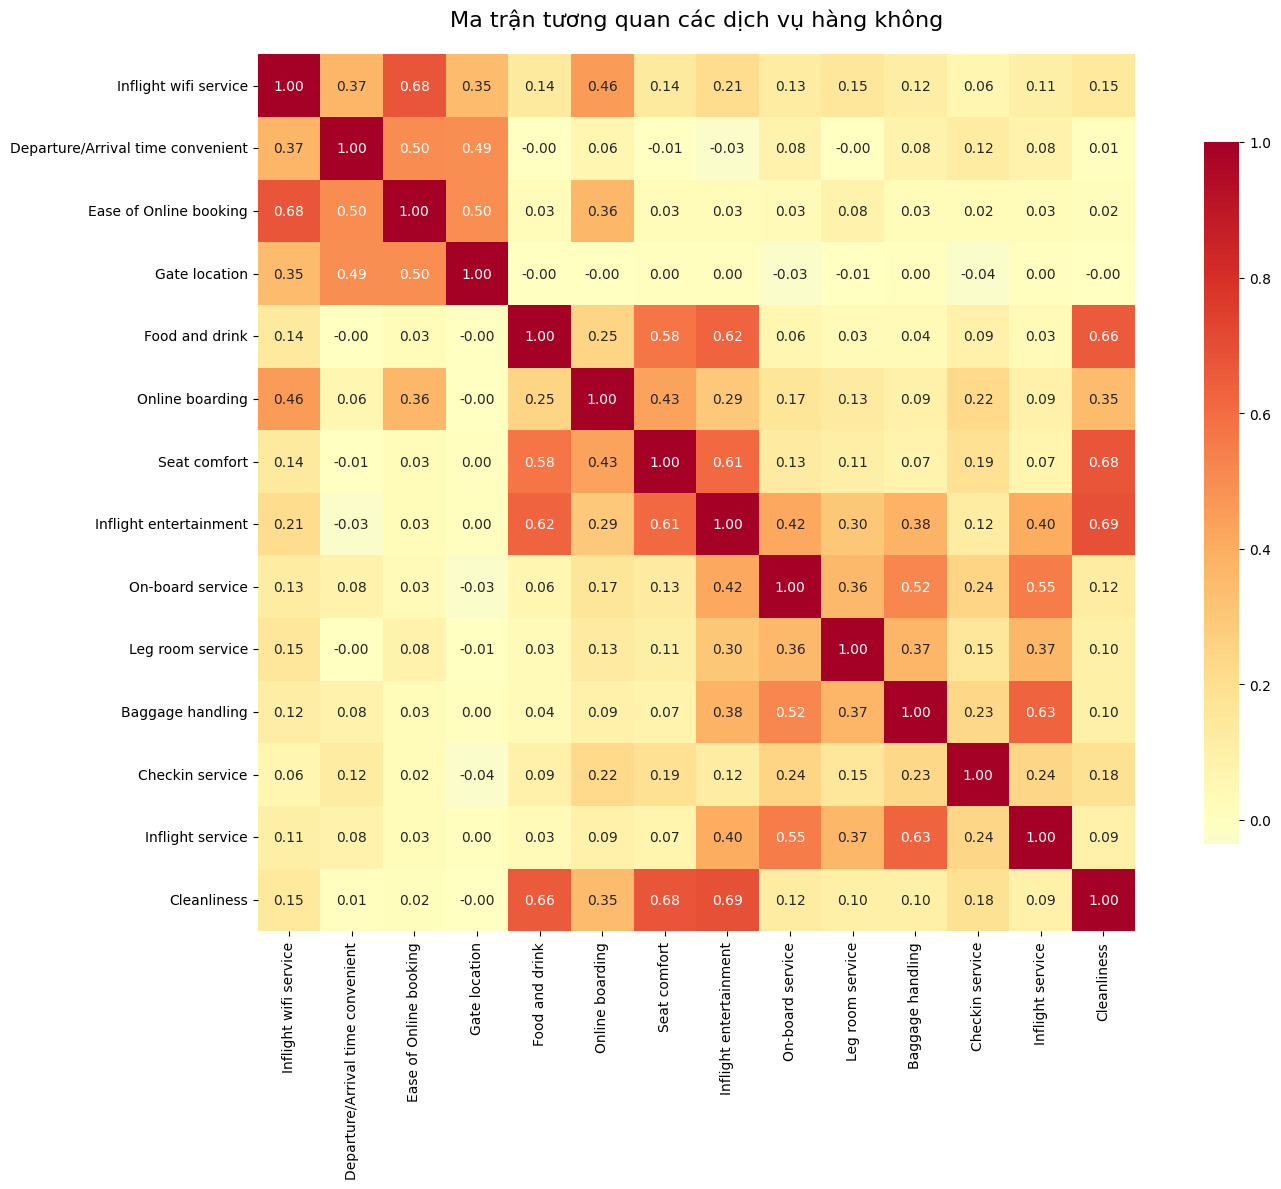

Các cặp dịch vụ có tương quan cao (>0.6):
                Service_1               Service_2  Correlation
5  Inflight entertainment             Cleanliness     0.691619
4            Seat comfort             Cleanliness     0.678588
0   Inflight wifi service  Ease of Online booking     0.676685
2          Food and drink             Cleanliness     0.658791
6        Baggage handling        Inflight service     0.628513
1          Food and drink  Inflight entertainment     0.623957
3            Seat comfort  Inflight entertainment     0.610732


In [12]:
# 4. Ma trận tương quan nâng cao
print(f"Ma trận tương quan các dịch vụ:")
corr_matrix = df_service.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,
           annot=True,
           cmap='RdYlBu_r',
           center=0,
           square=True,
           fmt='.2f',
           cbar_kws={"shrink": .8})
plt.title('Ma trận tương quan các dịch vụ hàng không', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Tìm các cặp tương quan cao
def find_high_correlations(corr_matrix, threshold=0.6):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'Service_1': corr_matrix.columns[i],
                    'Service_2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    return pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)

high_corr = find_high_correlations(corr_matrix, 0.6)
if len(high_corr) > 0:
    print("Các cặp dịch vụ có tương quan cao (>0.6):")
    print(high_corr)
else:
    print("Không có cặp dịch vụ nào có tương quan >0.6")

In [13]:
# 5. Phân tích chi tiết hơn về Service Quality
print(f"Phân tích chất lượng dịch vụ chi tiết:")

# Tạo Service Quality Index
df['Service_Quality_Index'] = df[service_cols].mean(axis=1)
quality_tiers = pd.cut(df['Service_Quality_Index'],
                      bins=[0, 2, 3, 4, 5],
                      labels=['Poor', 'Fair', 'Good', 'Excellent'])
df['Service_Tier'] = quality_tiers

print("Phân bố Service Quality Tiers:")
tier_dist = df['Service_Tier'].value_counts()
for tier, count in tier_dist.items():
    pct = count / len(df) * 100
    print(f"  {tier}: {count:,} ({pct:.1f}%)")

Phân tích chất lượng dịch vụ chi tiết:
Phân bố Service Quality Tiers:
  Good: 53,430 (51.4%)
  Fair: 34,291 (33.0%)
  Excellent: 13,305 (12.8%)
  Poor: 2,878 (2.8%)


### Task 2.2: Phân tích mức độ hài lòng của khách hàng
- Dùng value_counts(), tỷ lệ thì để value_counts(normalize=True)
1. Có bao nhiêu khách hàng hài lòng và không hài lòng?
2. Tỷ lệ khách hàng hài lòng là bao nhiêu phần trăm?
3. Dữ liệu có cân bằng giữa các nhóm không?

In [14]:
#Dùng value_counts(), tỷ lệ thì để value_counts(normalize=True)
#Có bao nhiêu khách hàng hài lòng và không hài lòng?
#Tỷ lệ khách hàng hài lòng là bao nhiêu phần trăm?
#Dữ liệu có cân bằng giữa các nhóm không? Không
df['satisfaction'].value_counts(normalize=True)
print(f"Tỷ lệ khách hàng hài lòng là ", df['satisfaction'].value_counts(normalize=True)['satisfied']*100,"%")
print(f"tỷ lệ khách hàng không hài lòng là", 100-df['satisfaction'].value_counts(normalize=True)['satisfied']*100,"%")

Tỷ lệ khách hàng hài lòng là  43.333269171542966 %
tỷ lệ khách hàng không hài lòng là 56.666730828457034 %


## Task 3: Phân tích Hành vi khách hàng theo Group
1. Phân tích theo loại khách hàng và loại vé

  *   Loại khách hàng nào chiếm đa số (Loyal Customer hay Disloyal Customer)?
  *   Hạng vé nào được sử dụng nhiều nhất?
  *   Hạng vé nào có tỷ lệ hài lòng cao nhất?

2.  Phân tích theo đặc điểm nhân khẩu học

  *   Giới tính nào có tỷ lệ hài lòng cao hơn?
  *   Độ tuổi trung bình của nhóm hài lòng và không hài lòng khác nhau như thế nào?
  *   Loại hình đi lại nào (Business hay Personal) có tỷ lệ hài lòng cao hơn?


3.  Phân tích dịch vụ theo mức độ hài lòng

  *   Dịch vụ nào có sự chênh lệch điểm đánh giá lớn nhất giữa nhóm hài lòng và không hài lòng?
  *   Dịch vụ nào ít ảnh hưởng nhất đến sự hài lòng (chênh lệch điểm nhỏ)?
  *   Dựa vào kết quả, hãng hàng không nên ưu tiên cải thiện dịch vụ nào trước?








In [15]:
# 1. Phân tích theo loại khách hàng và loại vé
print("Phân bố theo loại khách hàng: ")
df['Customer Type'].value_counts()

Phân bố theo loại khách hàng: 


Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [16]:
# phân tích theo hạng vé
print("\nPhân bố theo hạng vé: ")
df['Class'].value_counts()


Phân bố theo hạng vé: 


Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

Mức độ hài lòng theo hạng vé
satisfaction  neutral or dissatisfied  satisfied     All
Class                                                   
Business                        15185      34480   49665
Eco                             38044       8701   46745
Eco Plus                         5650       1844    7494
All                             58879      45025  103904


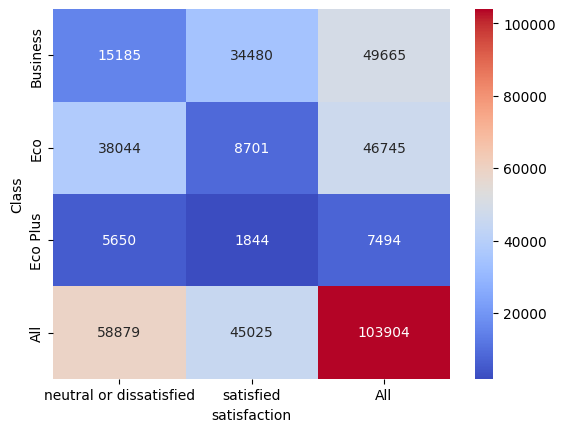

In [17]:
# Phân tích theo hạng vé và mức độ hài lòng
print("Mức độ hài lòng theo hạng vé")
import seaborn as sns
ct_margins = pd.crosstab(df[ 'Class' ], df[ 'satisfaction' ], margins= True )
sns.heatmap(ct_margins, cmap= 'coolwarm' , annot= True, fmt = '.0f' )
print(ct_margins)

* Business class có tỷ lệ hài lòng cao: ~69.5% hành khách hài lòng (34,480 / 49,665).

* Eco class ngược lại, có tỷ lệ không hài lòng cao: ~81.3% hành khách không hài lòng (38,044 / 46,745).

* Eco Plus có tỷ lệ hài lòng thấp hơn Business nhưng cao hơn Eco.

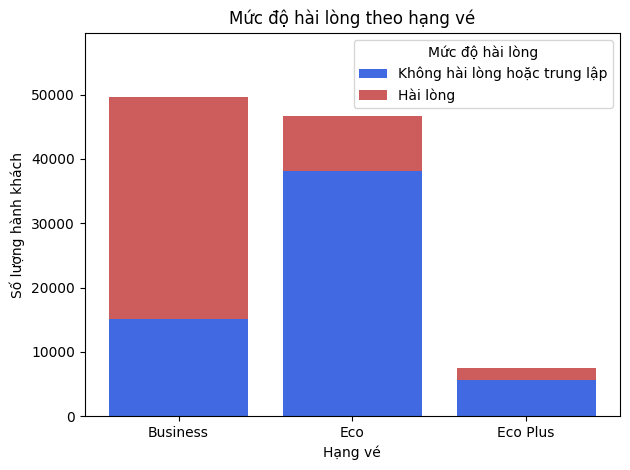

In [18]:

# Tạo bảng chéo
ct_class_satisfaction	 = pd.crosstab(df['Class'], df['satisfaction'])

# Vẽ stacked bar dùng plt
plt.bar(ct_class_satisfaction	.index, ct_class_satisfaction	['neutral or dissatisfied'], label='Không hài lòng hoặc trung lập', color='royalblue')
plt.bar(ct_class_satisfaction	.index, ct_class_satisfaction	['satisfied'],
        bottom=ct_class_satisfaction	['neutral or dissatisfied'], label='Hài lòng', color='indianred')

# Thêm nhãn
plt.xlabel('Hạng vé')
plt.ylabel('Số lượng hành khách')
plt.title('Mức độ hài lòng theo hạng vé')
plt.legend(title='Mức độ hài lòng')
plt.xticks(rotation=0)
plt.ylim(0, ct_class_satisfaction.sum(axis=1).max() * 1.2)
plt.tight_layout()
plt.show()



Chi-square test: Class vs Satisfaction
  Chi-square: 26471.8629, p-value: 0.0000e+00
  Kết luận: Có mối quan hệ ý nghĩa thống kê


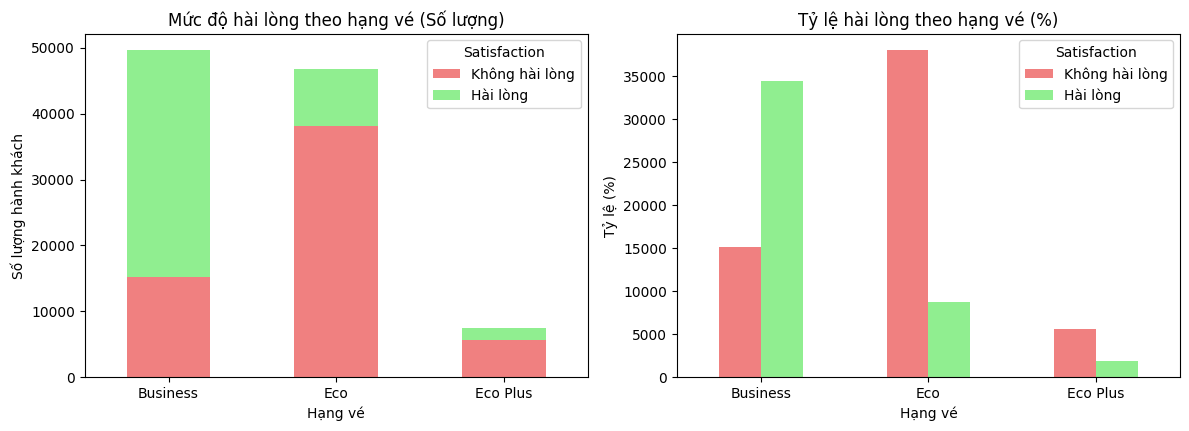

In [19]:
# Chi-square test cho Class vs Satisfaction
print(f"\nChi-square test: Class vs Satisfaction")
contingency = pd.crosstab(df['Class'], df['satisfaction'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency)
print(f"  Chi-square: {chi2_stat:.4f}, p-value: {p_value:.4e}")
print(f"  Kết luận: {'Có mối quan hệ' if p_value < 0.05 else 'Không có mối quan hệ'} ý nghĩa thống kê")

# Vẽ biểu đồ
ct_class_satisfaction = pd.crosstab(df['Class'], df['satisfaction'])
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
ct_class_satisfaction.plot(kind='bar', stacked=True,
                          color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('Mức độ hài lòng theo hạng vé (Số lượng)')
plt.xlabel('Hạng vé')
plt.ylabel('Số lượng hành khách')
plt.legend(title='Satisfaction', labels=['Không hài lòng', 'Hài lòng'])
plt.xticks(rotation=0)

plt.subplot(2, 2, 2)
ct_class_satisfaction.plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('Tỷ lệ hài lòng theo hạng vé (%)')
plt.xlabel('Hạng vé')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Satisfaction', labels=['Không hài lòng', 'Hài lòng'])
plt.xticks(rotation=0)
plt.tight_layout()

In [20]:
# 2. Phân tích theo nhân khẩu học
# theo giới tính
df.groupby(['Gender', 'satisfaction']).size().unstack(level='satisfaction', fill_value=0)

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30193      22534
Male                            28686      22491

In [21]:
# Statistical test cho giới tính
print(f"\nChi-square test: Gender vs Satisfaction")
gender_contingency = pd.crosstab(df['Gender'], df['satisfaction'])
chi2_gender, p_gender, _, _ = chi2_contingency(gender_contingency)
print(f"  Chi-square: {chi2_gender:.4f}, p-value: {p_gender:.4e}")



Chi-square test: Gender vs Satisfaction
  Chi-square: 15.4444, p-value: 8.4968e-05


In [22]:
# Statistical test cho tuổi
satisfied_ages = df[df['satisfaction'] == 'satisfied']['Age']
dissatisfied_ages = df[df['satisfaction'] == 'neutral or dissatisfied']['Age']
t_stat, p_value = ttest_ind(satisfied_ages, dissatisfied_ages)
print(f"\nT-test cho tuổi: t-stat={t_stat:.3f}, p-value={p_value:.3f}")
print(f"Kết luận: {'Có khác biệt' if p_value < 0.05 else 'Không có khác biệt'} ý nghĩa thống kê")



T-test cho tuổi: t-stat=44.636, p-value=0.000
Kết luận: Có khác biệt ý nghĩa thống kê


In [23]:
# Giới tính nào có tỷ lệ hài lòng cao hơn?
print("\nMức độ hài lòng theo giới tính:")
gender_satisfaction = pd.crosstab(df['Gender'], df['satisfaction'], normalize='index') * 100
print(gender_satisfaction.round(1))



Mức độ hài lòng theo giới tính:
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                           57.3       42.7
Male                             56.1       43.9


In [24]:
# Độ tuổi trung bình của nhóm hài lòng và không hài lòng
print("\nĐộ tuổi trung bình theo mức độ hài lòng:")
age_by_satisfaction = df.groupby('satisfaction')['Age'].agg(['mean', 'std', 'median', 'min', 'max'])
print(age_by_satisfaction.round(1))


Độ tuổi trung bình theo mức độ hài lòng:
                         mean   std  median  min  max
satisfaction                                         
neutral or dissatisfied  37.6  16.5    36.0    7   85
satisfied                41.8  12.8    43.0    7   85


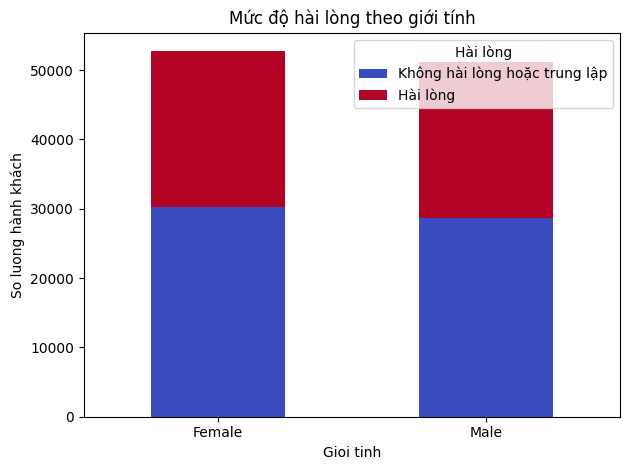

In [25]:
df_gender = df.groupby(['Gender', 'satisfaction']).size().unstack(fill_value=0)
df_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Gioi tinh')
plt.ylabel('So luong hành khách')
plt.title('Mức độ hài lòng theo giới tính')
plt.legend(title='Hài lòng', labels= ['Không hài lòng hoặc trung lập', 'Hài lòng'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
# theo độ tuổi
df.groupby(['Age', 'satisfaction']).size().unstack(level='satisfaction', fill_value=0)

satisfaction  neutral or dissatisfied  satisfied
Age                                             
7                                 506         56
8                                 571         69
9                                 597         95
10                                593         90
11                                569        109
..                                ...        ...
77                                 71         16
78                                 22         11
79                                 30         12
80                                 63         15
85                                 14          3

[75 rows x 2 columns]

/tmp/ipython-input-27-156488716.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agegroup = df.groupby(['AgeGroup', 'satisfaction']).size().unstack(fill_value=0)


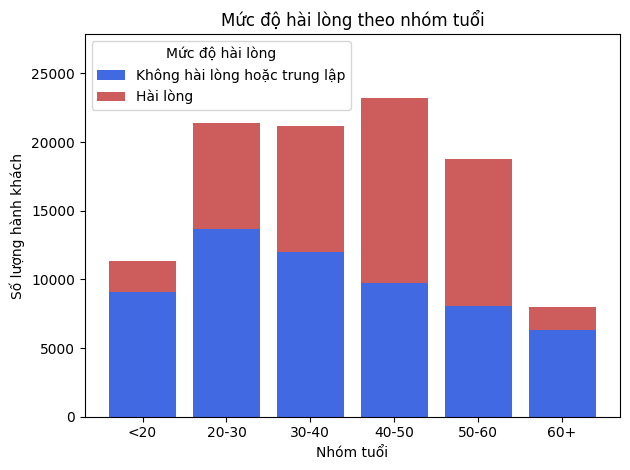

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Gom độ tuổi thành nhóm
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 20, 30, 40, 50, 60, 100],
                        labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])

# Tạo bảng tần suất
df_agegroup = df.groupby(['AgeGroup', 'satisfaction']).size().unstack(fill_value=0)

# Vẽ stacked bar chart với plt
plt.bar(df_agegroup.index, df_agegroup['neutral or dissatisfied'], label='Không hài lòng hoặc trung lập', color='royalblue')
plt.bar(df_agegroup.index, df_agegroup['satisfied'], bottom=df_agegroup['neutral or dissatisfied'], label='Hài lòng', color='indianred')

# Thêm nhãn
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng hành khách')
plt.title('Mức độ hài lòng theo nhóm tuổi')

plt.legend(title='Mức độ hài lòng')
plt.xticks(rotation=0)
totals = df_agegroup.sum(axis=1) # Calculate totals
plt.ylim(0, totals.max() * 1.2)  # mở rộng trục y
plt.tight_layout()
plt.show()


In [28]:
# Loại hình đi lại nào có tỷ lệ hài lòng cao hơn?
print("\nMức độ hài lòng theo mục đích đi lại:")
travel_satisfaction = pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize='index') * 100
print(travel_satisfaction.round(1))


Mức độ hài lòng theo mục đích đi lại:
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                     41.7       58.3
Personal Travel                     89.8       10.2


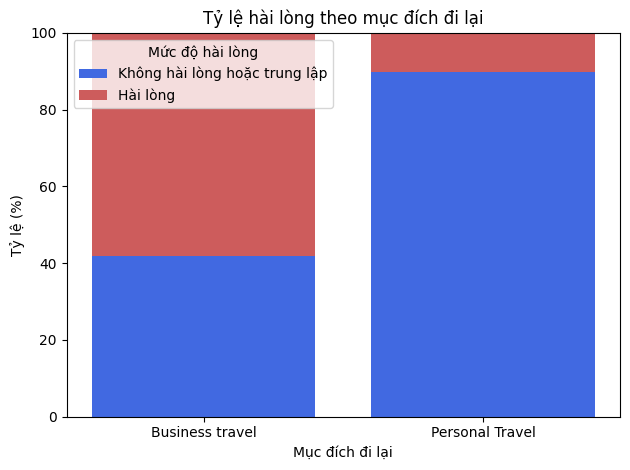

In [29]:
ct_travel = pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize='index') * 100

# Vẽ biểu đồ stacked bar (dạng phần trăm)
plt.bar(ct_travel.index, ct_travel['neutral or dissatisfied'],
        label='Không hài lòng hoặc trung lập', color='royalblue')
plt.bar(ct_travel.index, ct_travel['satisfied'],
        bottom=ct_travel['neutral or dissatisfied'],
        label='Hài lòng', color='indianred')

plt.xlabel('Mục đích đi lại')
plt.ylabel('Tỷ lệ (%)')
plt.title('Tỷ lệ hài lòng theo mục đích đi lại')
plt.legend(title='Mức độ hài lòng')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
#3. Phân tích dịch vụ theo mức độ hài lòng
print("Điểm trung bình các dịch vụ theo mức độ hài lòng:")

# Define the service columns
service_cols = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

service_satisfaction = df.groupby('satisfaction')[service_cols].mean()
print(service_satisfaction)

# Tính sự chênh lệch điểm giữa hai nhóm
print("\nChênh lệch điểm giữa nhóm hài lòng và không hài lòng:")
diff = service_satisfaction.loc['satisfied'] - service_satisfaction.loc['neutral or dissatisfied']
print(diff.sort_values(ascending=False))

Điểm trung bình các dịch vụ theo mức độ hài lòng:
                         Inflight wifi service  \
satisfaction                                     
neutral or dissatisfied               2.400041   
satisfied                             3.367507   

                         Departure/Arrival time convenient  \
satisfaction                                                 
neutral or dissatisfied                           3.270759   
satisfied                                         3.138212   

                         Ease of Online booking  Gate location  \
satisfaction                                                     
neutral or dissatisfied                2.623635       2.976121   
satisfied                              3.230139       2.977968   

                         Food and drink  Online boarding  Seat comfort  \
satisfaction                                                             
neutral or dissatisfied        2.960954         2.711001       3.03638   
satisfied    

In [31]:
# Phân tích nhóm tuổi
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, 100],
                        labels=['Young', 'Adult', 'Middle_Age', 'Senior'])

print("\nMức độ hài lòng theo nhóm tuổi:")
age_group_satisfaction = pd.crosstab(df['Age_Group'], df['satisfaction'], normalize='index') * 100
print(age_group_satisfaction.round(1))


Mức độ hài lòng theo nhóm tuổi:
satisfaction  neutral or dissatisfied  satisfied
Age_Group                                       
Young                            71.9       28.1
Adult                            59.1       40.9
Middle_Age                       42.3       57.7
Senior                           79.2       20.8


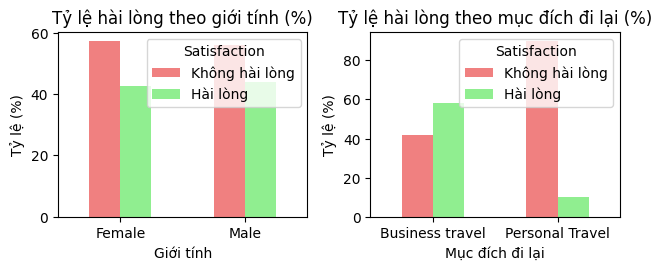

In [32]:
# Subplot 3: Giới tính
plt.subplot(2, 2, 3)
gender_satisfaction.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightgreen'])
plt.title('Tỷ lệ hài lòng theo giới tính (%)')
plt.xlabel('Giới tính')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction', labels=['Không hài lòng', 'Hài lòng'])

# Subplot 4: Mục đích đi lại
plt.subplot(2, 2, 4)
travel_satisfaction.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightgreen'])
plt.title('Tỷ lệ hài lòng theo mục đích đi lại (%)')
plt.xlabel('Mục đích đi lại')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction', labels=['Không hài lòng', 'Hài lòng'])

plt.tight_layout()
plt.show()

In [33]:
# Phân tích Age vs Service Scores
print(f"Phân tích nâng cao: Tuổi vs Service Scores")
age_service_corr = []
for col in service_cols:
    corr, p_val = pearsonr(df['Age'], df[col])
    age_service_corr.append({
        'Service': col,
        'Correlation_with_Age': corr,
        'P_value': p_val
    })

age_corr_df = pd.DataFrame(age_service_corr)
significant_corr = age_corr_df[age_corr_df['P_value'] < 0.05].sort_values('Correlation_with_Age', key=abs, ascending=False)

if len(significant_corr) > 0:
    print("Dịch vụ có tương quan ý nghĩa với tuổi:")
    print(significant_corr[['Service', 'Correlation_with_Age']].round(3))
else:
    print("Không có dịch vụ nào có tương quan ý nghĩa với tuổi")

Phân tích nâng cao: Tuổi vs Service Scores
Dịch vụ có tương quan ý nghĩa với tuổi:
                              Service  Correlation_with_Age
5                     Online boarding                 0.188
6                        Seat comfort                 0.160
7              Inflight entertainment                 0.076
8                    On-board service                 0.058
13                        Cleanliness                 0.053
9                    Leg room service                 0.051
12                   Inflight service                -0.049
10                   Baggage handling                -0.048
11                    Checkin service                 0.035
4                      Food and drink                 0.022
2              Ease of Online booking                 0.016
0               Inflight wifi service                 0.012
1   Departure/Arrival time convenient                -0.007


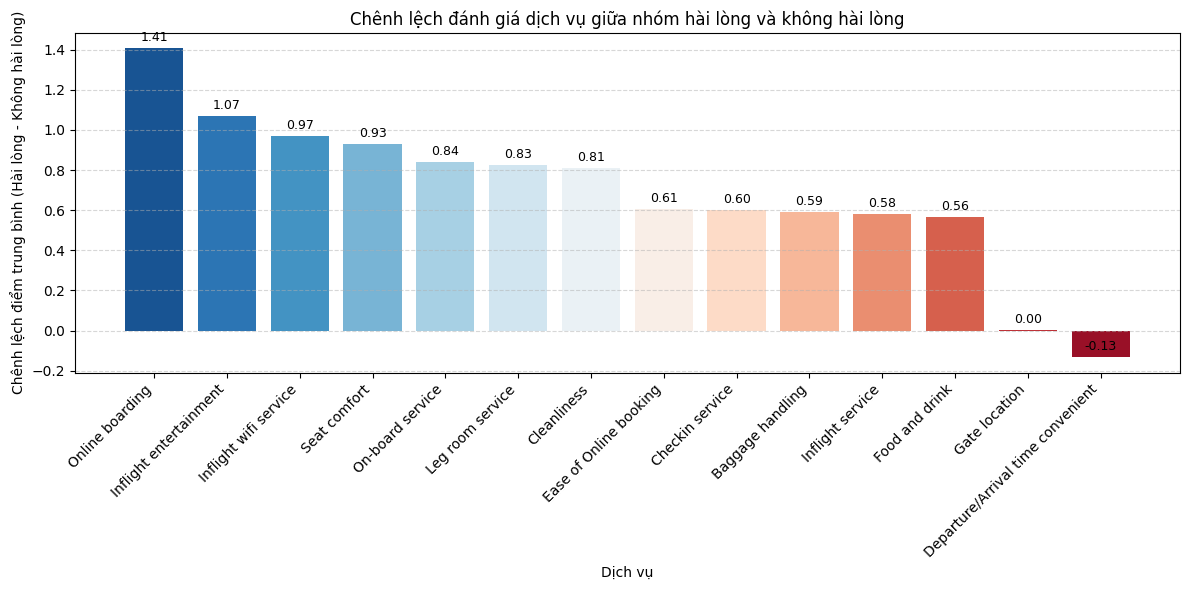

In [34]:
# Sắp xếp
diff_sorted = diff.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
colors = sns.color_palette("RdBu_r", len(diff_sorted))

# Vẽ biểu đồ cột
bars = plt.bar(diff_sorted.index, diff_sorted.values, color=colors)

# Gắn số lên đầu cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02,
             f"{yval:.2f}", ha='center', va='bottom', fontsize=9)

# # rất gần 0 hoặc gần bằng 0
# for bar in bars:
#     if abs(bar.get_height()) < 0.05:
#         plt.text(bar.get_x() + bar.get_width()/2, 0.05, "≈0", ha='center', fontsize=8)


# Nhãn và tiêu đề
plt.ylabel('Chênh lệch điểm trung bình (Hài lòng - Không hài lòng)')
plt.xlabel('Dịch vụ')
plt.title('Chênh lệch đánh giá dịch vụ giữa nhóm hài lòng và không hài lòng')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

* Nhận xét:


*   Dịch vụ có sự chênh lệch lớn nhất: Online boarding với chênh lệch 1.37
điểm -> yếu tố mà khách hàng hài lòng đánh giá cao hơn rất nhiều so với nhóm không hài lòng.

*   Dịch vụ ít ảnh hưởng nhất đến sự hài lòng: Gate location (gần như là bằng 0.00) và Departure/Arrival time convenient có giá trị âm (-0.16) => Các yếu tố này có thể ít tác động đến cảm nhận chung về sự hài lòng.
 - Đặc biệt, Departure/Arrival time convenient có chênh lệch âm nhẹ (-0.15) → nhóm không hài lòng đánh giá cao hơn — có thể do kỳ vọng thấp hoặc trùng hợp ngẫu nhiên.

* Hãng hàng không nên ưu tiên cải thiện: Online boarding, Inflight entertainment, Seat comfort





## Task 4: Phân tích Chuyến bay và Độ trễ
1. Phân tích khoảng cách và thời gian chuyến bay

2.  Phân tích độ trễ chuyến bay
* Khoảng cách bay trung bình là bao nhiêu km?
* Độ trễ khởi hành và đến nơi trung bình là bao nhiêu phút?
* Nhóm khách hàng nào chịu độ trễ cao hơn? Điều này có ảnh hưởng đến sự hài lòng không?

Flight Distance:
count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64


Khoảng cách bay trung bình theo mức độ hài lòng:
satisfaction
neutral or dissatisfied     928.919971
satisfied                  1530.140255
Name: Flight Distance, dtype: float64




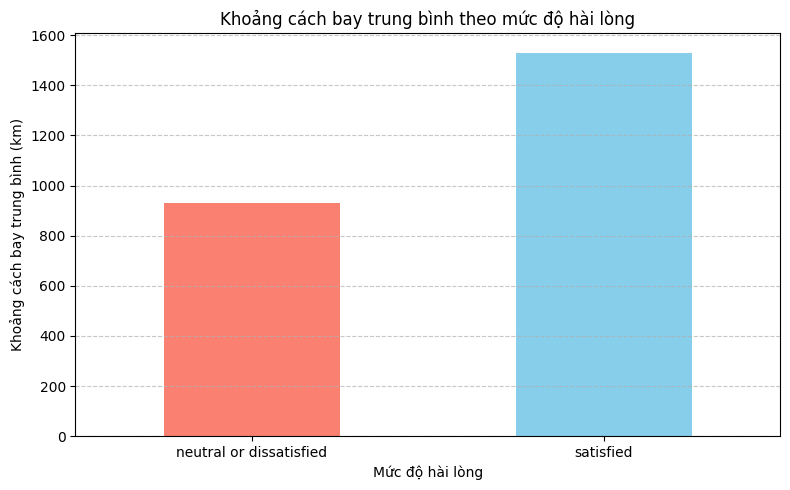

In [35]:
# 4.1
import matplotlib.pyplot as plt

print("Flight Distance:")
print(df['Flight Distance'].describe())
print("\n")


print("Khoảng cách bay trung bình theo mức độ hài lòng:")
mean_distance = df.groupby('satisfaction')['Flight Distance'].mean()
print(mean_distance)
print("\n")

plt.figure(figsize=(8, 5))
mean_distance.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Khoảng cách bay trung bình theo mức độ hài lòng')
plt.xlabel('Mức độ hài lòng')
plt.ylabel('Khoảng cách bay trung bình (km)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
#Khoảng cách bay trung bình là bao nhiêu km?
print("Khoảng cách bay trung bình là:")
mean_distance = df['Flight Distance'].mean()
print(mean_distance)
#Độ trễ khởi hành và đến nơi trung bình là bao nhiêu phút?
print("Khoảng cách bay trung bình theo mức độ hài lòng:")
mean_distance = df.groupby('satisfaction')['Flight Distance'].mean()
print(mean_distance)

Khoảng cách bay trung bình là:
1189.4483754234677
Khoảng cách bay trung bình theo mức độ hài lòng:
satisfaction
neutral or dissatisfied     928.919971
satisfied                  1530.140255
Name: Flight Distance, dtype: float64


Text(0.5, 0, 'Mức độ hài lòng')

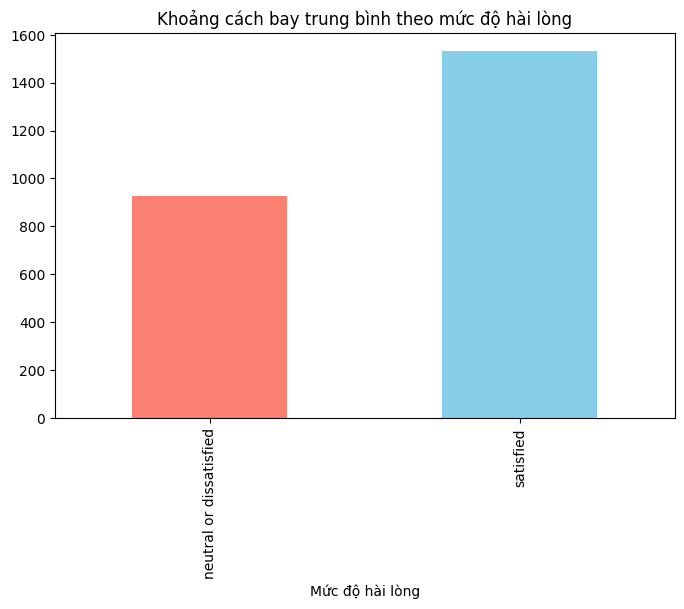

In [37]:
# vẽ biểu đồ thể hien mean_distance
plt.figure(figsize=(8, 5))
mean_distance.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Khoảng cách bay trung bình theo mức độ hài lòng')
plt.xlabel('Mức độ hài lòng')

In [38]:

print("Độ trễ khởi hành và đến nơi trung bình theo mức độ hài lòng:")
mean_delay = df.groupby('satisfaction')[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].mean()
print(mean_delay)

Độ trễ khởi hành và đến nơi trung bình theo mức độ hài lòng:
                         Departure Delay in Minutes  Arrival Delay in Minutes
satisfaction                                                                 
neutral or dissatisfied                   16.503728                 17.127536
satisfied                                 12.608084                 12.630799


Text(0.5, 1.0, 'Độ trễ khởi hành và đến nơi trung bình theo mức độ hài lòng')

<Figure size 1000x600 with 0 Axes>

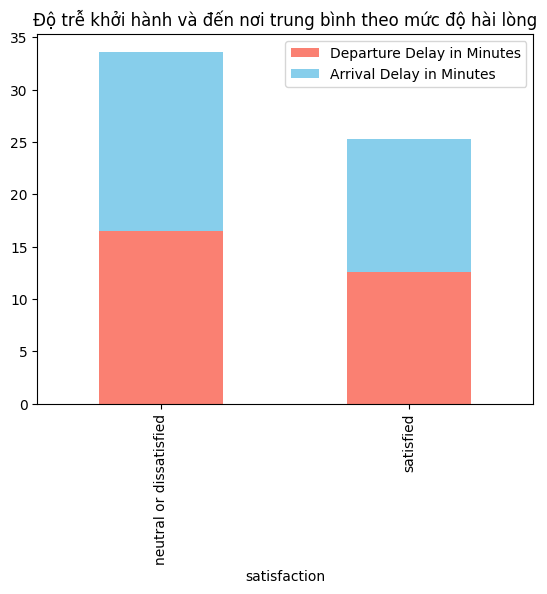

In [39]:
# Vẽ Biểu Đồ thể hiện
plt.figure(figsize=(10, 6))
mean_delay.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title('Độ trễ khởi hành và đến nơi trung bình theo mức độ hài lòng')

In [40]:
avg_delay_by_customer_type_departure = df.groupby('Customer Type')['Departure Delay in Minutes'].mean()
avg_delay_by_customer_type_arrival = df.groupby('Customer Type')['Arrival Delay in Minutes'].mean()
avg_delay_by_travel_type_departure = df.groupby('Type of Travel')['Departure Delay in Minutes'].mean()
avg_delay_by_travel_type_arrival = df.groupby('Type of Travel')['Arrival Delay in Minutes'].mean()
avg_delay_by_class_departure = df.groupby('Class')['Departure Delay in Minutes'].mean()
avg_delay_by_class_arrival = df.groupby('Class')['Arrival Delay in Minutes'].mean()

print("\n Độ trễ khởi hành trung bình theo loại khách hàng:")
display(avg_delay_by_customer_type_departure)
print("\n Độ trễ đến trung bình theo loại khách hàng:")
display(avg_delay_by_customer_type_arrival)
print("\n Sự chậm trễ khởi hành trung bình theo loại hình du lịch:")
display(avg_delay_by_travel_type_departure)
print("\n Độ trễ đến trung bình theo loại hình du lịch:")
display(avg_delay_by_travel_type_arrival)
print("\n Độ trễ khởi hành trung bình theo hạng vé: ")
display(avg_delay_by_class_departure)
print("\n Độ trễ đến trung bình theo hạng vé :")
display(avg_delay_by_class_arrival)


 Độ trễ khởi hành trung bình theo loại khách hàng:


Customer Type
Loyal Customer       14.742673
disloyal Customer    15.141984
Name: Departure Delay in Minutes, dtype: float64


 Độ trễ đến trung bình theo loại khách hàng:


Customer Type
Loyal Customer       15.091800
disloyal Customer    15.567188
Name: Arrival Delay in Minutes, dtype: float64


 Sự chậm trễ khởi hành trung bình theo loại hình du lịch:


Type of Travel
Business travel    14.954937
Personal Travel    14.506062
Name: Departure Delay in Minutes, dtype: float64


 Độ trễ đến trung bình theo loại hình du lịch:


Type of Travel
Business travel    15.326146
Personal Travel    14.850665
Name: Arrival Delay in Minutes, dtype: float64


 Độ trễ khởi hành trung bình theo hạng vé: 


Class
Business    14.398067
Eco         15.160509
Eco Plus    15.431545
Name: Departure Delay in Minutes, dtype: float64


 Độ trễ đến trung bình theo hạng vé :


Class
Business    14.577272
Eco         15.672183
Eco Plus    16.088645
Name: Arrival Delay in Minutes, dtype: float64

# II. Các tiền xử lý dữ liệu


## Task 1: Khảo sát lại data

In [41]:
# Tạo bản sao để xử lý
df_processed = df.copy()

In [42]:
# 1. Thống kê cơ bản
print("Thống kê cơ bản các cột dịch vụ:")
print(df[service_cols].describe())

Thống kê cơ bản các cột dịch vụ:
       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.819275                           3.213322   
std                 1.238855                           1.350889   
min                 1.000000                           1.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.886453       2.976921        3.205218         3.320479   
std                  1.270649       1.277592        1.325568         1.253333   
min                  1.000000       1.0

Phân tích mức độ phổ biến của satisfaction:
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Tỷ lệ phần trăm:
satisfaction
neutral or dissatisfied    56.67
satisfied                  43.33
Name: count, dtype: float64


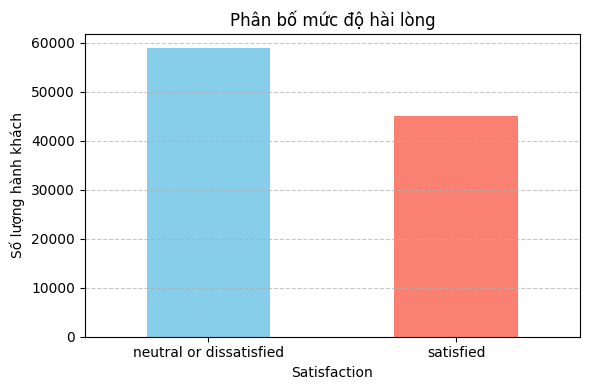

In [43]:
# 2. Phân tích mức độ phổ biến satisfaction
satisfaction_counts = df['satisfaction'].value_counts()
satisfaction_percent = satisfaction_counts / len(df) * 100

print("Phân tích mức độ phổ biến của satisfaction:")
print(satisfaction_counts)
print("\nTỷ lệ phần trăm:")
print(satisfaction_percent.round(2))

# Vẽ biểu đồ satisfaction
plt.figure(figsize=(6, 4))
satisfaction_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Phân bố mức độ hài lòng")
plt.xlabel("Satisfaction")
plt.ylabel("Số lượng hành khách")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Nhận xét:
- Hơn 56% hành khách không hài lòng.
- Đây là điểm quan trọng để phân tích nguyên nhân và cải thiện trải nghiệm.

In [44]:
# 3. missing value
print("Phân tích missing values")
missing_values = df.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
print(missing_values_sorted[missing_values_sorted > 0])

Phân tích missing values
Arrival Delay in Minutes    310
dtype: int64


In [45]:
# 4. Phân tích phân bố chi tiết
print(f"\nPhân tích phân bố các biến quan trọng:")
important_numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

distribution_summary = []
for col in important_numeric_cols:
    col_stats = {
        'Variable': col,
        'Mean': df[col].mean(),
        'Std': df[col].std(),
        'Skewness': stats.skew(df[col]),
        'Kurtosis': stats.kurtosis(df[col]),
        'Normality_Test': 'Normal' if abs(stats.skew(df[col])) < 0.5 and abs(stats.kurtosis(df[col])) < 3 else 'Non-normal'
    }
    distribution_summary.append(col_stats)

dist_summary_df = pd.DataFrame(distribution_summary)
print(dist_summary_df.round(3))


Phân tích phân bố các biến quan trọng:
                     Variable      Mean      Std  Skewness  Kurtosis  \
0                         Age    39.380   15.115    -0.005    -0.720   
1             Flight Distance  1189.448  997.147     1.109     0.268   
2  Departure Delay in Minutes    14.816   38.231     6.734   100.262   
3    Arrival Delay in Minutes    15.179   38.699       NaN       NaN   

  Normality_Test  
0         Normal  
1     Non-normal  
2     Non-normal  
3     Non-normal  


## TASK 2: PHÂN TÍCH MỨC ĐỘ HÀI LÒNG VÀ TRỰC QUAN HÓA


In [46]:
# TASK 2: PHÂN TÍCH MỨC ĐỘ HÀI LÒNG VÀ TRỰC QUAN HÓA
#TẠO TRƯỚC fig, axes
# fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# fig.suptitle('Phân Tích Tổng Quan Dữ Liệu Khách Hàng', fontsize=16, fontweight='bold')
# 1. Phân tích độ tuổi (mean, std...), sau đó thống kê độ tuổi khách hàng
# ví dụ thống kê
# print(f"\n2.2. Thống kê độ tuổi khách hàng:")
# for stat, value in age_stats.items():
#     print(f"  {stat}: {value:.2f}")

#2. Tương tự phân tích và thống kê khoảng cách bay

#3. Pie chart cho satisfaction
#4. Histogram độ tuổi
#5. Histogram khoảng cách bay
#6. Box plot Age theo Satisfaction

# sau khi hiển thị các biểu đồ theo thuộc tính -> đưa ra kết luận:
# 1. mục đích
# 2. Tỷ lệ khách hàng hài lòng chiếm X%, nhóm không hài lòng chiếm Y%.
# 3. Đa số khách hàng nằm trong độ tuổi 30-50, trong đó nhóm tuổi Z có tỷ lệ hài lòng cao hơn.
# 4. Không có khác biệt lớn về độ tuổi giữa nhóm hài lòng và không hài lòng (hoặc: nhóm khách trẻ có vẻ khó hài lòng hơn).


Thống kê độ tuổi khách hàng:
  count: 103904.00
  mean: 39.38
  std: 15.11
  min: 7.00
  25%: 27.00
  50%: 40.00
  75%: 51.00
  max: 85.00


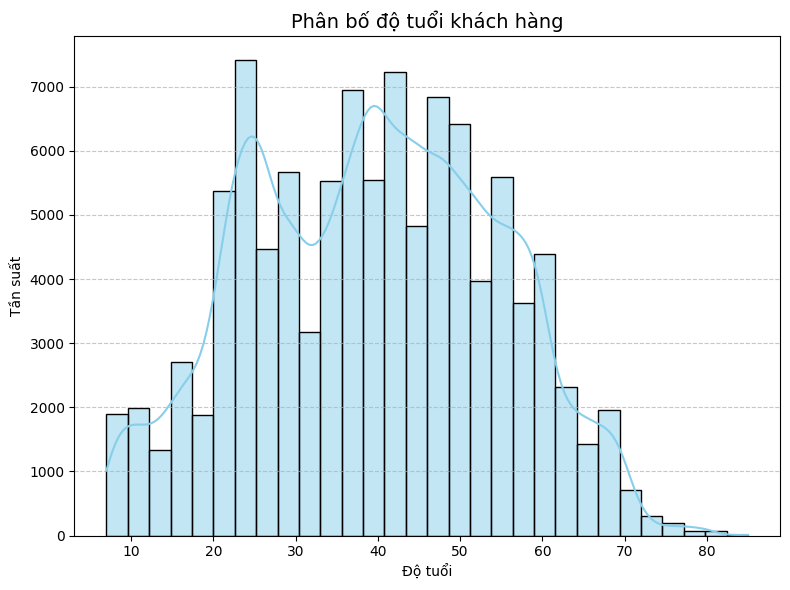

In [47]:
# thống kê độ tuổi khách hàng

# 1. Phân tích độ tuổi (mean, std...), sau đó thống kê độ tuổi khách hàng
age_stats = df['Age'].describe()
print(f"\nThống kê độ tuổi khách hàng:")
for stat, value in age_stats.items():
    print(f"  {stat}: {value:.2f}")

# Vẽ histogram độ tuổi
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Phân bố độ tuổi khách hàng', fontsize=14)
plt.xlabel('Độ tuổi')
plt.ylabel('Tần suất')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Thống kê khoảng cách bay:
  count: 103904.00
  mean: 1189.45
  std: 997.15
  min: 31.00
  25%: 414.00
  50%: 843.00
  75%: 1743.00
  max: 4983.00

Thống kê khoảng cách bay theo phân khúc:
Distance Segment
< 500 km (Short)         32156
500-1500 km (Medium)     40238
1500-3000 km (Long)      23237
> 3000 km (Very Long)     8261
Name: count, dtype: int64

Tỷ lệ phần trăm theo phân khúc:
Distance Segment
< 500 km (Short)         30.95
500-1500 km (Medium)     38.73
1500-3000 km (Long)      22.36
> 3000 km (Very Long)     7.95
Name: count, dtype: float64


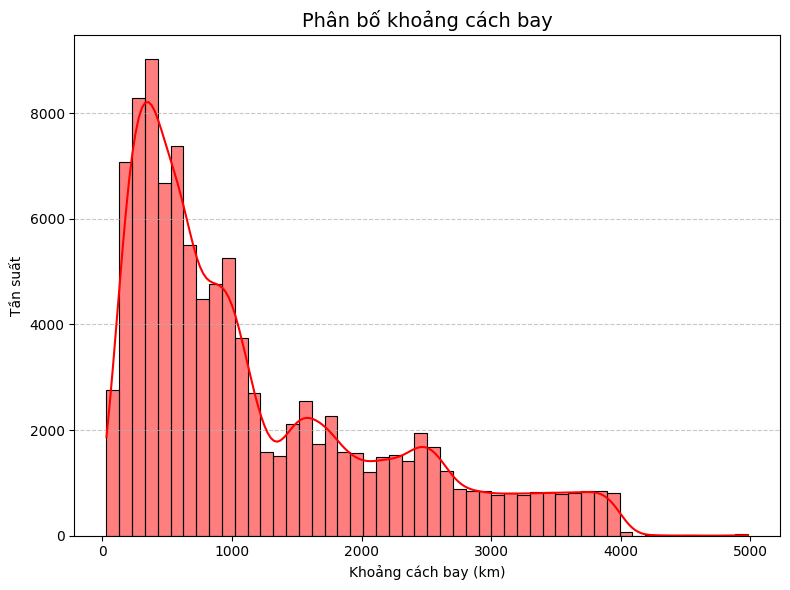

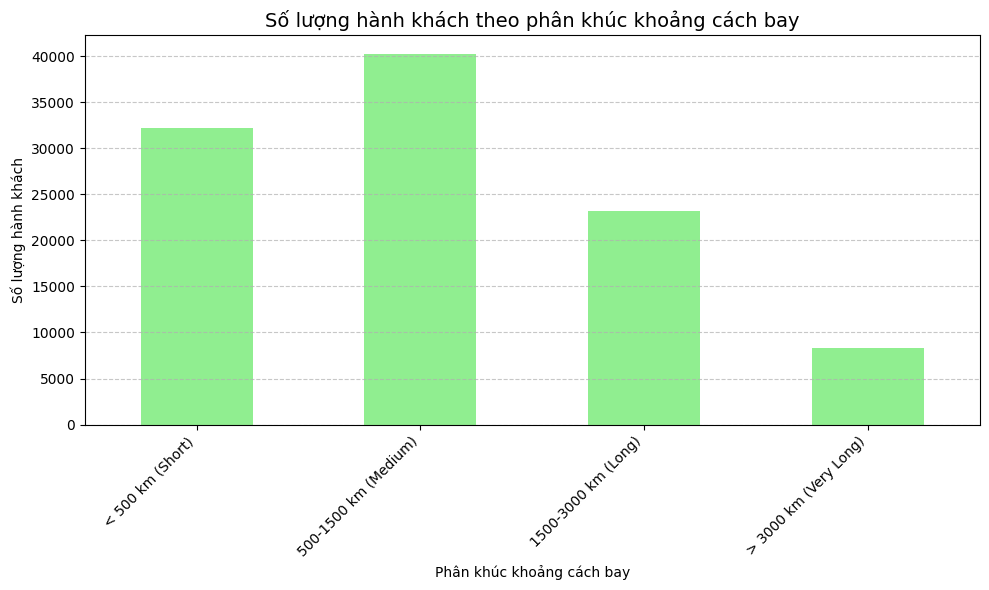

In [48]:
# thong ke khoang cach bay chia la 4 phan khuc khoang cach

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Phân tích và thống kê khoảng cách bay
flight_distance_stats = df['Flight Distance'].describe()
print(f"\nThống kê khoảng cách bay:")
for stat, value in flight_distance_stats.items():
    print(f"  {stat}: {value:.2f}")

# Thống kê khoảng cách bay chia thành 4 phân khúc
distance_bins = [0, 500, 1500, 3000, df['Flight Distance'].max()]
distance_labels = ['< 500 km (Short)', '500-1500 km (Medium)', '1500-3000 km (Long)', '> 3000 km (Very Long)']
df['Distance Segment'] = pd.cut(df['Flight Distance'], bins=distance_bins, labels=distance_labels, right=False)

distance_segment_counts = df['Distance Segment'].value_counts().sort_index()
distance_segment_percent = distance_segment_counts / len(df) * 100

print("\nThống kê khoảng cách bay theo phân khúc:")
print(distance_segment_counts)
print("\nTỷ lệ phần trăm theo phân khúc:")
print(distance_segment_percent.round(2))

# Vẽ histogram khoảng cách bay
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Flight Distance', bins=50, kde=True, color='red')
plt.title('Phân bố khoảng cách bay', fontsize=14)
plt.xlabel('Khoảng cách bay (km)')
plt.ylabel('Tần suất')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột cho phân khúc khoảng cách bay
plt.figure(figsize=(10, 6))
distance_segment_counts.plot(kind='bar', color='lightgreen')
plt.title('Số lượng hành khách theo phân khúc khoảng cách bay', fontsize=14)
plt.xlabel('Phân khúc khoảng cách bay')
plt.ylabel('Số lượng hành khách')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

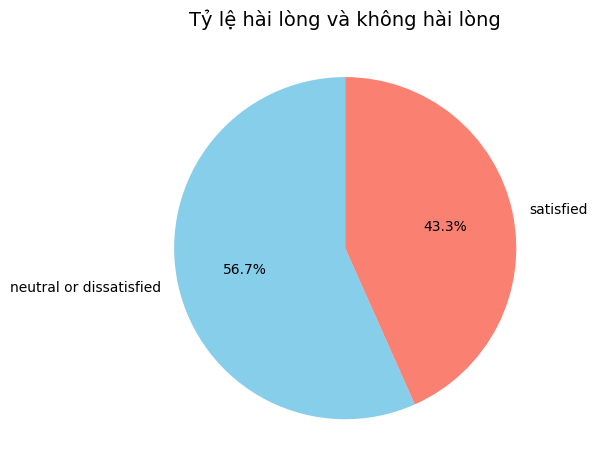

/tmp/ipython-input-49-1919458491.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y='Age', palette='viridis')


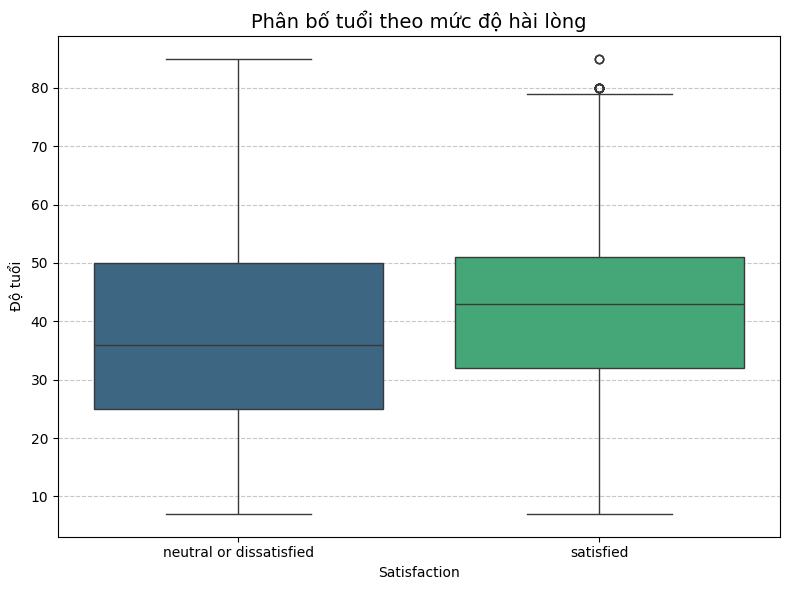

In [49]:
# 3. Pie chart cho satisfaction
satisfaction_counts = df['satisfaction'].value_counts()
plt.figure(figsize=(6, 6))
satisfaction_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Tỷ lệ hài lòng và không hài lòng', fontsize=14)
plt.ylabel('') # Loại bỏ nhãn y mặc định
plt.tight_layout()
plt.show()

# 6. Box plot Age theo Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='satisfaction', y='Age', palette='viridis')
plt.title('Phân bố tuổi theo mức độ hài lòng', fontsize=14)
plt.xlabel('Satisfaction')
plt.ylabel('Độ tuổi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
#phan khoang cach bay ra lam 4 phan khuc


2.3. Service Score Analysis:
Service Score Average:
  count: 103904.000
  mean: 3.274
  std: 0.647
  min: 1.143
  25%: 2.786
  50%: 3.286
  75%: 3.714
  max: 5.000

Service Score theo satisfaction:
                          mean    std  median
satisfaction                                 
neutral or dissatisfied  2.975  0.561   3.000
satisfied                3.665  0.533   3.643
Service Score Skewness: -0.081


/tmp/ipython-input-51-902641871.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y='Age', ax=axes[0,1], palette='viridis')
/tmp/ipython-input-51-902641871.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_processed, x='satisfaction', y='Service_Score_Average', ax=axes[2,1], palette='coolwarm')


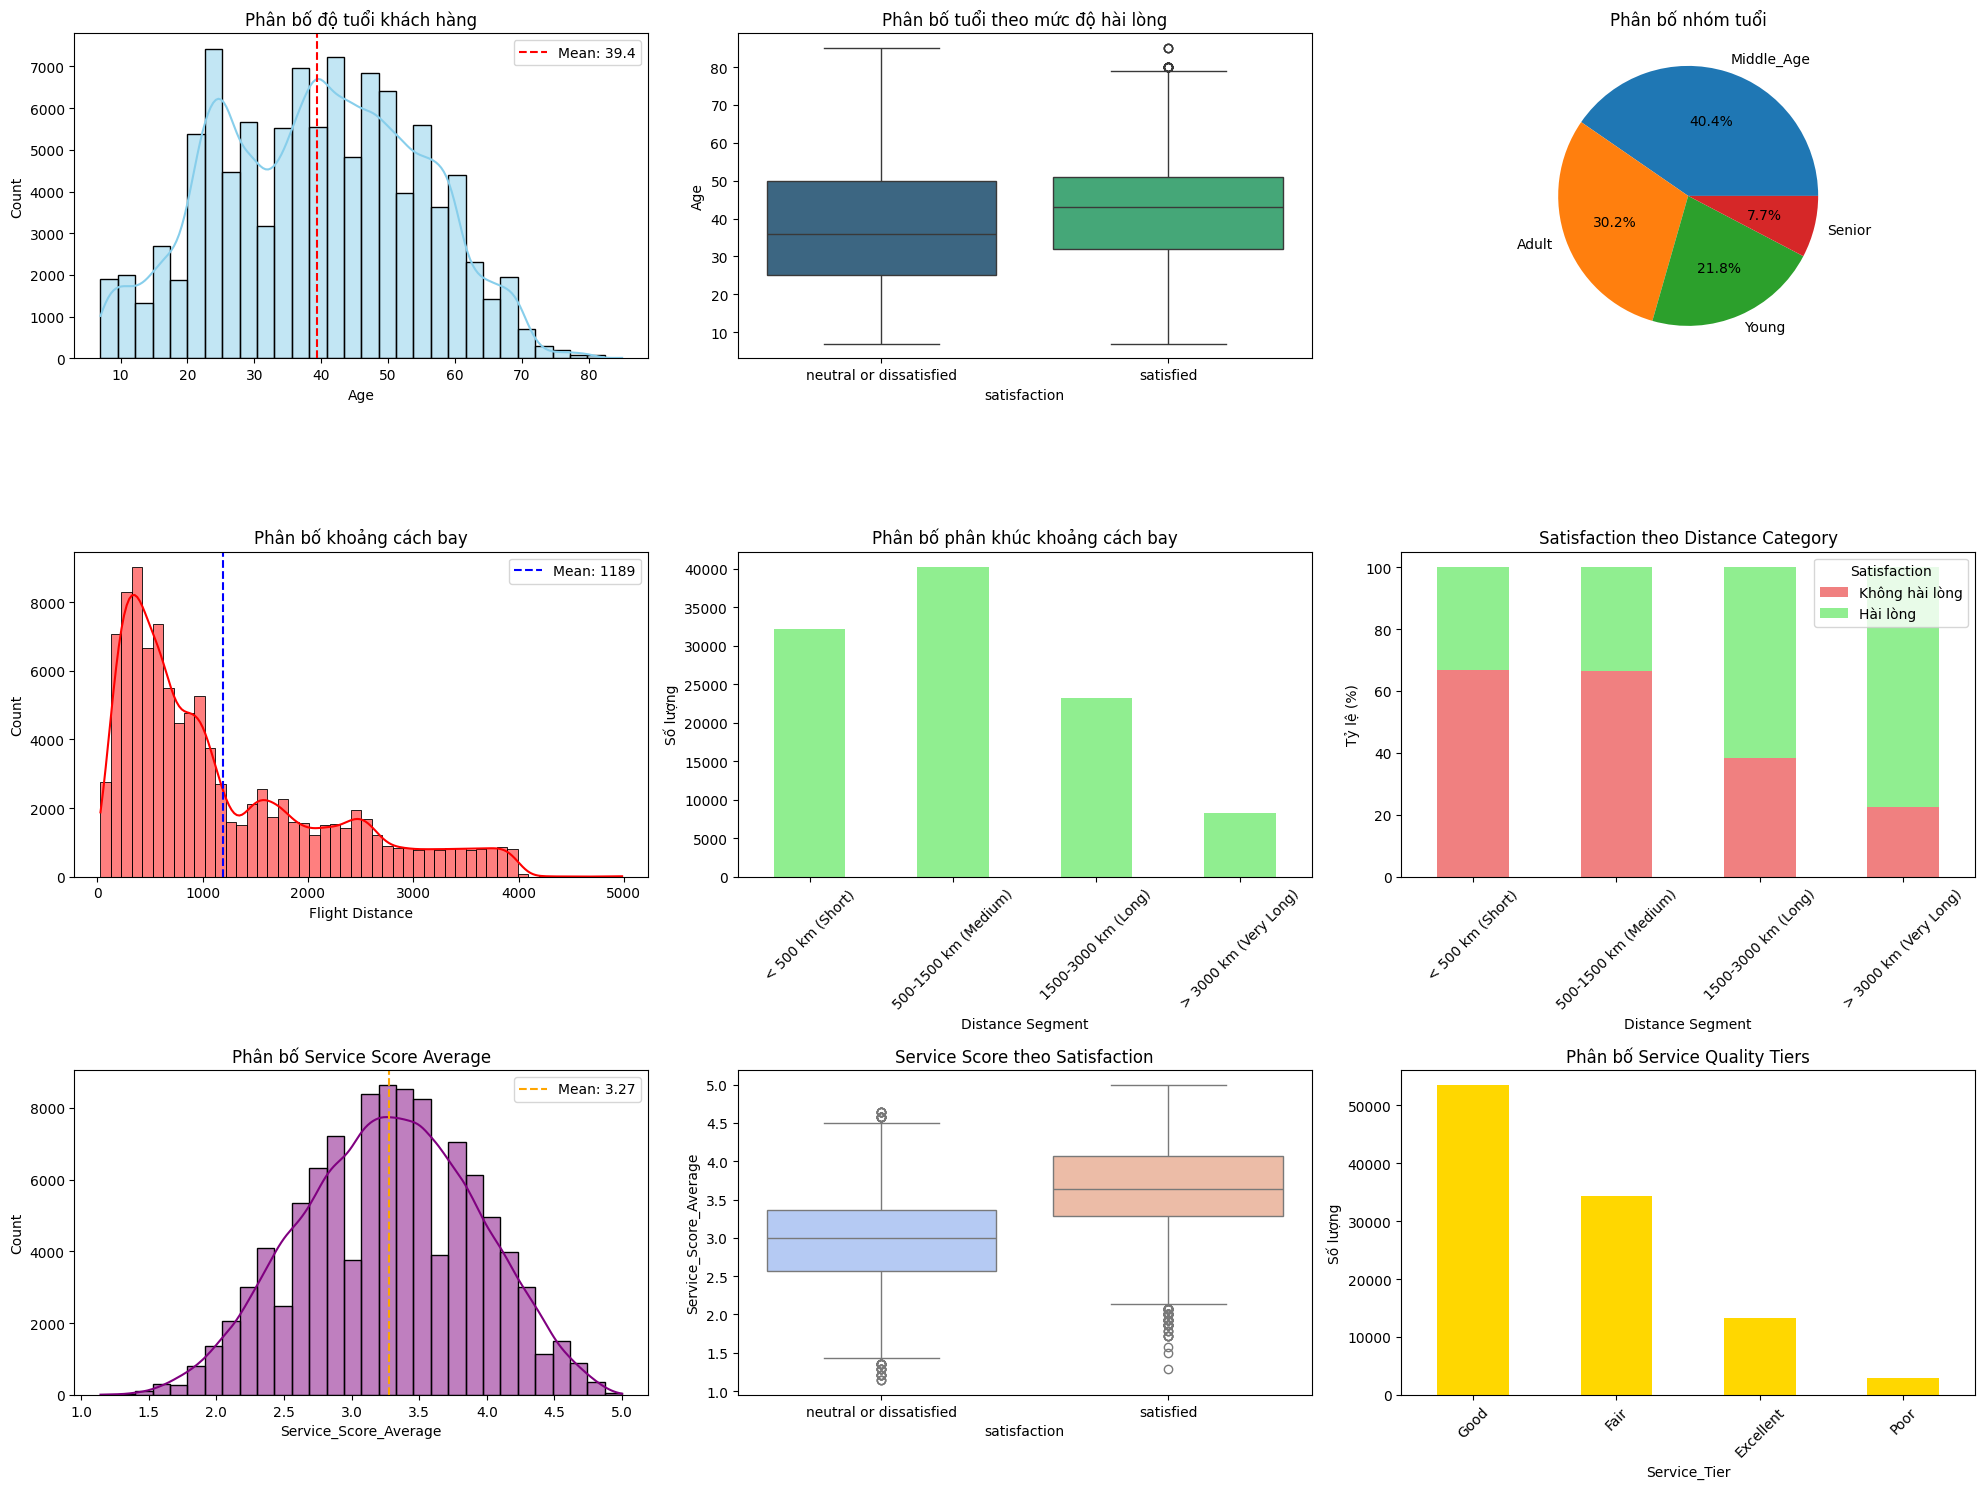

In [51]:
#  Service Score
print(f"\n2.3. Service Score Analysis:")
df_processed['Service_Score_Average'] = df_processed[service_cols].mean(axis=1)

service_score_stats = df_processed['Service_Score_Average'].describe()
print(f"Service Score Average:")
for stat, value in service_score_stats.items():
    print(f"  {stat}: {value:.3f}")

# Service Score by satisfaction
service_score_by_satisfaction = df_processed.groupby('satisfaction')['Service_Score_Average'].agg(['mean', 'std', 'median'])
print(f"\nService Score theo satisfaction:")
print(service_score_by_satisfaction.round(3))

# Service Score distribution
service_score_skew = stats.skew(df_processed['Service_Score_Average'])
print(f"Service Score Skewness: {service_score_skew:.3f}")

# Calculate distance_satisfaction
distance_satisfaction = pd.crosstab(df['Distance Segment'], df['satisfaction'], normalize='index') * 100


# Vẽ các biểu đồ phân tích
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Row 1: Age analysis
sns.histplot(data=df, x='Age', bins=30, kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Phân bố độ tuổi khách hàng')
axes[0,0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
axes[0,0].legend()

sns.boxplot(data=df, x='satisfaction', y='Age', ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Phân bố tuổi theo mức độ hài lòng')

age_group_dist = df['Age_Group'].value_counts()
age_group_dist.plot(kind='pie', ax=axes[0,2], autopct='%1.1f%%')
axes[0,2].set_title('Phân bố nhóm tuổi')
axes[0,2].set_ylabel('')

# Row 2: Flight Distance analysis
sns.histplot(data=df, x='Flight Distance', bins=50, kde=True, ax=axes[1,0], color='red')
axes[1,0].set_title('Phân bố khoảng cách bay')
axes[1,0].axvline(df['Flight Distance'].mean(), color='blue', linestyle='--', label=f'Mean: {df["Flight Distance"].mean():.0f}')
axes[1,0].legend()

distance_segment_counts.plot(kind='bar', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Phân bố phân khúc khoảng cách bay')
axes[1,1].set_ylabel('Số lượng')
axes[1,1].tick_params(axis='x', rotation=45)

# Distance satisfaction
distance_satisfaction.plot(kind='bar', ax=axes[1,2], stacked=True, color=['lightcoral', 'lightgreen'])
axes[1,2].set_title('Satisfaction theo Distance Category')
axes[1,2].set_ylabel('Tỷ lệ (%)')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].legend(title='Satisfaction', labels=['Không hài lòng', 'Hài lòng'])

# Row 3: Service Score analysis
sns.histplot(data=df_processed, x='Service_Score_Average', bins=30, kde=True, ax=axes[2,0], color='purple')
axes[2,0].set_title('Phân bố Service Score Average')
axes[2,0].axvline(df_processed['Service_Score_Average'].mean(), color='orange', linestyle='--',
                 label=f'Mean: {df_processed["Service_Score_Average"].mean():.2f}')
axes[2,0].legend()

sns.boxplot(data=df_processed, x='satisfaction', y='Service_Score_Average', ax=axes[2,1], palette='coolwarm')
axes[2,1].set_title('Service Score theo Satisfaction')

# Service tier distribution
service_tier_dist = df_processed['Service_Tier'].value_counts()
service_tier_dist.plot(kind='bar', ax=axes[2,2], color='gold')
axes[2,2].set_title('Phân bố Service Quality Tiers')
axes[2,2].set_ylabel('Số lượng')
axes[2,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## TASK 3: LỌC DỮ LIỆU VÀ PHÂN TÍCH SO SÁNH NHÓM KHÁCH HÀNG

In [52]:
# 3.1. Phân tích theo loại khách hàng
print(f"\n3.1. Phân tích theo Customer Type:")
customer_type_satisfaction = pd.crosstab(df['Customer Type'], df['satisfaction'], normalize='index') * 100
print(customer_type_satisfaction.round(2))


3.1. Phân tích theo Customer Type:
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       52.27      47.73
disloyal Customer                    76.33      23.67


In [53]:
# Tạo DataFrame riêng cho từng loại khách hàng
df_loyal = df[df['Customer Type'] == 'Loyal Customer'].copy()
df_disloyal = df[df['Customer Type'] == 'disloyal Customer'].copy()

In [54]:
print(f"\nSố lượng khách hàng trung thành: {len(df_loyal):,}")
print(f"Số lượng khách hàng thường: {len(df_disloyal):,}")


Số lượng khách hàng trung thành: 84,923
Số lượng khách hàng thường: 18,981


In [55]:

# 3.2. Tạo cột Service_Score_Average
print("Tạo Service_Score_Average:")
# Tạo Service_Score_Average
df_processed['Service_Score_Average'] = df_processed[service_cols].mean(axis=1)
print(f"\nService Score Average đã được tạo:")
print(f"  Mean Service Score: {df_processed['Service_Score_Average'].mean():.2f}")
print(f"  Std Service Score: {df_processed['Service_Score_Average'].std():.2f}")


Tạo Service_Score_Average:

Service Score Average đã được tạo:
  Mean Service Score: 3.27
  Std Service Score: 0.65



 - Hài lòng: Service_Score_Average > 3.27 + 0.65 = 3.92
 - Trung bình: 2.62 < Service_Score_Average < 3.92  
 - Không hài lòng: Service_Score_Average < 2.62
 => Dịch vụ đang ở mức trung bình khá và khá đồng đều, nhưng vẫn có nhiều room để cải thiện!


In [56]:
# Định nghĩa các nhóm dịch vụ
service_groups = {
    'Comfort': ['Seat comfort', 'Leg room service', 'Cleanliness'],
    'Digital': ['Inflight wifi service', 'Online boarding', 'Ease of Online booking'],
    'Onboard': ['Food and drink', 'Inflight entertainment', 'Inflight service'],
    'Ground': ['Checkin service', 'Gate location', 'Baggage handling'],
    'Timing': ['Departure/Arrival time convenient', 'On-board service']
}


In [57]:
# Tạo các score
for group_name, services in service_groups.items():
    score_name = f'{group_name}_Score'
    df_processed[score_name] = df_processed[services].mean(axis=1)
    print(f"  {score_name}: Mean = {df_processed[score_name].mean():.3f}, Std = {df_processed[score_name].std():.3f}")

  Comfort_Score: Mean = 3.364, Std = 0.954
  Digital_Score: Mean = 3.009, Std = 1.024
  Onboard_Score: Mean = 3.401, Std = 0.971
  Ground_Score: Mean = 3.304, Std = 0.761
  Timing_Score: Mean = 3.298, Std = 0.970


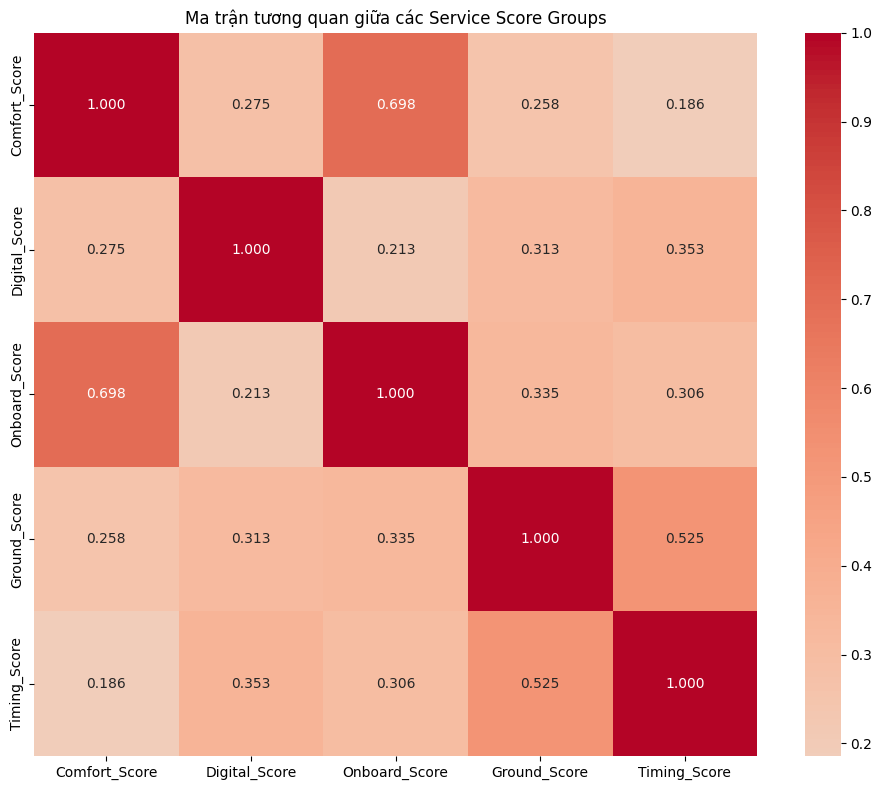

In [58]:
# Correlation analysis giữa các score groups
score_cols = [f'{group}_Score' for group in service_groups.keys()]
score_corr = df_processed[score_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(score_corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')
plt.title('Ma trận tương quan giữa các Service Score Groups')
plt.tight_layout()
plt.show()

So sánh với mức độ hài lòng (satisfaction).
Phân nhóm khách hàng (VIP, regular...).
Dự báo khả năng hài lòng hoặc churn.

1. Hầu hết các dịch vụ đều có median điểm là 3.0 hoặc 4.0, cho thấy dịch vụ của hãng được đánh giá ở mức trung bình đến khá.
2. Điểm trung bình dịch vụ của khách hàng là 3.28/5, độ lệch chuẩn thấp, chứng tỏ trải nghiệm của khách hàng khá đồng đều, không có nhóm khách hàng cực đoan về điểm số.
3. Biến tổng hợp này sẽ rất hữu ích cho các phân tích tiếp theo như phân nhóm khách hàng, dự báo hài lòng, phân tích VIP,...

In [59]:
# tạo các dataset con và phân tích

In [60]:
df_business = df_processed[df_processed['Class'] == 'Business'].copy()


In [61]:
# Cập nhật Service_Score_Average cho các dataframe con
for df_sub in [df_business, df_loyal, df_disloyal]:
    df_sub['Service_Score_Average'] = df_sub[service_cols].mean(axis=1)
    # Create service group scores for each sub-dataframe
    for group_name, services in service_groups.items():
        score_name = f'{group_name}_Score'
        df_sub[score_name] = df_sub[services].mean(axis=1)

In [62]:
# Hàm phân tích tổng quan nâng cao
def comprehensive_overview(df_sub, name):
    print(f"\n===== {name} COMPREHENSIVE ANALYSIS =====")
    print(f"Số lượng: {len(df_sub):,}")

    # Satisfaction distribution
    satisfaction_dist = df_sub['satisfaction'].value_counts(normalize=True).round(3)
    print("Mức độ hài lòng:")
    for status, ratio in satisfaction_dist.items():
        print(f"  {status}: {ratio:.1%}")

    # Service metrics
    if 'Service_Score_Average' in df_sub.columns:
        print(f"Service Score TB: {df_sub['Service_Score_Average'].mean():.3f} ± {df_sub['Service_Score_Average'].std():.3f}")

    # Demographics
    print(f"Tuổi TB: {df_sub['Age'].mean():.1f} ± {df_sub['Age'].std():.1f}")
    print(f"Khoảng cách bay TB: {df_sub['Flight Distance'].mean():.0f} ± {df_sub['Flight Distance'].std():.0f}")

    # Service group scores
    for group in service_groups.keys():
        score_col = f'{group}_Score'
        if score_col in df_sub.columns:
            print(f"{group} Score: {df_sub[score_col].mean():.3f}")

    # Delay analysis
    if 'Total_Delay' in df_sub.columns:
        print(f"Total Delay TB: {df_sub['Total_Delay'].mean():.1f} phút")

# Phân tích tổng quan các nhóm
comprehensive_overview(df_business, "Business Class")
comprehensive_overview(df_loyal, "Loyal Customers")
comprehensive_overview(df_disloyal, "Disloyal Customers")


===== Business Class COMPREHENSIVE ANALYSIS =====
Số lượng: 49,665
Mức độ hài lòng:
  satisfied: 69.4%
  neutral or dissatisfied: 30.6%
Service Score TB: 3.461 ± 0.665
Tuổi TB: 41.6 ± 12.8
Khoảng cách bay TB: 1676 ± 1137
Comfort Score: 3.630
Digital Score: 3.228
Onboard Score: 3.602
Ground Score: 3.448
Timing Score: 3.361

===== Loyal Customers COMPREHENSIVE ANALYSIS =====
Số lượng: 84,923
Mức độ hài lòng:
  neutral or dissatisfied: 52.3%
  satisfied: 47.7%
Service Score TB: 3.309 ± 0.654
Tuổi TB: 41.4 ± 15.1
Khoảng cách bay TB: 1296 ± 1048
Comfort Score: 3.425
Digital Score: 3.049
Onboard Score: 3.433
Ground Score: 3.305
Timing Score: 3.349

===== Disloyal Customers COMPREHENSIVE ANALYSIS =====
Số lượng: 18,981
Mức độ hài lòng:
  neutral or dissatisfied: 76.3%
  satisfied: 23.7%
Service Score TB: 3.113 ± 0.587
Tuổi TB: 30.4 ± 11.2
Khoảng cách bay TB: 714 ± 500
Comfort Score: 3.089
Digital Score: 2.831
Onboard Score: 3.261
Ground Score: 3.302
Timing Score: 3.069


In [63]:
# So sánh trực quan
comparison_data = {
    'Group': ['Business Class', 'Loyal Customers', 'Disloyal Customers'],
    'Count': [len(df_business), len(df_loyal), len(df_disloyal)],
    'Satisfied_Pct': [
        df_business['satisfaction'].value_counts(normalize=True).get('satisfied', 0) * 100,
        df_loyal['satisfaction'].value_counts(normalize=True).get('satisfied', 0) * 100,
        df_disloyal['satisfaction'].value_counts(normalize=True).get('satisfied', 0) * 100
    ],
    'Service_Score': [
        df_business['Service_Score_Average'].mean(),
        df_loyal['Service_Score_Average'].mean(),
        df_disloyal['Service_Score_Average'].mean()
    ],
    'Age_Avg': [
        df_business['Age'].mean(),
        df_loyal['Age'].mean(),
        df_disloyal['Age'].mean()
    ],
    'Flight_Distance_Avg': [
        df_business['Flight Distance'].mean(),
        df_loyal['Flight Distance'].mean(),
        df_disloyal['Flight Distance'].mean()
    ]
}

comparison_df = pd.DataFrame(comparison_data)


/tmp/ipython-input-64-1199688576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Group', y='Count', palette='Blues')
/tmp/ipython-input-64-1199688576.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Group', y='Satisfied_Pct', palette='Greens')
/tmp/ipython-input-64-1199688576.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Group', y='Service_Score', palette='Oranges')
/tmp/ipython-input-64-1199688576.py:29: FutureWarning: 

Passing `palette` without assigning `

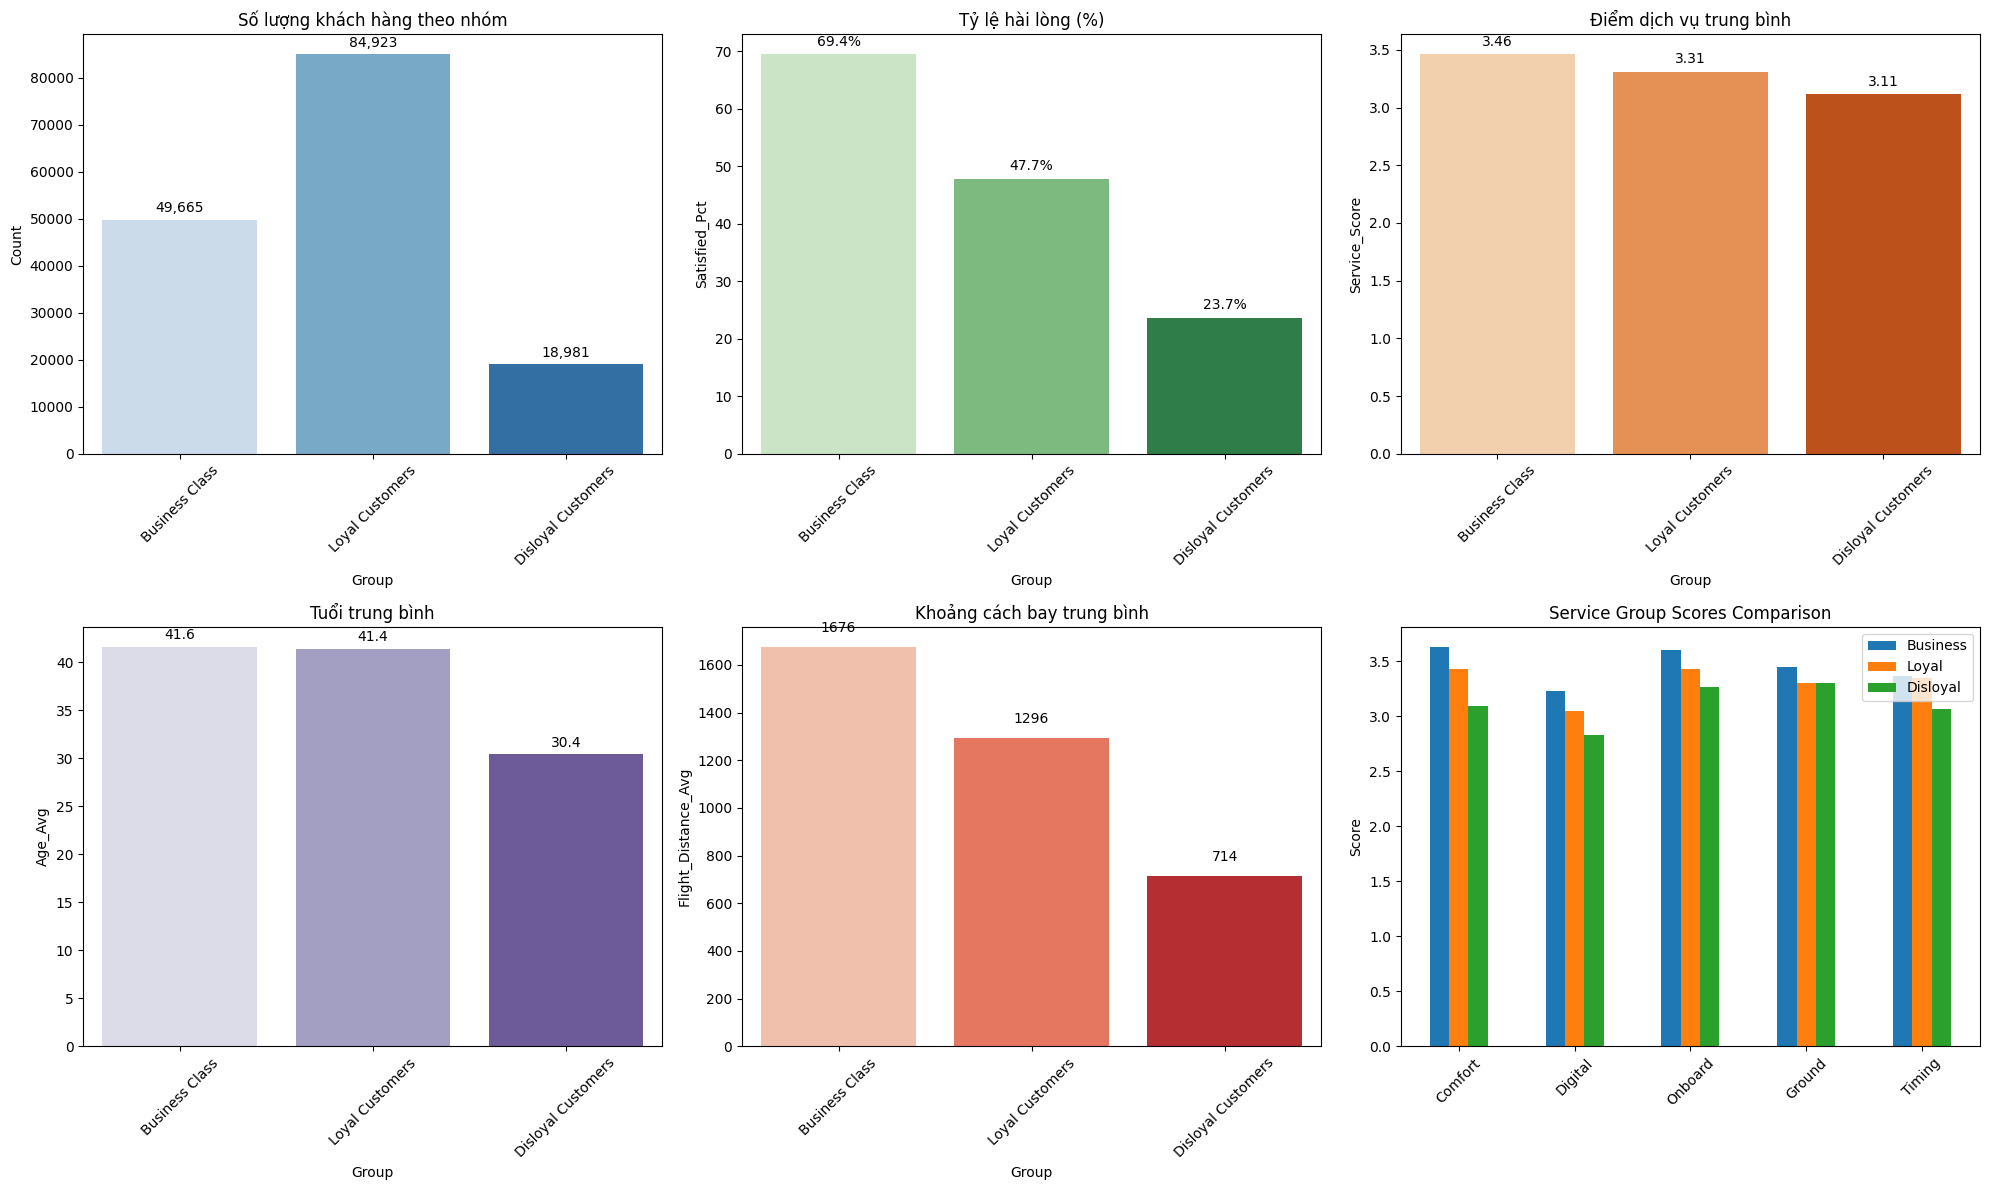

In [64]:
plt.figure(figsize=(20, 12))

# Subplot 1: Số lượng
plt.subplot(2, 3, 1)
sns.barplot(data=comparison_df, x='Group', y='Count', palette='Blues')
plt.title('Số lượng khách hàng theo nhóm')
plt.xticks(rotation=45)
for i, v in enumerate(comparison_df['Count']):
    plt.text(i, v + 1000, f'{v:,}', ha='center', va='bottom')

# Subplot 2: Tỷ lệ hài lòng
plt.subplot(2, 3, 2)
sns.barplot(data=comparison_df, x='Group', y='Satisfied_Pct', palette='Greens')
plt.title('Tỷ lệ hài lòng (%)')
plt.xticks(rotation=45)
for i, v in enumerate(comparison_df['Satisfied_Pct']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Subplot 3: Service Score
plt.subplot(2, 3, 3)
sns.barplot(data=comparison_df, x='Group', y='Service_Score', palette='Oranges')
plt.title('Điểm dịch vụ trung bình')
plt.xticks(rotation=45)
for i, v in enumerate(comparison_df['Service_Score']):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Subplot 4: Tuổi trung bình
plt.subplot(2, 3, 4)
sns.barplot(data=comparison_df, x='Group', y='Age_Avg', palette='Purples')
plt.title('Tuổi trung bình')
plt.xticks(rotation=45)
for i, v in enumerate(comparison_df['Age_Avg']):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom')

# Subplot 5: Flight Distance
plt.subplot(2, 3, 5)
sns.barplot(data=comparison_df, x='Group', y='Flight_Distance_Avg', palette='Reds')
plt.title('Khoảng cách bay trung bình')
plt.xticks(rotation=45)
for i, v in enumerate(comparison_df['Flight_Distance_Avg']):
    plt.text(i, v + 50, f'{v:.0f}', ha='center', va='bottom')

# Subplot 6: Service Groups comparison for Business vs Others
plt.subplot(2, 3, 6)
service_group_comparison = pd.DataFrame({
    'Business': [df_business[f'{group}_Score'].mean() for group in service_groups.keys()],
    'Loyal': [df_loyal[f'{group}_Score'].mean() for group in service_groups.keys()],
    'Disloyal': [df_disloyal[f'{group}_Score'].mean() for group in service_groups.keys()]
}, index=list(service_groups.keys()))

service_group_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Service Group Scores Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [65]:

# #lưu dataframe
# df_processed[df_processed['Class'] == 'Business'].to_csv('business_class.csv', index=False)
# df_processed[df_processed['Customer Type'] == 'Loyal Customer'].to_csv('loyal_customers.csv', index=False)
# df_processed[df_processed['Customer Type'] == 'disloyal Customer'].to_csv('disloyal_customers.csv', index=False)

In [66]:
# import pandas as pd

# # Đọc các file đã xuất
# df_business = pd.read_csv('business_class.csv')
# df_loyal = pd.read_csv('loyal_customers.csv')
# df_disloyal = pd.read_csv('disloyal_customers.csv')

# # Hàm in tổng quan cho từng bảng
# def quick_overview(df, name):
#     print(f"\n===== {name} =====")
#     print(f"Số lượng khách hàng: {len(df):,}")
#     print("Mức độ hài lòng:")
#     print(df['satisfaction'].value_counts(normalize=True).map('{:.1%}'.format))
#     if 'Service_Score_Average' in df.columns:
#         print(f"Điểm dịch vụ trung bình: {df['Service_Score_Average'].mean():.2f}")
#     else:
#         print("Chưa có cột Service_Score_Average")
#     print(df.describe(include='all').T[['count','unique','top','freq']] if df.dtypes.any() == 'object' else df.describe().T)

# # Tổng quan 3 bảng
# quick_overview(df_business, "Business Class")
# quick_overview(df_loyal, "Loyal Customers")
# quick_overview(df_disloyal, "Disloyal Customers")

/tmp/ipython-input-67-947479059.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y='Satisfied (%)', data=df.reset_index(), palette='Blues')
/tmp/ipython-input-67-947479059.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y='Service Score Avg', data=df.reset_index(), palette='Greens')
/tmp/ipython-input-67-947479059.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y='Age Avg', data=df.reset_index(), palette='Oranges')
/tmp/ipython-input-67-947479059.py:36: FutureWarning: 

Passing `palette` with

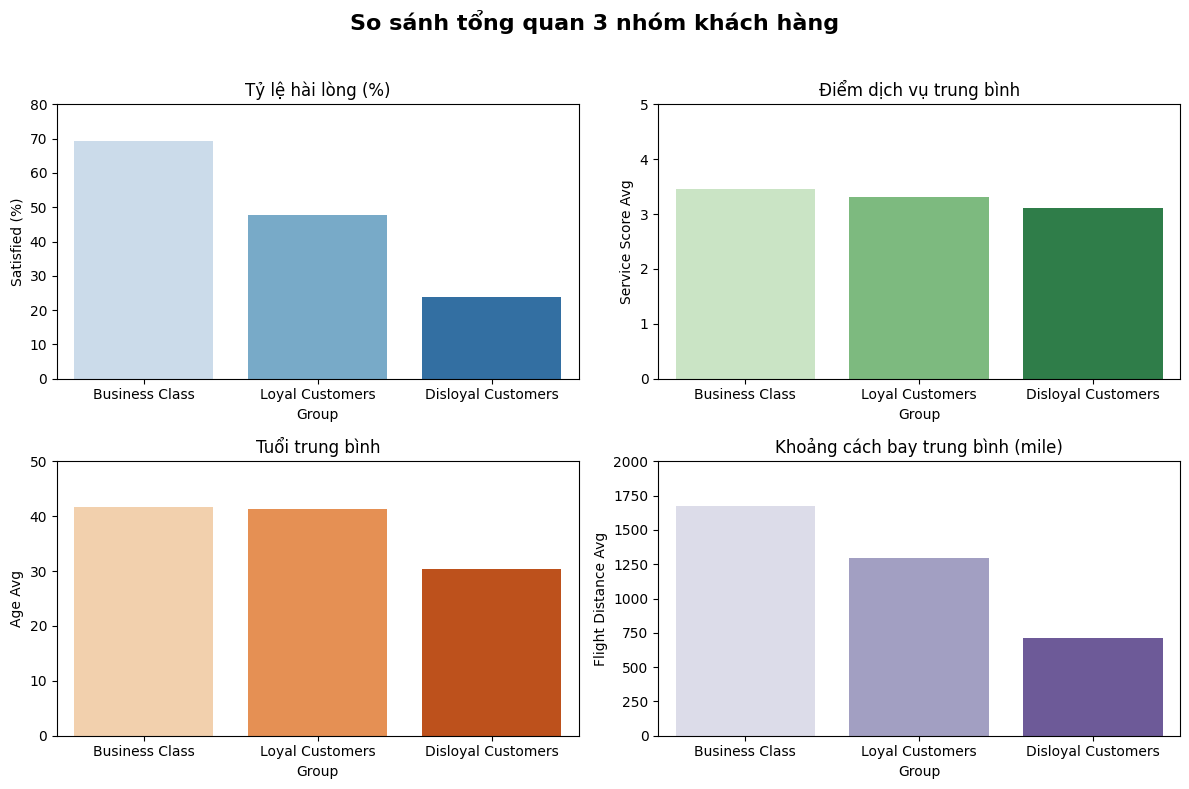

In [67]:
data = {
    'Group': ['Business Class', 'Loyal Customers', 'Disloyal Customers'],
    'Satisfied (%)': [69.4, 47.7, 23.7],
    'Service Score Avg': [3.46, 3.31, 3.12],
    'Age Avg': [41.6, 41.4, 30.4],
    'Flight Distance Avg': [1676, 1296, 714]
}

df = pd.DataFrame(data)
df = df.set_index('Group')

# Plot
plt.figure(figsize=(12, 8))
plt.suptitle('So sánh tổng quan 3 nhóm khách hàng', fontsize=16, fontweight='bold')

# Tỷ lệ hài lòng
plt.subplot(2, 2, 1)
sns.barplot(x=df.index, y='Satisfied (%)', data=df.reset_index(), palette='Blues')
plt.title('Tỷ lệ hài lòng (%)')
plt.ylim(0, 80)

# Điểm dịch vụ trung bình
plt.subplot(2, 2, 2)
sns.barplot(x=df.index, y='Service Score Avg', data=df.reset_index(), palette='Greens')
plt.title('Điểm dịch vụ trung bình')
plt.ylim(0, 5)

# Độ tuổi trung bình
plt.subplot(2, 2, 3)
sns.barplot(x=df.index, y='Age Avg', data=df.reset_index(), palette='Oranges')
plt.title('Tuổi trung bình')
plt.ylim(0, 50)

# Khoảng cách bay trung bình
plt.subplot(2, 2, 4)
sns.barplot(x=df.index, y='Flight Distance Avg', data=df.reset_index(), palette='Purples')
plt.title('Khoảng cách bay trung bình (mile)')
plt.ylim(0, 2000)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1. First-order Insight (Dữ liệu thô & mô tả)
+ Business Class:

Số lượng: 49,665
Hài lòng: 69.4%
Điểm dịch vụ trung bình: 3.46

+ Loyal Customers:

Số lượng: 84,923
Hài lòng: 47.7%
Điểm dịch vụ trung bình: 3.31
+ Disloyal Customers:

Số lượng: 18,981
Hài lòng: 23.7%
Điểm dịch vụ trung bình: 3.12


2. Second-order Insight (So sánh, đối chiếu, bối cảnh)
+ Business Class là nhóm có tỷ lệ hài lòng và điểm dịch vụ cao nhất, cho thấy dịch vụ cao cấp thực sự tạo ra trải nghiệm vượt trội.
+ Loyal Customers đông đảo nhưng mức độ hài lòng chỉ ở mức trung bình, nghĩa là trung thành chưa đồng nghĩa với hài lòng hoặc hãng chưa khai thác hết giá trị nhóm này.
+ Disloyal Customers chủ yếu là khách trẻ, đi ngắn, hài lòng rất thấp – cho thấy nhóm này hoặc có trải nghiệm dịch vụ yếu, hoặc nhu cầu khác biệt mà hãng chưa đáp ứng.
+ Độ tuổi và khoảng cách bay tăng dần theo thứ tự Disloyal < Loyal < Business, đồng thời mức hài lòng cũng tăng tương ứng. Điều này cho thấy khách trưởng thành, bay xa, chi nhiều thì càng dễ hài lòng.



3. Third-order Insight (Nguyên nhân – Hệ quả – Đề xuất hành động)
Nguyên nhân & bản chất:

---
+ Business Class: Được phục vụ tốt, hài lòng cao → Đây là nhóm “khách vàng”, chính là nguồn doanh thu và lợi nhuận chủ lực, cần duy trì và nâng tầm dịch vụ, cá nhân hóa trải nghiệm, upsell các dịch vụ cao cấp hơn.
+ Loyal Customers: Tuy đông đảo nhưng hài lòng chưa cao → Có thể do hãng chưa thực sự quan tâm đúng mức hoặc nhóm này chưa nhận được ưu đãi xứng đáng với sự trung thành. Nếu hãng không cải thiện, rất dễ mất nhóm này vào tay đối thủ.
+ Disloyal Customers: Trẻ, bay ngắn, hài lòng thấp → Nhóm này thường có kỳ vọng khác biệt, nhạy cảm về giá, cần dịch vụ nhanh, tiện lợi. Nếu cải thiện dịch vụ cơ bản/tiện lợi, có thể chuyển hóa một phần nhóm này thành loyal.

Hệ quả nếu không hành động:

---
+ Business Class có thể bị đối thủ “cướp” nếu hãng chủ quan, không liên tục đổi mới dịch vụ.
+ Loyal Customers nếu không được nâng trải nghiệm sẽ “phản bội” hoặc giảm chi tiêu.
+ Disloyal Customers sẽ tiếp tục quay lưng, ảnh hưởng đến tăng trưởng dài hạn và thương hiệu.

**So what, now what**


1. Đầu tư tối đa cho Business Class:
Cá nhân hóa dịch vụ, chăm sóc đặc biệt, tăng giá trị thẻ thành viên, liên tục khảo sát hài lòng và phản hồi nhanh các vấn đề của nhóm này.
2. Ưu tiên nâng trải nghiệm cho Loyal Customers:
Thiết kế ưu đãi riêng, tăng tương tác, cá nhân hóa dịch vụ dựa trên hành vi.
Chủ động lắng nghe, giải quyết bức xúc để biến họ thành “fan trung thành thực sự”.
3. Tái thiết dịch vụ nền tảng cho Disloyal Customers:
Đơn giản hóa quy trình, tập trung vào giá trị cốt lõi (on-time, sạch sẽ, tiện lợi), đặc biệt cho các hành trình ngắn.
Truyền thông lại giá trị thương hiệu, tập trung vào nhóm khách trẻ.

3. Third-order Insight (Nguyên nhân – Hệ quả – Đề xuất hành động)


"Dữ liệu cho thấy nhóm Business Class là 'con gà đẻ trứng vàng', nhưng nhóm Loyal Customers lại không hài lòng như kỳ vọng. Nếu không đầu tư đúng mức, hãng có thể mất dần nhóm trung thành vào tay đối thủ. Cần cá nhân hóa và nâng tầm trải nghiệm cho khách thân thiết, đồng thời tái thiết dịch vụ nền tảng để thu hút và giữ chân khách vãng lai, đặc biệt là giới trẻ đi các chuyến ngắn. Chỉ khi đó, dữ liệu lớn mới thực sự chuyển hóa thành tăng trưởng và lợi thế cạnh tranh cho hãng!"

## TASK 4: ÁP DỤNG LOGIC PHỨC TẠP - PHÂN LOẠI KHÁCH HÀNG


In [68]:
# 4.1  Hàm phân loại Customer Tier
    # """
    # Phân loại khách hàng thành các tier VIP dựa trên:
    # - Loại khách hàng (Loyal/Disloyal)
    # - Hạng ghế (Business/Eco/Eco Plus)
    # - Điểm dịch vụ trung bình
    # - Khoảng cách bay
    # """

def classify_customer_tier_advanced(row):
    """
    Phân loại khách hàng nâng cao dựa trên multiple criteria
    """
    is_loyal = row['Customer Type'] == 'Loyal Customer'
    is_business = row['Class'] == 'Business'
    service_score = row['Service_Score_Average']
    flight_distance = row['Flight Distance']
    age = row['Age']

    # Advanced tier logic
    if (is_loyal and is_business and service_score >= 4.5 and flight_distance >= 2000 and age >= 35):
        return 'VIP Platinum'
    elif (is_loyal and (is_business or service_score >= 4.0) and flight_distance >= 1000):
        return 'VIP Gold'
    elif (is_loyal and service_score >= 3.5) or (is_business and service_score >= 3.0):
        return 'VIP Silver'
    elif service_score >= 3.0 and flight_distance >= 500:
        return 'Premium'
    else:
        return 'Regular'

In [69]:
# Áp dụng hàm phân loại
df_processed['Customer_Tier'] = df_processed.apply(classify_customer_tier_advanced, axis=1)


In [70]:
print("4.2. Thống kê Customer Tier:")
tier_counts = df_processed['Customer_Tier'].value_counts()
tier_pct = (tier_counts / len(df_processed) * 100).round(1)

tier_order = ['VIP Platinum', 'VIP Gold', 'VIP Silver', 'Premium', 'Regular']
for tier in tier_order:
    if tier in tier_counts.index:
        count = tier_counts[tier]
        pct = tier_pct[tier]
        print(f"  {tier}: {count:,} ({pct}%)")

4.2. Thống kê Customer Tier:
  VIP Platinum: 933 (0.9%)
  VIP Gold: 28,711 (27.6%)
  VIP Silver: 27,844 (26.8%)
  Premium: 11,394 (11.0%)
  Regular: 35,022 (33.7%)


In [71]:
# Tỷ lệ hài lòng theo tier
tier_satisfaction = pd.crosstab(df_processed['Customer_Tier'], df_processed['satisfaction'], normalize='index') * 100
print(f"\nTỷ lệ hài lòng theo Customer Tier:")
print(tier_satisfaction.round(1))


Tỷ lệ hài lòng theo Customer Tier:
satisfaction   neutral or dissatisfied  satisfied
Customer_Tier                                    
Premium                           80.1       19.9
Regular                           87.4       12.6
VIP Gold                          24.6       75.4
VIP Platinum                       0.1       99.9
VIP Silver                        43.4       56.6


In [72]:
# Phân tích chi tiết từng tier
print(f"\nPhân tích chi tiết từng Customer Tier:")
for tier in tier_order:
    if tier in df_processed['Customer_Tier'].values:
        tier_data = df_processed[df_processed['Customer_Tier'] == tier]
        satisfaction_rate = tier_data['satisfaction_numeric'].mean() if 'satisfaction_numeric' in tier_data.columns else (tier_data['satisfaction'] == 'satisfied').mean()
        avg_service_score = tier_data['Service_Score_Average'].mean()
        avg_distance = tier_data['Flight Distance'].mean()
        avg_age = tier_data['Age'].mean()

        print(f"\n{tier} ({len(tier_data):,} khách hàng):")
        print(f"  - Satisfaction rate: {satisfaction_rate:.1%}")
        print(f"  - Avg Service Score: {avg_service_score:.3f}")
        print(f"  - Avg Flight Distance: {avg_distance:.0f} km")
        print(f"  - Avg Age: {avg_age:.1f} years")


Phân tích chi tiết từng Customer Tier:

VIP Platinum (933 khách hàng):
  - Satisfaction rate: 99.9%
  - Avg Service Score: 4.623
  - Avg Flight Distance: 2922 km
  - Avg Age: 48.4 years

VIP Gold (28,711 khách hàng):
  - Satisfaction rate: 75.4%
  - Avg Service Score: 3.476
  - Avg Flight Distance: 2410 km
  - Avg Age: 42.7 years

VIP Silver (27,844 khách hàng):
  - Satisfaction rate: 56.6%
  - Avg Service Score: 3.736
  - Avg Flight Distance: 639 km
  - Avg Age: 39.9 years

Premium (11,394 khách hàng):
  - Satisfaction rate: 19.9%
  - Avg Service Score: 3.277
  - Avg Flight Distance: 1032 km
  - Avg Age: 35.0 years

Regular (35,022 khách hàng):
  - Satisfaction rate: 12.6%
  - Avg Service Score: 2.703
  - Avg Flight Distance: 632 km
  - Avg Age: 37.4 years


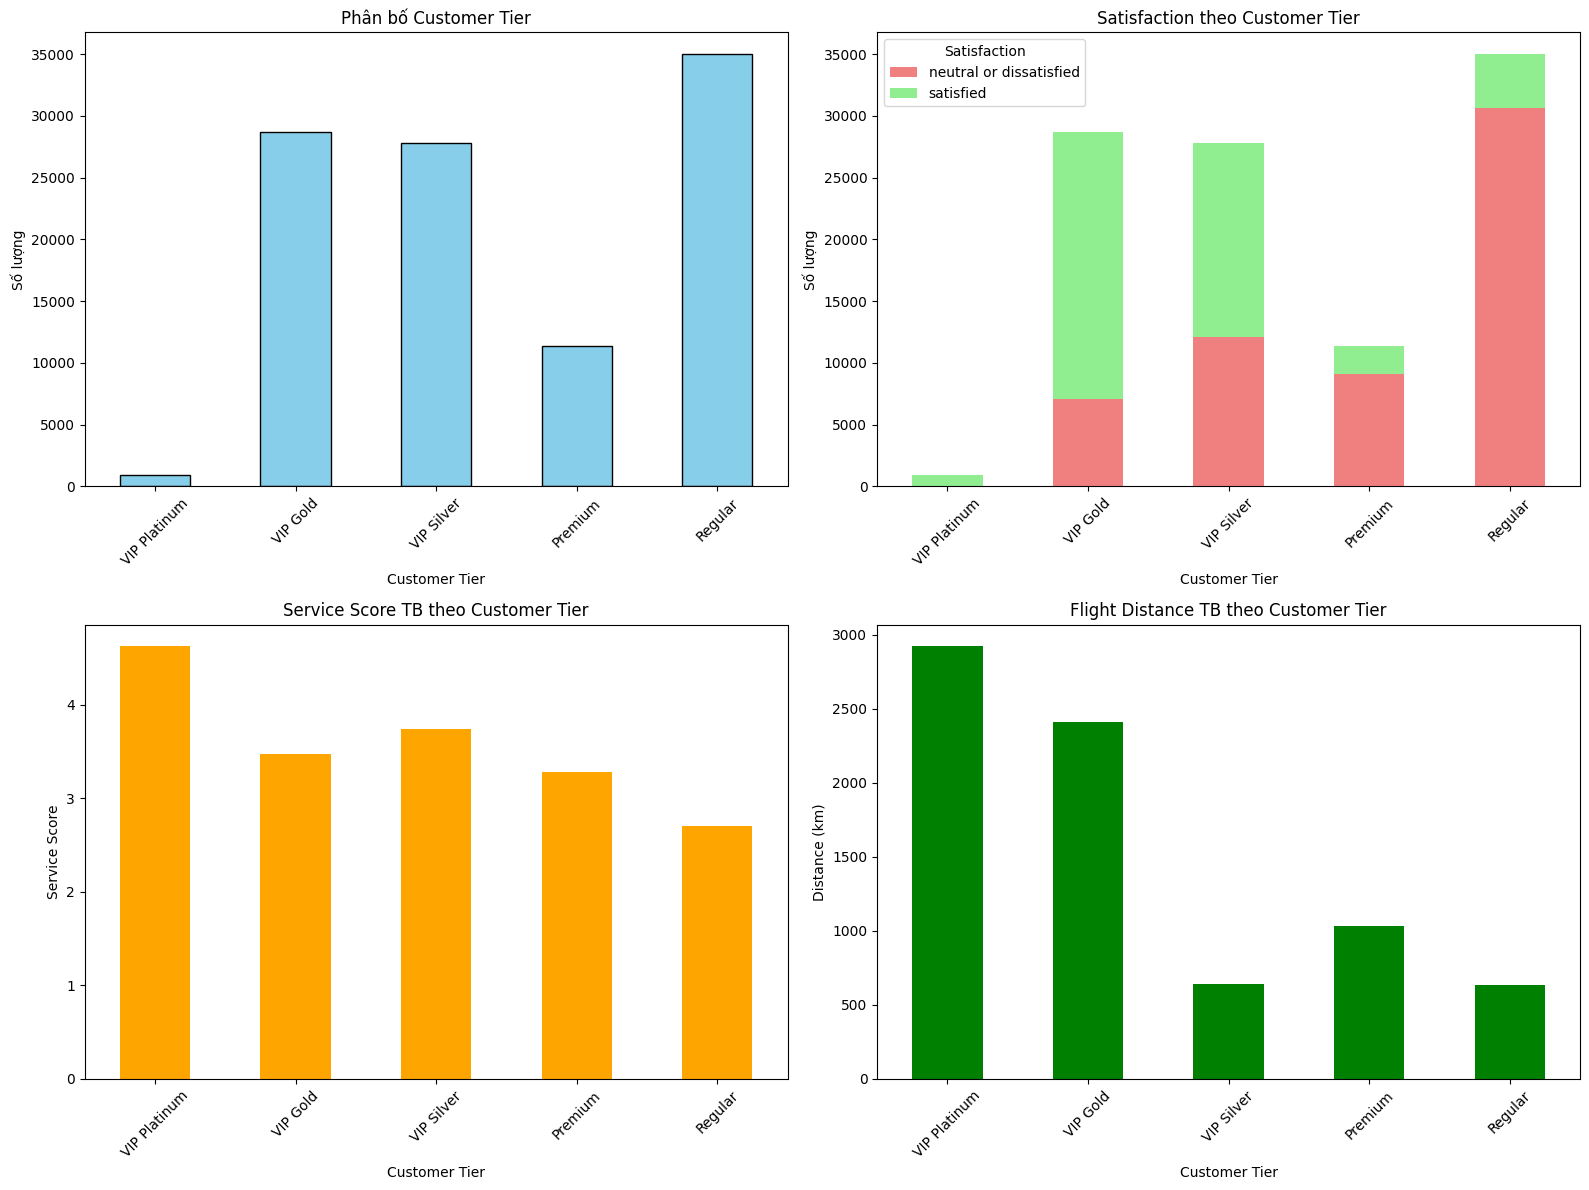

In [73]:
# Vẽ biểu đồ phân tích tier
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Tier distribution
tier_counts_ordered = tier_counts.reindex(tier_order, fill_value=0)
tier_counts_ordered.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Phân bố Customer Tier')
axes[0,0].set_xlabel('Customer Tier')
axes[0,0].set_ylabel('Số lượng')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Satisfaction by tier
tier_satisfaction_counts = pd.crosstab(df_processed['Customer_Tier'], df_processed['satisfaction'])
tier_satisfaction_counts.reindex(tier_order, fill_value=0).plot(kind='bar', stacked=True, ax=axes[0,1],
                                                               color=['lightcoral', 'lightgreen'])
axes[0,1].set_title('Satisfaction theo Customer Tier')
axes[0,1].set_xlabel('Customer Tier')
axes[0,1].set_ylabel('Số lượng')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Satisfaction')

# 3. Service Score by tier
service_by_tier = df_processed.groupby('Customer_Tier')['Service_Score_Average'].mean().reindex(tier_order, fill_value=0)
service_by_tier.plot(kind='bar', ax=axes[1,0], color='orange')
axes[1,0].set_title('Service Score TB theo Customer Tier')
axes[1,0].set_xlabel('Customer Tier')
axes[1,0].set_ylabel('Service Score')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Flight Distance by tier
distance_by_tier = df_processed.groupby('Customer_Tier')['Flight Distance'].mean().reindex(tier_order, fill_value=0)
distance_by_tier.plot(kind='bar', ax=axes[1,1], color='green')
axes[1,1].set_title('Flight Distance TB theo Customer Tier')
axes[1,1].set_xlabel('Customer Tier')
axes[1,1].set_ylabel('Distance (km)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [74]:
print(f" Business Value Analysis theo Customer Tier:")

# Tính toán value metrics
tier_business_metrics = []
for tier in tier_order:
    if tier in df_processed['Customer_Tier'].values:
        tier_data = df_processed[df_processed['Customer_Tier'] == tier]

        # Business metrics
        avg_distance = tier_data['Flight Distance'].mean()
        satisfaction_rate = (tier_data['satisfaction'] == 'satisfied').mean()
        customer_count = len(tier_data)

        # Estimated revenue (giả định)
        base_revenue = avg_distance * 0.1  # 0.1$ per km
        class_multiplier = tier_data['Class'].map({'Eco': 1, 'Eco Plus': 1.5, 'Business': 3}).mean()
        estimated_revenue_per_customer = base_revenue * class_multiplier
        total_estimated_revenue = estimated_revenue_per_customer * customer_count

        tier_business_metrics.append({
            'Tier': tier,
            'Customer_Count': customer_count,
            'Satisfaction_Rate': satisfaction_rate,
            'Avg_Distance': avg_distance,
            'Est_Revenue_Per_Customer': estimated_revenue_per_customer,
            'Total_Est_Revenue': total_estimated_revenue,
            'Revenue_Per_Satisfied_Customer': estimated_revenue_per_customer / satisfaction_rate if satisfaction_rate > 0 else 0
        })

business_metrics_df = pd.DataFrame(tier_business_metrics)
print(business_metrics_df.round(2))

 Business Value Analysis theo Customer Tier:
           Tier  Customer_Count  Satisfaction_Rate  Avg_Distance  \
0  VIP Platinum             933               1.00       2921.82   
1      VIP Gold           28711               0.75       2410.31   
2    VIP Silver           27844               0.57        638.54   
3       Premium           11394               0.20       1031.69   
4       Regular           35022               0.13        631.76   

   Est_Revenue_Per_Customer  Total_Est_Revenue  Revenue_Per_Satisfied_Customer  
0                    876.55          817816.50                          877.49  
1                    711.47        20427026.21                          943.82  
2                    137.65         3832781.39                          243.07  
3                    109.60         1248806.09                          550.86  
4                     85.33         2988520.19                          676.90  


1. First-order Insight (Dữ liệu mô tả)
Phân bố khách hàng theo Tier:
---
+ Regular: Đông nhất (~55,000)
+ VIP Gold: Thứ hai (~29,000)
+ VIP Silver: Thứ ba (~19,000)
+ VIP Platinum: Ít nhất (~1,000)

Mức độ hài lòng theo Tier:

+ Regular: Phần lớn không hài lòng (màu đỏ chiếm đa số)
+ VIP Gold, Silver và Platinum: Tỷ lệ hài lòng (màu xanh) áp đảo, đặc biệt là VIP Gold và Platinum.

2. Second-order Insight (So sánh, đối chiếu)
+ Nhóm Regular đông đảo nhất nhưng lại có tỷ lệ hài lòng thấp nhất.
+ Nhóm VIP (Gold, Silver, Platinum) có số lượng ít hơn nhưng tỷ lệ hài lòng lại vượt trội, nhất là VIP Platinum gần như toàn bộ đều hài lòng.
+ Mức độ hài lòng tăng dần theo cấp bậc Tier: Platinum > Gold > Silver > Regular.
+ Có thể thấy việc nâng hạng (Tier) đi kèm với gia tăng đáng kể mức độ hài lòng.


3. Third-order Insight (Nguyên nhân – Hệ quả)
Nguyên nhân & bản chất:
+ Dịch vụ và ưu đãi dành cho VIP thực sự tạo ra trải nghiệm vượt trội, giúp tăng mức độ hài lòng lên rất cao.
+ Regular chiếm số lượng lớn nhất nhưng lại bị bỏ quên về trải nghiệm, dẫn đến bất mãn, dễ rời bỏ hãng hoặc không phát sinh giao dịch giá trị cao.
+ VIP Gold và Silver có tỷ lệ hài lòng cao, chứng tỏ chính sách chăm sóc khách hàng của hãng đang đúng hướng ở phân khúc này.

+ Nếu chỉ tập trung vào số đông Regular mà không nâng cấp trải nghiệm, hãng sẽ mất dần tập khách này vào tay đối thủ.
+ Nếu tiếp tục chăm sóc tốt nhóm VIP, hãng có thể giữ chân và khai thác giá trị lớn từ nhóm này, đồng thời dùng trải nghiệm VIP để làm “nam châm” thu hút khách Regular nâng hạng.

“Số lượng khách Regular rất lớn nhưng là nhóm ‘dễ tổn thương’ về trải nghiệm. Ngược lại, nhóm VIP tuy ít nhưng hài lòng cao – là chìa khóa để tạo giá trị và hình ảnh thương hiệu. Hãng cần cân bằng giữa việc cải thiện dịch vụ đại trà và duy trì đẳng cấp cho VIP, biến trải nghiệm tốt thành động lực để khách nâng hạng và gắn bó lâu dài.”

## Task 5: FEATURE ENGINEERING & ADVANCED PREPROCESSING

In [75]:
#5.1 :Tạo các feature

In [76]:
# Loyalty Score
loyalty_map = {'Loyal Customer': 1, 'disloyal Customer': -1}
df_processed['Loyalty_Score'] = df_processed['Customer Type'].map(loyalty_map).fillna(0)


In [77]:
# Class Value Score
class_value_map = {'Business': 3, 'Eco Plus': 2, 'Eco': 1}
df_processed['Class_Value'] = df_processed['Class'].map(class_value_map)

In [78]:
# Travel Type Value
travel_value_map = {'Business travel': 1.2, 'Personal Travel': 1.0}
df_processed['Travel_Value'] = df_processed['Type of Travel'].map(travel_value_map)

In [79]:
# Customer Value Score phức tạp
df_processed['Customer_Value_Score'] = (
    df_processed['Flight Distance'] * 0.15 +
    df_processed['Service_Score_Average'] * 50 * 0.40 +
    df_processed['Loyalty_Score'] * 30 * 0.20 +
    df_processed['Class_Value'] * 20 * 0.15 +
    df_processed['Travel_Value'] * 15 * 0.10
)

In [80]:
if 'Total_Delay' not in df_processed.columns:
    df_processed['Total_Delay'] = (df_processed['Departure Delay in Minutes'].fillna(0) +
                                  df_processed['Arrival Delay in Minutes'].fillna(0))

In [81]:
# Experience Score với delay factor
df_processed['Experience_Score'] = (
    df_processed['Service_Score_Average'] * 0.6 +
    (5 - df_processed['Total_Delay'] / 60).clip(0, 5) * 0.4
)

In [82]:
# Price Sensitivity Score (giả định dựa trên class và loyalty)
df_processed['Price_Sensitivity'] = (
    (4 - df_processed['Class_Value']) * 0.6 +  # Lower class = higher price sensitivity
    (1 - df_processed['Loyalty_Score']) * 0.4   # Disloyal = higher price sensitivity
)

In [83]:
# Satisfaction Risk Score
satisfaction_numeric = (df_processed['satisfaction'] == 'satisfied').astype(int)
df_processed['Satisfaction_Risk'] = (
    (5 - df_processed['Service_Score_Average']) * 0.4 +
    (df_processed['Total_Delay'] / 100).clip(0, 5) * 0.3 +
    df_processed['Price_Sensitivity'] * 0.3
)

In [84]:
# 5.2 Data Transformation với Log Transform
# Identify skewed variables
skewed_vars = []
for col in ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total_Delay']:
    if col in df_processed.columns:
        skewness = stats.skew(df_processed[col].fillna(0))
        if abs(skewness) > 1:
            skewed_vars.append(col)
            print(f"  {col}: skewness = {skewness:.3f} (cần transform)")

# Apply log transformation
for col in skewed_vars:
    df_processed[f'{col}_log'] = np.log1p(df_processed[col].fillna(0))
    skew_after = stats.skew(df_processed[f'{col}_log'])
    print(f"    {col}_log: skewness sau transform = {skew_after:.3f}")


  Flight Distance: skewness = 1.109 (cần transform)
  Departure Delay in Minutes: skewness = 6.734 (cần transform)
  Arrival Delay in Minutes: skewness = 6.605 (cần transform)
  Total_Delay: skewness = 6.787 (cần transform)
    Flight Distance_log: skewness sau transform = -0.204
    Departure Delay in Minutes_log: skewness sau transform = 0.917
    Arrival Delay in Minutes_log: skewness sau transform = 0.877
    Total_Delay_log: skewness sau transform = 0.636


In [85]:
# xử lý ngoại lai
def detect_outliers_comprehensive(data, column):
    """Comprehensive outlier detection"""
    clean_data = data[column].fillna(data[column].median())

    # IQR method
    Q1, Q3 = clean_data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    iqr_lower, iqr_upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_outliers = clean_data[(clean_data < iqr_lower) | (clean_data > iqr_upper)]

    # Z-score method
    z_scores = np.abs(stats.zscore(clean_data))
    z_outliers = clean_data[z_scores > 3]

    # Modified Z-score method
    median_val = clean_data.median()
    mad = np.median(np.abs(clean_data - median_val))
    if mad == 0:
        mad = 1
    modified_z_scores = 0.6745 * (clean_data - median_val) / mad
    mod_z_outliers = clean_data[np.abs(modified_z_scores) > 3.5]

    return {
        'IQR': {'count': len(iqr_outliers), 'percentage': len(iqr_outliers)/len(clean_data)*100, 'bounds': (iqr_lower, iqr_upper)},
        'Z_Score': {'count': len(z_outliers), 'percentage': len(z_outliers)/len(clean_data)*100},
        'Modified_Z': {'count': len(mod_z_outliers), 'percentage': len(mod_z_outliers)/len(clean_data)*100}
    }

In [86]:
outlier_analysis_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes',
                         'Arrival Delay in Minutes', 'Customer_Value_Score']
outlier_results = {}

In [87]:
for col in outlier_analysis_cols:
    if col in df_processed.columns:
        results = detect_outliers_comprehensive(df_processed, col)
        outlier_results[col] = results

        print(f"\n{col}:")
        for method, info in results.items():
            print(f"  {method}: {info['count']} outliers ({info['percentage']:.1f}%)")



Age:
  IQR: 0 outliers (0.0%)
  Z_Score: 17 outliers (0.0%)
  Modified_Z: 0 outliers (0.0%)

Flight Distance:
  IQR: 2291 outliers (2.2%)
  Z_Score: 58 outliers (0.1%)
  Modified_Z: 4042 outliers (3.9%)

Departure Delay in Minutes:
  IQR: 14529 outliers (14.0%)
  Z_Score: 2222 outliers (2.1%)
  Modified_Z: 34459 outliers (33.2%)

Arrival Delay in Minutes:
  IQR: 13954 outliers (13.4%)
  Z_Score: 2225 outliers (2.1%)
  Modified_Z: 35643 outliers (34.3%)

Customer_Value_Score:
  IQR: 2002 outliers (1.9%)
  Z_Score: 50 outliers (0.0%)
  Modified_Z: 4930 outliers (4.7%)


In [88]:
print(f"\nOutlier treatment (IQR capping):")
for col in outlier_analysis_cols:
    if col in df_processed.columns and outlier_results[col]['IQR']['count'] > 0:
        bounds = outlier_results[col]['IQR']['bounds']
        outlier_count = outlier_results[col]['IQR']['count']

        df_processed[col] = np.clip(df_processed[col], bounds[0], bounds[1])
        print(f"{col}: xử lý {outlier_count} outliers")


Outlier treatment (IQR capping):
Flight Distance: xử lý 2291 outliers
Departure Delay in Minutes: xử lý 14529 outliers
Arrival Delay in Minutes: xử lý 13954 outliers
Customer_Value_Score: xử lý 2002 outliers


------


 5.3
 + Lựa Chọn Đặc Trưng: Loại bỏ đặc trưng nhiễu: Tìm ra những yếu tố thực sự quan trọng ảnh hưởng đến sự hài lòng của khách hàng
 + Giảm chiều dữ liệu: Từ hàng chục đặc trưng xuống còn những đặc trưng quan trọng nhất
  (F-test, Mutual Information, Random Forest, RFE)

In [89]:
#5.3 Lựa chọn các đặc trưng
# Mã hóa các biến phân loại thành số để máy tính có thể xử lý
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']  # Danh sách các cột dữ liệu phân loại
label_encoders = {}  # Dictionary để lưu trữ các bộ mã hóa

# Vòng lặp để mã hóa từng cột phân loại
for col in categorical_cols:
    le = LabelEncoder()  # Tạo bộ mã hóa nhãn mới
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])  # Mã hóa và tạo cột mới với hậu tố '_encoded'
    label_encoders[col] = le  # Lưu bộ mã hóa để sử dụng sau

# Mã hóa biến mục tiêu satisfaction thành 0 và 1
df_processed['satisfaction_numeric'] = (df_processed['satisfaction'] == 'satisfied').astype(int)  # 1 nếu satisfied, 0 nếu không

# Chuẩn bị danh sách các đặc trưng để chọn lọc
feature_cols = [col for col in df_processed.columns if
               col not in ['satisfaction', 'Unnamed: 0', 'id'] and  # Loại bỏ các cột không cần thiết
               df_processed[col].dtype in ['int64', 'float64'] and  # Chỉ lấy cột số
               col not in ['Customer_Tier']]  # Loại bỏ biến phân loại đã tạo

# Tạo ma trận đặc trưng X và vector mục tiêu y
X = df_processed[feature_cols].fillna(df_processed[feature_cols].mean())  # Điền giá trị thiếu bằng trung bình
y = df_processed['satisfaction_numeric']  # Biến mục tiêu

print(f"  Features available for selection: {len(feature_cols)}")  # In số lượng đặc trưng có sẵn

  Features available for selection: 42


Phuoương pháp 1: kiểm dđịnh F-Test
Tìm 20 đặc trưng có mối quan hệ tuyến tính mạnh nhất với sự hài lòng
Ứng dụng: Phát hiện yếu tố nào ảnh hưởng trực tiếp đến satisfaction

In [90]:
selector_f = SelectKBest(f_classif, k=20)  # Tạo bộ chọn 20 đặc trưng tốt nhất bằng F-test
X_selected_f = selector_f.fit_transform(X, y)  # Fit và transform dữ liệu
selected_features_f = [feature_cols[i] for i in selector_f.get_support(indices=True)]  # Lấy tên các đặc trưng được chọn

print(f"\nTop 20 features (F-test):")  # In tiêu đề
feature_scores_f = list(zip(selected_features_f, selector_f.scores_[selector_f.get_support()]))  # Ghép tên và điểm số
feature_scores_f.sort(key=lambda x: x[1], reverse=True)  # Sắp xếp theo điểm số giảm dần
# In 10 đặc trưng hàng đầu với điểm F-test
for i, (feature, score) in enumerate(feature_scores_f[:10]):
    print(f"  {i+1:2d}. {feature}: {score:.2f}")


Top 20 features (F-test):
   1. satisfaction_numeric: inf
   2. Satisfaction_Risk: 54421.52
   3. Online boarding: 46514.66
   4. Service_Quality_Index: 40294.42
   5. Service_Score_Average: 40294.42
   6. Price_Sensitivity: 35165.03
   7. Class_Value: 33625.83
   8. Digital_Score: 31233.52
   9. Class_encoded: 26283.01
  10. Type of Travel_encoded: 26236.00


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Phương pháp 2: lựa chọn đặc trưng bằng Mutual Information Tương Hổ
Tìm mối quan hệ phi tuyến tính phức tạp
Ưu điểm: Phát hiện được các mối quan hệ ẩn mà F-test bỏ lỡ

In [91]:
selector_mi = SelectKBest(mutual_info_classif, k=20)  # Tạo bộ chọn bằng Mutual Information
X_selected_mi = selector_mi.fit_transform(X, y)  # Fit và transform dữ liệu
selected_features_mi = [feature_cols[i] for i in selector_mi.get_support(indices=True)]  # Lấy tên đặc trưng được chọn

print(f"\nTop 20 features (Mutual Information):")
feature_scores_mi = list(zip(selected_features_mi, selector_mi.scores_[selector_mi.get_support()]))  # Ghép tên và điểm số
feature_scores_mi.sort(key=lambda x: x[1], reverse=True)  # Sắp xếp theo điểm số giảm dần
# In 10 đặc trưng hàng đầu với điểm Mutual Information
for i, (feature, score) in enumerate(feature_scores_mi[:10]):
    print(f"  {i+1:2d}. {feature}: {score:.3f}")


Top 20 features (Mutual Information):
   1. satisfaction_numeric: 0.696
   2. Satisfaction_Risk: 0.252
   3. Online boarding: 0.203
   4. Service_Quality_Index: 0.165
   5. Service_Score_Average: 0.164
   6. Digital_Score: 0.159
   7. Price_Sensitivity: 0.155
   8. Class_Value: 0.141
   9. Experience_Score: 0.141
  10. Class_encoded: 0.137


Phương pháp 3: LỰA CHỌN ĐẶC TRƯNG BẰNG RANDOM FOREST

In [92]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Tạo mô hình Random Forest với 100 cây
rf.fit(X, y)  # Huấn luyện mô hình
feature_importance_rf = list(zip(feature_cols, rf.feature_importances_))  # Ghép tên và độ quan trọng
feature_importance_rf.sort(key=lambda x: x[1], reverse=True)  # Sắp xếp theo độ quan trọng giảm dần

print(f"\nTop 20 features (Random Forest Importance):")  # In tiêu đề
# In 10 đặc trưng quan trọng nhất theo Random Forest
for i, (feature, importance) in enumerate(feature_importance_rf[:10]):
    print(f"  {i+1:2d}. {feature}: {importance:.4f}")



Top 20 features (Random Forest Importance):
   1. satisfaction_numeric: 0.4603
   2. Online boarding: 0.0746
   3. Satisfaction_Risk: 0.0710
   4. Price_Sensitivity: 0.0488
   5. Inflight wifi service: 0.0390
   6. Service_Quality_Index: 0.0316
   7. Travel_Value: 0.0308
   8. Type of Travel_encoded: 0.0285
   9. Class_Value: 0.0284
  10. Digital_Score: 0.0212


Phương pháp 4: RFE (Recursive Feature Elimination) Loại bỏ dần các đặc trưng ít quan trọng nhất
Ưu điểm: Tìm ra tập đặc trưng tối ưu nhất

In [93]:
selector_rfe = RFE(rf, n_features_to_select=20)  # Tạo bộ chọn RFE với Random Forest, chọn 20 đặc trưng
X_selected_rfe = selector_rfe.fit_transform(X, y)  # Fit và transform dữ liệu
selected_features_rfe = [feature_cols[i] for i in selector_rfe.get_support(indices=True)]  # Lấy tên đặc trưng được chọn

print(f"\nTop 20 features (RFE):")  # In tiêu đề
# In 10 đặc trưng đầu tiên được chọn bởi RFE
for i, feature in enumerate(selected_features_rfe[:10]):
    print(f"  {i+1:2d}. {feature}")



Top 20 features (RFE):
   1. Age
   2. Inflight wifi service
   3. Ease of Online booking
   4. Online boarding
   5. Seat comfort
   6. Inflight entertainment
   7. Service_Quality_Index
   8. Service_Score_Average
   9. Comfort_Score
  10. Digital_Score


In [94]:
all_selected = set(selected_features_f + selected_features_mi + selected_features_rfe)  # Tập hợp tất cả đặc trưng được chọn
feature_rankings = {}  # Dictionary để lưu xếp hạng

# Tính toán xếp hạng trung bình cho mỗi đặc trưng
for feature in all_selected:
    rank_sum = 0  # Tổng xếp hạng
    count = 0     # Số phương pháp đã chọn đặc trưng này

    # Kiểm tra xếp hạng trong từng phương pháp
    if feature in selected_features_f:
        rank_sum += selected_features_f.index(feature) + 1  # Thêm vị trí trong danh sách F-test
        count += 1
    if feature in selected_features_mi:
        rank_sum += selected_features_mi.index(feature) + 1  # Thêm vị trí trong danh sách MI
        count += 1
    if feature in selected_features_rfe:
        rank_sum += selected_features_rfe.index(feature) + 1  # Thêm vị trí trong danh sách RFE
        count += 1

    # Tính xếp hạng trung bình
    feature_rankings[feature] = rank_sum / count if count > 0 else float('inf')

# Sắp xếp theo xếp hạng trung bình và lấy 25 đặc trưng tốt nhất
final_features = sorted(feature_rankings.keys(), key=lambda x: feature_rankings[x])[:25]

print(f"\nTop 25 Final Selected Features (combined ranking):")  # In tiêu đề
# In 15 đặc trưng cuối cùng được chọn với xếp hạng trung bình
for i, feature in enumerate(final_features[:15]):
    avg_rank = feature_rankings[feature]
    print(f"  {i+1:2d}. {feature} (avg rank: {avg_rank:.1f})")



Top 25 Final Selected Features (combined ranking):
   1. Flight Distance (avg rank: 1.0)
   2. Age (avg rank: 1.0)
   3. Inflight wifi service (avg rank: 1.7)
   4. Ease of Online booking (avg rank: 3.0)
   5. Online boarding (avg rank: 3.0)
   6. Seat comfort (avg rank: 4.0)
   7. On-board service (avg rank: 5.0)
   8. Inflight entertainment (avg rank: 5.0)
   9. Leg room service (avg rank: 6.0)
  10. Service_Quality_Index (avg rank: 6.7)
  11. Service_Score_Average (avg rank: 7.7)
  12. Comfort_Score (avg rank: 8.7)
  13. Digital_Score (avg rank: 9.7)
  14. Onboard_Score (avg rank: 10.7)
  15. Class_Value (avg rank: 11.7)


+ Giảm Chiều Dữ Liệu Với PCA
Nén thông tin: Từ 25 đặc trưng xuống còn vài thành phần chính
Loại bỏ tương quan: Các thành phần PCA độc lập với nhau

+ quy trình
1. Chuẩn hóa dữ liệu (StandardScaler): Đưa tất cả về cùng thang đo
2. Tính PCA: Tìm các hướng có phương sai lớn nhất
3. Phân tích phương sai: Xác định số thành phần cần thiết

80% phương sai: Cho phân tích cơ bản
90% phương sai: Cho mô hình machine learning
95% phương sai: Cho phân tích chi tiết

In [95]:
#5.4 GIẢM CHIỀU DỮ LIỆU VỚI PCA

# Chuẩn bị dữ liệu cho PCA
pca_features = [col for col in final_features if col in X.columns]  # Lấy các đặc trưng cuối cùng có trong X
X_pca_prep = X[pca_features].fillna(X[pca_features].mean())  # Điền giá trị thiếu bằng trung bình

# Chuẩn hóa dữ liệu (bắt buộc cho PCA)
scaler_pca = StandardScaler()  # Tạo bộ chuẩn hóa
X_scaled_pca = scaler_pca.fit_transform(X_pca_prep)  # Chuẩn hóa dữ liệu về mean=0, std=1

# Thực hiện PCA với tất cả các thành phần
pca = PCA()  # Tạo bộ PCA không giới hạn số thành phần
X_pca_full = pca.fit_transform(X_scaled_pca)  # Fit và transform dữ liệu

# Phân tích phương sai được giải thích
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)  # Tích lũy phương sai được giải thích
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # Số thành phần cho 80% phương sai
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  # Số thành phần cho 90% phương sai
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # Số thành phần cho 95% phương sai

# In kết quả phân tích PCA
print(f"  Original features: {len(pca_features)}")  # Số đặc trưng ban đầu
print(f"  Components for 80% variance: {n_components_80}")  # Số thành phần cho 80% phương sai
print(f"  Components for 90% variance: {n_components_90}")  # Số thành phần cho 90% phương sai
print(f"  Components for 95% variance: {n_components_95}")  # Số thành phần cho 95% phương sai

  Original features: 25
  Components for 80% variance: 7
  Components for 90% variance: 10
  Components for 95% variance: 12


In [96]:

# Tạo đặc trưng PCA tối ưu (90% phương sai)
pca_optimal = PCA(n_components=n_components_90)  # Tạo PCA với số thành phần tối ưu
X_pca_optimal = pca_optimal.fit_transform(X_scaled_pca)  # Transform dữ liệu

# Thêm các thành phần PCA vào dataframe
for i in range(n_components_90):
    df_processed[f'PCA_{i+1}'] = X_pca_optimal[:, i]  # Tạo cột PCA_1, PCA_2, ...

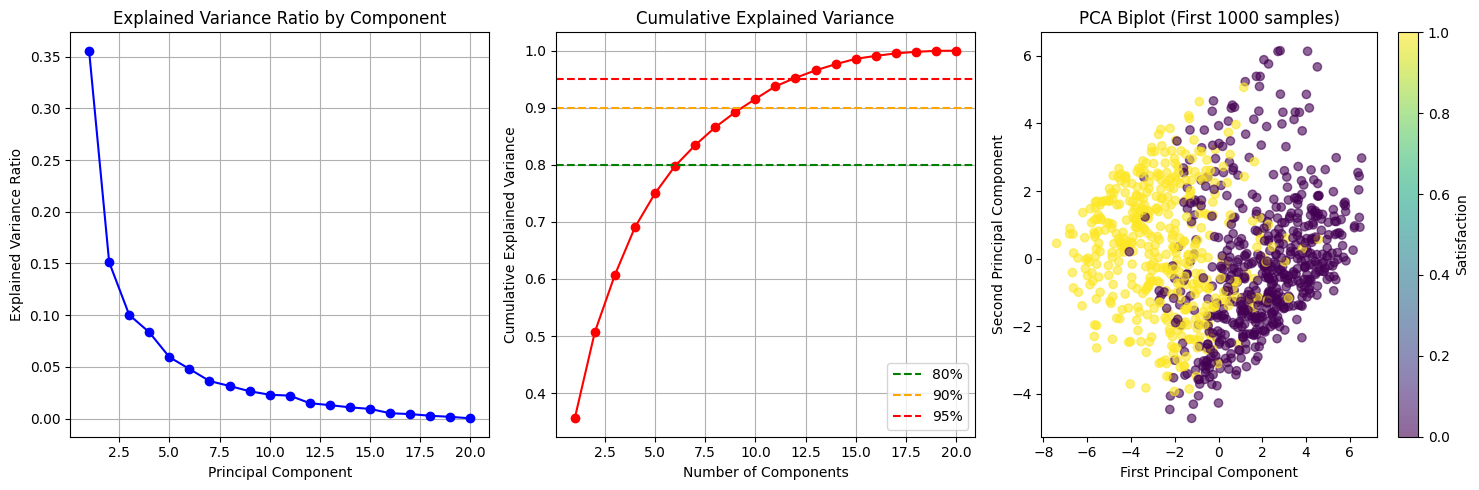

In [97]:
plt.figure(figsize=(15, 5))  # Tạo figure với kích thước lớn

# Biểu đồ 1: Phương sai được giải thích bởi từng thành phần
plt.subplot(1, 3, 1)
plt.plot(range(1, min(21, len(pca.explained_variance_ratio_)+1)),
         pca.explained_variance_ratio_[:20], 'bo-')  # Vẽ 20 thành phần đầu tiên
plt.xlabel('Principal Component')  # Nhãn trục x
plt.ylabel('Explained Variance Ratio')  # Nhãn trục y
plt.title('Explained Variance Ratio by Component')  # Tiêu đề
plt.grid(True)  # Hiển thị lưới

# Biểu đồ 2: Phương sai tích lũy
plt.subplot(1, 3, 2)
plt.plot(range(1, min(21, len(cumulative_variance)+1)),
         cumulative_variance[:20], 'ro-')  # Vẽ phương sai tích lũy
plt.axhline(y=0.80, color='g', linestyle='--', label='80%')  # Đường ngang 80%
plt.axhline(y=0.90, color='orange', linestyle='--', label='90%')  # Đường ngang 90%
plt.axhline(y=0.95, color='r', linestyle='--', label='95%')  # Đường ngang 95%
plt.xlabel('Number of Components')  # Nhãn trục x
plt.ylabel('Cumulative Explained Variance')  # Nhãn trục y
plt.title('Cumulative Explained Variance')  # Tiêu đề
plt.legend()  # Hiển thị chú thích
plt.grid(True)  # Hiển thị lưới

# Biểu đồ 3: PCA Biplot cho 2 thành phần đầu tiên
plt.subplot(1, 3, 3)
plt.scatter(X_pca_optimal[:1000, 0], X_pca_optimal[:1000, 1],
           c=y[:1000], cmap='viridis', alpha=0.6)  # Vẽ scatter plot với màu theo satisfaction
plt.xlabel('First Principal Component')  # Nhãn trục x
plt.ylabel('Second Principal Component')  # Nhãn trục y
plt.title('PCA Biplot (First 1000 samples)')  # Tiêu đề
plt.colorbar(label='Satisfaction')  # Thanh màu với nhãn

plt.tight_layout()  # Điều chỉnh layout tự động
plt.show()  # Hiển thị biểu đồ

Đặc Trưng Phân Cụm:

+ Age, Flight Distance: Nhân khẩu học
+ Service_Score_Average: Chất lượng dịch vụ
+ Customer_Value_Score: Giá trị khách hàng
+ PCA components: Thông tin tổng hợp

In [98]:
#5.5 Phan tich bang phan cam

# Chuẩn bị các đặc trưng cho phân cụm
clustering_features = ['Age', 'Flight Distance', 'Service_Score_Average',
                      'Customer_Value_Score', 'Experience_Score'] + [f'PCA_{i+1}' for i in range(5)]  # Kết hợp đặc trưng gốc và PCA

df_clustering = df_processed[clustering_features].fillna(df_processed[clustering_features].mean())  # Điền giá trị thiếu
scaler_cluster = StandardScaler()  # Tạo bộ chuẩn hóa
df_scaled_cluster = scaler_cluster.fit_transform(df_clustering)  # Chuẩn hóa dữ liệu


In [99]:
# Phân tích K-means với nhiều giá trị k
inertias = []  # Danh sách lưu inertia (SSE)
silhouette_scores = []  # Danh sách lưu silhouette score
k_range = range(2, 11)  # Thử từ 2 đến 10 cụm
 #Vòng lặp để thử các giá trị k khác nhau
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Tạo K-means với k cụm
    cluster_labels = kmeans.fit_predict(df_scaled_cluster)  # Fit và predict
    inertias.append(kmeans.inertia_)  # Lưu inertia
# Chọn k tối ưu (có thể dùng elbow method)
optimal_k = 4  # Giá trị k được chọn dựa trên elbow method
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Tạo K-means cuối cùng
df_processed['Customer_Segment_KMeans'] = kmeans_final.fit_predict(df_scaled_cluster)  # Thêm nhãn cụm vào dataframe




In [100]:

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=optimal_k, random_state=42)  # Tạo GMM với số cụm tối ưu
df_processed['Customer_Segment_GMM'] = gmm.fit_predict(df_scaled_cluster)  # Thêm nhãn cụm GMM

In [101]:
# Hierarchical Clustering (chỉ trên mẫu nhỏ để visualization)
sample_idx = np.random.choice(len(df_scaled_cluster), size=1000, replace=False)  # Chọn ngẫu nhiên 1000 mẫu
Z = linkage(df_scaled_cluster[sample_idx], method='ward')  # Tạo linkage matrix bằng ward method

In [102]:
def analyze_clusters_comprehensive(df, cluster_col, method_name):
    """
    Hàm phân tích chi tiết đặc điểm của từng cụm khách hàng

    Args:
        df: DataFrame chứa dữ liệu
        cluster_col: Tên cột chứa nhãn cụm
        method_name: Tên phương pháp phân cụm (để in ra)
    """
    print(f"\n{method_name} Cluster Analysis:")
    # Vòng lặp qua từng cụm
    for i in range(df[cluster_col].nunique()):
        cluster_data = df[df[cluster_col] == i]  # Lọc dữ liệu của cụm i
        satisfaction_rate = (cluster_data['satisfaction'] == 'satisfied').mean()  # Tỷ lệ hài lòng
        avg_service = cluster_data['Service_Score_Average'].mean()  # Điểm dịch vụ trung bình
        avg_value = cluster_data['Customer_Value_Score'].mean()  # Điểm giá trị khách hàng trung bình

        # In thông tin về cụm
        print(f"  Cluster {i}: {len(cluster_data):,} customers")
        print(f"    Satisfaction: {satisfaction_rate:.1%}")
        print(f"    Avg Service Score: {avg_service:.3f}")
        print(f"    Avg Customer Value: {avg_value:.1f}")

# Gọi hàm phân tích cho cả 2 phương pháp
analyze_clusters_comprehensive(df_processed, 'Customer_Segment_KMeans', 'K-means')
analyze_clusters_comprehensive(df_processed, 'Customer_Segment_GMM', 'GMM')


K-means Cluster Analysis:
  Cluster 0: 25,355 customers
    Satisfaction: 13.9%
    Avg Service Score: 2.568
    Avg Customer Value: 183.6
  Cluster 1: 23,904 customers
    Satisfaction: 74.9%
    Avg Service Score: 3.537
    Avg Customer Value: 493.5
  Cluster 2: 25,111 customers
    Satisfaction: 19.7%
    Avg Service Score: 3.185
    Avg Customer Value: 178.6
  Cluster 3: 29,534 customers
    Satisfaction: 63.1%
    Avg Service Score: 3.742
    Avg Customer Value: 188.4

GMM Cluster Analysis:
  Cluster 0: 24,999 customers
    Satisfaction: 18.6%
    Avg Service Score: 3.147
    Avg Customer Value: 162.3
  Cluster 1: 26,245 customers
    Satisfaction: 37.4%
    Avg Service Score: 3.187
    Avg Customer Value: 208.2
  Cluster 2: 31,163 customers
    Satisfaction: 43.1%
    Avg Service Score: 3.273
    Avg Customer Value: 206.2
  Cluster 3: 21,497 customers
    Satisfaction: 79.8%
    Avg Service Score: 3.527
    Avg Customer Value: 490.9


- Q1 (quartile 1): Phân vị 25% (25% giá trị nhỏ hơn hoặc bằng Q1)
- Q3 (quartile 3): Phân vị 75%
- IQR: Q3 - Q1 (khoảng giữa 50% dữ liệu)
- Ngưỡng dưới (lower bound): Q1 - 1.5 × IQR
→ Bất kỳ giá trị nào nhỏ hơn ngưỡng này bị coi là ngoại lệ phía dưới.
- Ngưỡng trên (upper bound): Q3 + 1.5 × IQR
→ Bất kỳ giá trị nào lớn hơn ngưỡng này bị coi là ngoại lệ phía trên.
- Kết quả trả về:
Các giá trị nhỏ hơn lower bound hoặc lớn hơn upper bound là ngoại lệ (outlier).
Riêng các giá trị nằm trong khoảng này là “bình thường”.


1. Dữ liệu tuổi (Age) rất sạchKhông có ngoại lệ, chứng tỏ các trường hợp tuổi không bất thường hoặc đã được làm sạch từ đầu.
2. Dữ liệu khoảng cách bay (Flight Distance) có một lượng nhỏ ngoại lệ
Một số chuyến bay có thể là đặc biệt (bay quốc tế rất xa, hoặc chuyến bay ngắn bất thường).2.2% là tỷ lệ chấp nhận được, không ảnh hưởng nhiều đến tổng thể.
3. Dữ liệu delay có tỷ lệ ngoại lệ cao
Hơn 13% dữ liệu về thời gian delay (cả đi và đến) là bất thường (delay rất nặng).
Điều này phản ánh thực trạng có khá nhiều chuyến bay bị delay quá mức, có thể ảnh hưởng mạnh tới trải nghiệm và sự hài lòng khách hàng.
Việc cắt ngoại lệ là cần thiết để mô hình không bị nhiễu bởi các trường hợp cực đoan (ví dụ: chuyến bay delay 5-10 tiếng).


Nếu số lượng khách hàng lớn, cần tốc độ và độ ổn định: Dùng K-means.
Nếu muốn phân nhóm mềm, xác suất, cụm có thể không tròn đều: Dùng GMM.
Nếu cần trực quan hóa quan hệ phân cấp, giải thích sâu: Dùng Hierarchical Clustering (cho mẫu nhỏ).

3 phân khúc chính là khác biệt nhất. Các khách hàng trong cùng một phân khúc có đặc điểm tương đồng, các phân khúc khác nhau về hành vi hoặc đặc trưng dịch vụ.

# III. CÁC KỸ THUẬT KHAI THÁC MẪU PHỔ BIẾN

## TASK 1: CHUẨN BỊ DỮ LIỆU VÀ BIẾN ĐỔI SANG DẠNG GIAO DỊCH transaction format

In [103]:
from mlxtend.preprocessing import TransactionEncoder  # Để chuyển đổi dữ liệu sang dạng transaction
from mlxtend.frequent_patterns import apriori, association_rules  # Thuật toán Apriori và sinh luật

In [104]:
# 1.1 Lấy mẫu ngẫu nhiên để xử lý nhanh hơn
np.random.seed(42)
sample_size = 20000  # Giảm từ 50k xuống 20k cho airline data
df_sample = df_processed.sample(n=min(sample_size, len(df_processed)), random_state=42)
print(f"1.1.lấy mẫu ngẫu nhiên: {len(df_sample):,} khách hàng từ tổng {len(df_processed):,}")

1.1.lấy mẫu ngẫu nhiên: 20,000 khách hàng từ tổng 103,904


In [105]:
# 1.2 Liệt kê các cột đặc trưng
print(f"\n1.2. Các nhóm đặc trưng trong dữ liệu hàng không:")

# Định nghĩa các nhóm cột đặc trưng
service_rating_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

demographic_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
continuous_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

print(f" Đánh giá dịch vụ (thang điểm 1-5): {len(service_rating_cols)} cột")
print(f"     {service_rating_cols[:3]}...")
print(f" Thông tin nhân khẩu học: {len(demographic_cols)} cột")
print(f"     {demographic_cols}")
print(f" Dữ liệu liên tục: {len(continuous_cols)} cột")
print(f"     {continuous_cols}")


1.2. Các nhóm đặc trưng trong dữ liệu hàng không:
 Đánh giá dịch vụ (thang điểm 1-5): 14 cột
     ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking']...
 Thông tin nhân khẩu học: 4 cột
     ['Gender', 'Customer Type', 'Type of Travel', 'Class']
 Dữ liệu liên tục: 4 cột
     ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


## TASK 2: BIẾN ĐỔI DỮ LIỆU SANG DẠNG GIAO DỊCH (TRANSACTION)

"Ý tưởng biến đổi:
+ Mỗi khách hàng = 1 'giao dịch' (transaction)
+ Các đặc điểm của khách hàng = các 'item' trong giao dịch"
+ Chỉ tính là 'có item' nếu thỏa mãn điều kiện nào đó"
  (Ví dụ: dịch vụ được đánh giá >= 4 điểm, hay khách hàng thuộc nhóm nào đó)"

Hàm biến đổi dữ liệu airline thành dạng transactions cho Apriori
    
    Tham số:
        df_sample: DataFrame chứa dữ liệu mẫu
    
    Trả về:
        transactions: List of lists, mỗi list chứa các items của 1 khách hàng

In [106]:
def create_airline_transactions(df_sample):
    transactions = []

    # Duyệt qua từng khách hàng (từng dòng) trong DataFrame
    for idx, row in df_sample.iterrows():
        transaction = []  # Khởi tạo transaction rỗng cho khách hàng này

        # 1. XỬ LÝ CÁC ĐÁNH GIÁ DỊCH VỤ
        # Chỉ coi là "có" dịch vụ nếu khách hàng đánh giá >= 4 điểm (tốt)
        for service in service_rating_cols:
            if pd.notna(row[service]) and row[service] >= 4:
                # Tạo tên item dạng "Good_ServiceName"
                service_name = service.replace(' ', '_').replace('/', '_')
                transaction.append(f"Good_{service_name}")

        # 2. XỬ LÝ THÔNG TIN NHÂN KHẨU HỌC
        # Thêm các đặc điểm nhân khẩu học như các items
        transaction.append(f"Gender_{row['Gender']}")
        transaction.append(f"CustomerType_{row['Customer Type'].replace(' ', '_')}")
        transaction.append(f"TravelType_{row['Type of Travel'].replace(' ', '_')}")
        transaction.append(f"Class_{row['Class'].replace(' ', '_')}")

        # 3. XỬ LÝ ĐỘ TUỔI - chia thành nhóm
        age = row['Age']
        if age < 25:
            transaction.append("Age_Young")      # Trẻ: < 25 tuổi
        elif age < 40:
            transaction.append("Age_Adult")      # Trưởng thành: 25-39 tuổi
        elif age < 60:
            transaction.append("Age_MiddleAge")  # Trung niên: 40-59 tuổi
        else:
            transaction.append("Age_Senior")     # Cao tuổi: >= 60 tuổi

        # 4. XỬ LÝ KHOẢNG CÁCH BAY - chia thành nhóm
        distance = row['Flight Distance']
        if distance < 500:
            transaction.append("Distance_Short")     # Ngắn: < 500km
        elif distance < 1500:
            transaction.append("Distance_Medium")    # Trung bình: 500-1499km
        elif distance < 3000:
            transaction.append("Distance_Long")      # Dài: 1500-2999km
        else:
            transaction.append("Distance_VeryLong")  # Rất dài: >= 3000km

        # 5. XỬ LÝ MỨC ĐỘ HÀI LÒNG - đây là biến mục tiêu quan trọng
        if row['satisfaction'] == 'satisfied':
            transaction.append("Customer_Satisfied")
        else:
            transaction.append("Customer_Dissatisfied")

        # 6. XỬ LÝ ĐỘ TRỄ (nếu có dữ liệu)
        if 'Departure Delay in Minutes' in row and pd.notna(row['Departure Delay in Minutes']):
            delay = row['Departure Delay in Minutes']
            if delay == 0:
                transaction.append("OnTime_Departure")     # Đúng giờ
            elif delay <= 15:
                transaction.append("MinorDelay_Departure") # Trễ ít: 1-15 phút
            else:
                transaction.append("MajorDelay_Departure") # Trễ nhiều: > 15 phút

        # Thêm transaction của khách hàng này vào danh sách tổng
        transactions.append(transaction)

    return transactions

In [107]:
# 2.1 Tạo transactions từ dữ liệu mẫu
print(f"\n2.1. Đang biến đổi {len(df_sample):,} khách hàng thành transactions...")
transactions = create_airline_transactions(df_sample)


2.1. Đang biến đổi 20,000 khách hàng thành transactions...


In [108]:
# 2.2 Hiển thị 5 giao dịch đầu tiên để kiểm tra
print(f"\n2.2. Đã tạo {len(transactions):,} transactions. 5 transactions đầu tiên:")
for i in range(5):
    print(f"   Transaction {i+1}: {transactions[i]}")


2.2. Đã tạo 20,000 transactions. 5 transactions đầu tiên:
   Transaction 1: ['Good_Departure_Arrival_time_convenient', 'Good_Gate_location', 'Good_Food_and_drink', 'Good_Seat_comfort', 'Good_Inflight_entertainment', 'Good_On-board_service', 'Good_Leg_room_service', 'Good_Baggage_handling', 'Good_Inflight_service', 'Good_Cleanliness', 'Gender_Female', 'CustomerType_Loyal_Customer', 'TravelType_Personal_Travel', 'Class_Eco', 'Age_Adult', 'Distance_Medium', 'Customer_Dissatisfied', 'OnTime_Departure']
   Transaction 2: ['Good_Departure_Arrival_time_convenient', 'Good_Ease_of_Online_booking', 'Good_Gate_location', 'Gender_Male', 'CustomerType_Loyal_Customer', 'TravelType_Business_travel', 'Class_Business', 'Age_Young', 'Distance_Short', 'Customer_Dissatisfied', 'OnTime_Departure']
   Transaction 3: ['Good_Inflight_entertainment', 'Good_On-board_service', 'Good_Baggage_handling', 'Good_Inflight_service', 'Good_Cleanliness', 'Gender_Female', 'CustomerType_Loyal_Customer', 'TravelType_Person

In [109]:
# 2.3 Chuyển đổi sang DataFrame dạng one-hot encoding bằng TransactionEncoder
print(f"\n2.3. Chuyển đổi sang định dạng one-hot encoding cho thuật toán Apriori...")
# Khởi tạo TransactionEncoder
te = TransactionEncoder()
# Fit và transform dữ liệu
# Fit: học các unique items từ tất cả transactions
# Transform: chuyển đổi thành ma trận 0-1
te_ary = te.fit(transactions).transform(transactions)

# Tạo DataFrame từ ma trận 0-1, với tên cột là tên các items
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

print(f"   • Kích thước DataFrame transaction: {df_trans.shape}")
print(f"   • Số unique items: {len(te.columns_)}")

# Hiển thị 5 dòng đầu của df_trans
print(f"\n   5 dòng đầu của df_trans (0=không có, 1=có):")
print(df_trans.head())



2.3. Chuyển đổi sang định dạng one-hot encoding cho thuật toán Apriori...
   • Kích thước DataFrame transaction: (20000, 36)
   • Số unique items: 36

   5 dòng đầu của df_trans (0=không có, 1=có):
   Age_Adult  Age_MiddleAge  Age_Senior  Age_Young  Class_Business  Class_Eco  \
0       True          False       False      False           False       True   
1      False          False       False       True            True      False   
2      False           True       False      False           False       True   
3       True          False       False      False           False       True   
4       True          False       False      False            True      False   

   Class_Eco_Plus  CustomerType_Loyal_Customer  \
0           False                         True   
1           False                         True   
2           False                         True   
3           False                         True   
4           False                        False   

   CustomerTy

+ 14 Good_Service items (từ các dịch vụ đánh giá cao)
+ 9 demographic items (Gender, CustomerType, TravelType, Class)
+ 8 continuous items (Age groups + Distance groups)
+ 5 outcome items (Satisfaction + Delay status)

Với 20,000 khách hàng và khoảng 35-40 items, mỗi khách hàng chỉ có 10-15 đặc điểm
Điều này có nghĩa dữ liệu sẽ "thưa" hơn so với dữ liệu bán lẻ truyền thống => điều chỉnh min-sup

Demographic items (giới tính, loại khách hàng) sẽ xuất hiện ở mọi khách hàng
Service items chỉ xuất hiện khi khách hàng đánh giá >= 4 điểm
Có thể dẫn đến frequent itemsets thiên về demographic patterns

- Số lượng items hợp lý: 36 unique items,
Phân bố frequency tốt:

- Q1 = 0.302 (30.2%) cho thấy 75% items có tần suất >= 30%
Median = 0.447 (44.7%) cho thấy phân bố khá đều
Không có quá nhiều items hiếm (chỉ có Class_Eco_Plus ở 7.2%)


- Service items có tần suất cao: Good_Inflight_service (63.1%), Good_Baggage_handling (62.3%) cho thấy logic >= 4 điểm hoạt động tốt

## TASK 3: KHAI THÁC TẬP PHỔ BIẾN VỚI APRIORI

In [110]:
# 3.1 Tính tần suất xuất hiện của từng item
item_frequencies = df_trans.mean().sort_values(ascending=False)

print(f"Thống kê tổng quan về items:")
print(f"  - Tổng số unique items: {len(item_frequencies)}")
print(f"  - Item phổ biến nhất: {item_frequencies.index[0]} ({item_frequencies.iloc[0]:.3f})")
print(f"  - Item ít phổ biến nhất: {item_frequencies.index[-1]} ({item_frequencies.iloc[-1]:.3f})")

print(f"\nTop 10 items phổ biến nhất (tần suất xuất hiện):")
for i, (item, freq) in enumerate(item_frequencies.head(10).items()):
    count = int(freq * len(df_sample))
    print(f"  {i+1:2d}. {item:<40}: {freq:.3f} ({count:,} khách hàng)")

Thống kê tổng quan về items:
  - Tổng số unique items: 36
  - Item phổ biến nhất: CustomerType_Loyal_Customer (0.818)
  - Item ít phổ biến nhất: Class_Eco_Plus (0.072)

Top 10 items phổ biến nhất (tần suất xuất hiện):
   1. CustomerType_Loyal_Customer             : 0.818 (16,363 khách hàng)
   2. TravelType_Business_travel              : 0.692 (13,846 khách hàng)
   3. Good_Inflight_service                   : 0.631 (12,619 khách hàng)
   4. Good_Baggage_handling                   : 0.623 (12,451 khách hàng)
   5. Good_Seat_comfort                       : 0.568 (11,359 khách hàng)
   6. OnTime_Departure                        : 0.567 (11,341 khách hàng)
   7. Customer_Dissatisfied                   : 0.563 (11,269 khách hàng)
   8. Good_Inflight_entertainment             : 0.533 (10,666 khách hàng)
   9. Good_On-board_service                   : 0.522 (10,447 khách hàng)
  10. Good_Leg_room_service                   : 0.512 (10,249 khách hàng)


In [111]:
q25, q50, q75 = np.percentile(item_frequencies, [25, 50, 75])
print(f"\nPhân tích phân bố tần suất:")
print(f"  - 25% items có tần suất < {q25:.3f}")
print(f"  - 50% items có tần suất < {q50:.3f} (trung vị)")
print(f"  - 75% items có tần suất < {q75:.3f}")


Phân tích phân bố tần suất:
  - 25% items có tần suất < 0.302
  - 50% items có tần suất < 0.447 (trung vị)
  - 75% items có tần suất < 0.515


1. Paradox về Loyal Customer và Dissatisfaction:

2. 81.8% là Loyal Customer nhưng 56.3% Dissatisfied
Điều này cho thấy có vấn đề về service quality ngay cả với khách hàng trung thành


3. Business travel chiếm đa số: 69.2% là business travel - cần focus insights cho segment này
OnTime_Departure chỉ 56.7%: Gần một nửa khách hàng bị delay - vấn đề lớn

Suy ra


1. Customer Retention Problem:

81.8% Loyal nhưng 56.3% Dissatisfied cho thấy loyalty không đồng nghĩa với satisfaction
Cần phân tích nguyên nhân khách trung thành vẫn không hài lòng


2. Service Quality Patterns:

Inflight service (63.1%) và Baggage handling (62.3%) là strengths
Cần focus vào services có tần suất thấp hơn để cải thiện


3. Operational Issues:

OnTime_Departure chỉ 56.7% là vấn đề lớn
Delay có thể là nguyên nhân chính của dissatisfaction

In [112]:
# 3.2 Áp dụng thuật toán Apriori
# Dựa trên kết quả phân tích: Q1=0.302, Median=0.447, Q3=0.515
min_support = 0.05
print(f"Sử dụng min_support = {min_support} ({min_support*100}%)")
print(f"  - Yêu cầu tối thiểu {int(min_support * len(df_sample)):,} khách hàng")


Sử dụng min_support = 0.05 (5.0%)
  - Yêu cầu tối thiểu 1,000 khách hàng


In [113]:
# lưu df_trans
df_trans.to_csv("df_trans.csv", index=False)
# Lưu df_processed
df_processed.to_csv("df_processed.csv", index=False)
# Lưu transactions (chuyển thành DataFrame trước)
transactions_df = pd.DataFrame({'items': ['|'.join(t) for t in transactions]})
transactions_df.to_csv("transactions.csv", index=False)


In [114]:
# Load df_trans
df_trans = pd.read_csv("df_trans.csv")

# Load df_processed
df_processed = pd.read_csv("df_processed.csv")

# Load transactions
transactions_df = pd.read_csv("transactions.csv")
transactions = [row.split('|') for row in transactions_df['items']]

In [115]:

# Tăng min_support và giới hạn max_len để giảm memory
# chạy thuạt toán
min_support = 0.05
max_len = 3

frequent_itemsets = apriori(df_trans,
                           min_support=min_support,
                           max_len=max_len,
                           use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [116]:
# Lưu frequent_itemsets
frequent_itemsets_save = frequent_itemsets.copy()
frequent_itemsets_save['itemsets'] = frequent_itemsets_save['itemsets'].apply(lambda x: '|'.join(sorted(list(x))))
frequent_itemsets_save.to_csv("frequent_itemsets.csv", index=False)

# Lưu association rules (nếu có)
if len(frequent_itemsets) > 0:
    from mlxtend.frequent_patterns import association_rules

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

    if len(rules) > 0:
        rules_save = rules.copy()
        rules_save['antecedents'] = rules_save['antecedents'].apply(lambda x: '|'.join(sorted(list(x))))
        rules_save['consequents'] = rules_save['consequents'].apply(lambda x: '|'.join(sorted(list(x))))
        rules_save.to_csv("association_rules.csv", index=False)

In [117]:
# Load frequent_itemsets
frequent_itemsets = pd.read_csv("frequent_itemsets.csv")
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: frozenset(x.split('|')))

# Load association_rules
rules = pd.read_csv("association_rules.csv")
rules['antecedents'] = rules['antecedents'].apply(lambda x: frozenset(x.split('|')))
rules['consequents'] = rules['consequents'].apply(lambda x: frozenset(x.split('|')))

In [118]:
#3.3 kết quả khai thác phổ biến
print(f"  - Tổng số frequent itemsets: {len(frequent_itemsets)}")


  - Tổng số frequent itemsets: 4145


In [119]:
if len(frequent_itemsets) > 0:
    # Phân tích theo độ dài
    length_dist = frequent_itemsets['length'].value_counts().sort_index()
    print(f"\nPhân bố theo độ dài:")
    for length, count in length_dist.items():
        print(f"    {length}-itemsets: {count} tập")


Phân bố theo độ dài:
    1-itemsets: 36 tập
    2-itemsets: 518 tập
    3-itemsets: 3591 tập


In [120]:
# 3.4 Phân tích chi tiết frequent itemsets
# Phân tích 1-itemsets
print("Top 5 đặc điểm đơn lẻ phổ biến nhất:")
itemsets_1 = frequent_itemsets[frequent_itemsets['length'] == 1].sort_values('support', ascending=False)
for i in range(min(5, len(itemsets_1))):
    item = list(itemsets_1.iloc[i]['itemsets'])[0]
    support = itemsets_1.iloc[i]['support']
    count = int(support * len(df_sample))

    # Phân tích ý nghĩa business
    if 'CustomerType_Loyal' in item:
        insight = "Đa số khách hàng trung thành - tài sản quý của hãng"
    elif 'TravelType_Business' in item:
        insight = "Segment business travel chiếm ưu thế - cần focus"
    elif 'Good_' in item:
        service = item.replace('Good_', '').replace('_', ' ')
        insight = f"Dịch vụ {service} được đánh giá cao - điểm mạnh"
    elif 'Customer_Dissatisfied' in item:
        insight = "Tỷ lệ không hài lòng cao - cần cải thiện urgent"
    elif 'OnTime_Departure' in item:
        insight = "Punctuality khá tốt - duy trì và cải thiện"
    else:
        insight = "Đặc điểm phổ biến của khách hàng"

    print(f"  {i+1}. {item}")
    print(f"     Support: {support:.3f} ({count:,} khách)")
    print(f"     Insight: {insight}")

Top 5 đặc điểm đơn lẻ phổ biến nhất:
  1. CustomerType_Loyal_Customer
     Support: 0.818 (16,363 khách)
     Insight: Đa số khách hàng trung thành - tài sản quý của hãng
  2. TravelType_Business_travel
     Support: 0.692 (13,846 khách)
     Insight: Segment business travel chiếm ưu thế - cần focus
  3. Good_Inflight_service
     Support: 0.631 (12,619 khách)
     Insight: Dịch vụ Inflight service được đánh giá cao - điểm mạnh
  4. Good_Baggage_handling
     Support: 0.623 (12,451 khách)
     Insight: Dịch vụ Baggage handling được đánh giá cao - điểm mạnh
  5. Good_Seat_comfort
     Support: 0.568 (11,359 khách)
     Insight: Dịch vụ Seat comfort được đánh giá cao - điểm mạnh


## TASK 4: SINH VÀ PHÂN TÍCH LUẬT KẾT HỢP (ASSOCIATION RULES)

In [121]:
# Định nghĩa các biến cần thiết trước khi chạy code phân tích
df_sample = df_processed  # Hoặc sample đã dùng
min_confidence = 0.65

In [122]:
# 4.1 Định nghĩa các hàm hỗ trợ phân tích
print("4.1. Định nghĩa các hàm hỗ trợ phân tích")

def analyze_combination_type(items):
    """
    PHÂN TÍCH LOẠI TỔ HỢP CỦA 2 ITEMS
    Input: danh sách 2 items (ví dụ: ['Good_Wifi', 'Gender_Male'])
    Output: loại mối quan hệ giữa 2 items này
    """
    service_count = sum(1 for item in items if 'Good_' in item)
    demo_count = sum(1 for item in items if any(prefix in item for prefix in ['Gender_', 'CustomerType_', 'TravelType_', 'Class_', 'Age_']))

    if service_count == 2:
        return "Service-Service correlation"
    elif demo_count == 2:
        return "Customer segment pattern"
    elif service_count == 1 and demo_count == 1:
        return "Service-Demographics relationship"
    else:
        return "Mixed pattern"

def interpret_rule_business_meaning(antecedents, consequents, rule):
    """
    GIẢI THÍCH Ý NGHĨA KINH DOANH CỦA RULE
    """
    ant_str = ', '.join(antecedents)
    cons_str = ', '.join(consequents)

    if 'Customer_Satisfied' in cons_str:
        if 'Good_' in ant_str:
            return f"Khi dịch vụ chất lượng cao, có {rule['confidence']*100:.1f}% khả năng khách hàng hài lòng"
        elif 'CustomerType_Loyal' in ant_str:
            return f"Khách hàng trung thành có xu hướng hài lòng cao với {rule['confidence']*100:.1f}% xác suất"
        else:
            return f"Các đặc điểm này dẫn đến satisfaction với {rule['confidence']*100:.1f}% xác suất"
    elif 'Customer_Dissatisfied' in cons_str:
        return f"Cảnh báo: Các điều kiện này có {rule['confidence']*100:.1f}% khả năng dẫn đến dissatisfaction"
    else:
        return f"Mối quan hệ giữa {ant_str} và {cons_str} với độ tin cậy {rule['confidence']*100:.1f}%"

def item_name(item):
    """HÀM định nghĩa tên cột"""
    name_mapping = {
        'Good_Inflight_wifi_service': 'WiFi tốt',
        'Good_Seat_comfort': 'Ghế thoải mái',
        'Good_Food_and_drink': 'Đồ ăn uống tốt',
        'CustomerType_Loyal_Customer': 'Khách trung thành',
        'CustomerType_disloyal_Customer': 'Khách thường',
        'TravelType_Business_travel': 'Đi công tác',
        'TravelType_Personal_Travel': 'Đi cá nhân',
        'Class_Business': 'Hạng thương gia',
        'Class_Eco': 'Hạng phổ thông',
        'Customer_Satisfied': 'Khách hài lòng',
        'Customer_Dissatisfied': 'Khách không hài lòng',
        'OnTime_Departure': 'Bay đúng giờ',
        'Age_Young': 'Khách trẻ',
        'Age_Adult': 'Khách trưởng thành'
    }
    return name_mapping.get(item, item.replace('_', ' '))

def extract_name(rule):
    """HÀM TRÍCH XUẤT TÊN X,Y VỚI ĐỊNH DẠNG ĐẸP"""
    x_items = list(rule['antecedents'])
    x_beautiful = [item_name(item) for item in x_items]
    x_display = ' + '.join(x_beautiful)

    y_items = list(rule['consequents'])
    y_beautiful = [item_name(item) for item in y_items]
    y_display = ' + '.join(y_beautiful)

    return x_display, y_display


4.1. Định nghĩa các hàm hỗ trợ phân tích


In [123]:
# 4.2 Sinh Association Rules
print("\n4.2. Sinh Association Rules")

if len(frequent_itemsets) > 0:
    # Sinh rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

    if len(rules) > 0:
        # Lưu association rules
        rules_save = rules.copy()
        rules_save['antecedents'] = rules_save['antecedents'].apply(lambda x: '|'.join(sorted(list(x))))
        rules_save['consequents'] = rules_save['consequents'].apply(lambda x: '|'.join(sorted(list(x))))
        rules_save.to_csv("association_rules.csv", index=False)

        print(f"Đã sinh được {len(rules)} association rules")

        # Load lại để đảm bảo format
        frequent_itemsets = pd.read_csv("frequent_itemsets.csv")
        frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: frozenset(x.split('|')))

        rules = pd.read_csv("association_rules.csv")
        rules['antecedents'] = rules['antecedents'].apply(lambda x: frozenset(x.split('|')))
        rules['consequents'] = rules['consequents'].apply(lambda x: frozenset(x.split('|')))


4.2. Sinh Association Rules
Đã sinh được 4321 association rules


In [124]:
# 4.3 Phân tích Rules cơ bản
print("\n4.3. Phân tích Rules cơ bản")

# Định nghĩa biến cần thiết
df_sample = df_processed
min_confidence = 0.65

print("Top 5 rules với extract_rule_names:")
def extract_rule_names(rule):
    x_items = list(rule['antecedents'])
    x_names = [item.replace('_', ' ') for item in x_items]
    x_display = ' + '.join(x_names)

    y_items = list(rule['consequents'])
    y_names = [item.replace('_', ' ') for item in y_items]
    y_display = ' + '.join(y_names)

    return x_display, y_display

for i, rule in rules.head(5).iterrows():
    x_name, y_name = extract_rule_names(rule)
    print(f"Rule {i+1}: {x_name} → {y_name}")
    print(f"  Lift: {rule['lift']:.3f}")
    print(f"  Ý nghĩa: {x_name} làm {'tăng' if rule['lift'] > 1 else 'giảm'} khả năng {y_name}")
    print()

print("Top 3 rules với tên định nghĩa:")
for i, rule in rules.head(3).iterrows():
    x_name, y_name = extract_name(rule)
    lift_meaning = "thúc đẩy" if rule['lift'] > 1 else "kìm hãm"

    print(f" Rule {i+1}: {x_name} → {y_name}")
    print(f" Support: {rule['support']:.3f} | Confidence: {rule['confidence']:.3f} | Lift: {rule['lift']:.3f}")
    print(f" Ý nghĩa: '{x_name}' {lift_meaning} '{y_name}' với mức độ {rule['lift']:.1f} lần")
    print("-" * 60)


4.3. Phân tích Rules cơ bản
Top 5 rules với extract_rule_names:
Rule 1: Age Adult → CustomerType Loyal Customer
  Lift: 0.871
  Ý nghĩa: Age Adult làm giảm khả năng CustomerType Loyal Customer

Rule 2: Age Adult → Customer Dissatisfied
  Lift: 1.073
  Ý nghĩa: Age Adult làm tăng khả năng Customer Dissatisfied

Rule 3: Age Adult → Good Baggage handling
  Lift: 0.981
  Ý nghĩa: Age Adult làm giảm khả năng Good Baggage handling

Rule 4: Age Adult → Good Inflight service
  Lift: 1.003
  Ý nghĩa: Age Adult làm tăng khả năng Good Inflight service

Rule 5: Age Adult → TravelType Business travel
  Lift: 1.104
  Ý nghĩa: Age Adult làm tăng khả năng TravelType Business travel

Top 3 rules với tên định nghĩa:
 Rule 1: Khách trưởng thành → Khách trung thành
 Support: 0.216 | Confidence: 0.712 | Lift: 0.871
 Ý nghĩa: 'Khách trưởng thành' kìm hãm 'Khách trung thành' với mức độ 0.9 lần
------------------------------------------------------------
 Rule 2: Khách trưởng thành → Khách không hài lòng
 Su

In [125]:
# 4.4 Phân tích chi tiết quan hệ Rules
print("\n4.4. Phân tích chi tiết quan hệ Rules")

def analyze_rule_relationship(rule):
    """HÀM PHÂN TÍCH TỰ ĐỘNG LOẠI QUAN HỆ TRONG RULE"""
    x_items = list(rule['antecedents'])
    y_items = list(rule['consequents'])

    # Phân loại X
    x_type = []
    if any('Good_' in item for item in x_items):
        x_type.append("Dịch vụ tốt")
    if any('CustomerType_' in item for item in x_items):
        x_type.append("Loại khách hàng")
    if any('Class_' in item for item in x_items):
        x_type.append("Hạng vé")
    if any('Age_' in item for item in x_items):
        x_type.append("Nhóm tuổi")

    # Phân loại Y
    y_type = []
    if any('Customer_Satisfied' in item for item in y_items):
        y_type.append("Hài lòng")
    if any('Customer_Dissatisfied' in item for item in y_items):
        y_type.append("Không hài lòng")
    if any('Good_' in item for item in y_items):
        y_type.append("Dịch vụ tốt")

    # Tạo mô tả quan hệ
    x_desc = " + ".join(x_type) if x_type else "Khác"
    y_desc = " + ".join(y_type) if y_type else "Khác"

    return f"{x_desc} ⇒ {y_desc}"


4.4. Phân tích chi tiết quan hệ Rules


In [126]:
def analyze_rule_relationship(rule):
    """HÀM PHÂN TÍCH TỰ ĐỘNG LOẠI QUAN HỆ TRONG RULE"""
    x_items = list(rule['antecedents'])
    y_items = list(rule['consequents'])

    # Phân loại X
    x_type = []
    if any('Good_' in item for item in x_items):
        x_type.append("Dịch vụ tốt")
    if any('CustomerType_' in item for item in x_items):
        x_type.append("Loại khách hàng")
    if any('Class_' in item for item in x_items):
        x_type.append("Hạng vé")
    if any('Age_' in item for item in x_items):
        x_type.append("Nhóm tuổi")

    # Phân loại Y
    y_type = []
    if any('Customer_Satisfied' in item for item in y_items):
        y_type.append("Hài lòng")
    if any('Customer_Dissatisfied' in item for item in y_items):
        y_type.append("Không hài lòng")
    if any('Good_' in item for item in y_items):
        y_type.append("Dịch vụ tốt")

    # Tạo mô tả quan hệ
    x_desc = " + ".join(x_type) if x_type else "Khác"
    y_desc = " + ".join(y_type) if y_type else "Khác"

    return f"{x_desc} ⇒ {y_desc}"


In [127]:
for i, rule in rules.head(5).iterrows():
    x_name, y_name = extract_name(rule)
    relationship = analyze_rule_relationship(rule)

    print(f" Rule {i+1}: {x_name} → {y_name}")
    print(f" Loại quan hệ: {relationship}")
    print(f" Chỉ số: Support={rule['support']:.3f}, Confidence={rule['confidence']:.3f}, Lift={rule['lift']:.3f}")

    # Phân tích ý nghĩa
    if rule['lift'] > 1.5:
        meaning = f"'{x_name}' có tác động mạnh đến '{y_name}'"
    elif rule['lift'] > 1.0:
        meaning = f"'{x_name}' có tác động tích cực đến '{y_name}'"
    else:
        meaning = f"'{x_name}' có tác động tiêu cực đến '{y_name}'"

    print(f" Ý nghĩa: {meaning}")
    print("-" * 80)

 Rule 1: Khách trưởng thành → Khách trung thành
 Loại quan hệ: Nhóm tuổi ⇒ Khác
 Chỉ số: Support=0.216, Confidence=0.712, Lift=0.871
 Ý nghĩa: 'Khách trưởng thành' có tác động tiêu cực đến 'Khách trung thành'
--------------------------------------------------------------------------------
 Rule 2: Khách trưởng thành → Khách không hài lòng
 Loại quan hệ: Nhóm tuổi ⇒ Không hài lòng
 Chỉ số: Support=0.183, Confidence=0.604, Lift=1.073
 Ý nghĩa: 'Khách trưởng thành' có tác động tích cực đến 'Khách không hài lòng'
--------------------------------------------------------------------------------
 Rule 3: Khách trưởng thành → Good Baggage handling
 Loại quan hệ: Nhóm tuổi ⇒ Dịch vụ tốt
 Chỉ số: Support=0.185, Confidence=0.611, Lift=0.981
 Ý nghĩa: 'Khách trưởng thành' có tác động tiêu cực đến 'Good Baggage handling'
--------------------------------------------------------------------------------
 Rule 4: Khách trưởng thành → Good Inflight service
 Loại quan hệ: Nhóm tuổi ⇒ Dịch vụ tốt
 Chỉ số:

In [128]:
# 4.5 Tạo bảng tóm tắt Rules
print("\n4.5. Tạo bảng tóm tắt Rules")

def create_rules_summary_table(rules, top_n=10):
    """TẠO BẢNG TÓM TẮT RULES"""
    summary_data = []

    for i, rule in rules.head(top_n).iterrows():
        x_name, y_name = extract_name(rule)

        summary_data.append({
            'Rule': f"{x_name} → {y_name}",
            'Support': f"{rule['support']:.3f}",
            'Confidence': f"{rule['confidence']:.3f}",
            'Lift': f"{rule['lift']:.3f}",
            'Tác động': 'Tích cực' if rule['lift'] > 1 else 'Tiêu cực'
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Tạo và hiển thị bảng
rules_table = create_rules_summary_table(rules, top_n=10)
print(rules_table.to_string(index=False))


4.5. Tạo bảng tóm tắt Rules
                                       Rule Support Confidence  Lift Tác động
     Khách trưởng thành → Khách trung thành   0.216      0.712 0.871 Tiêu cực
  Khách trưởng thành → Khách không hài lòng   0.183      0.604 1.073 Tích cực
 Khách trưởng thành → Good Baggage handling   0.185      0.611 0.981 Tiêu cực
 Khách trưởng thành → Good Inflight service   0.192      0.633 1.003 Tích cực
           Khách trưởng thành → Đi công tác   0.232      0.764 1.104 Tích cực
            Age MiddleAge → Hạng thương gia   0.252      0.603 1.246 Tích cực
          Age MiddleAge → Khách trung thành   0.391      0.935 1.143 Tích cực
      Age MiddleAge → Good Baggage handling   0.270      0.646 1.038 Tích cực
Age MiddleAge → Good Inflight entertainment   0.256      0.613 1.150 Tích cực
      Age MiddleAge → Good Inflight service   0.269      0.644 1.020 Tích cực


##  Task5 TRỰC QUAN HÓA VÀ PHÂN TÍCH TỔNG QUAN

5.1. Ma trận tương quan tổng quan


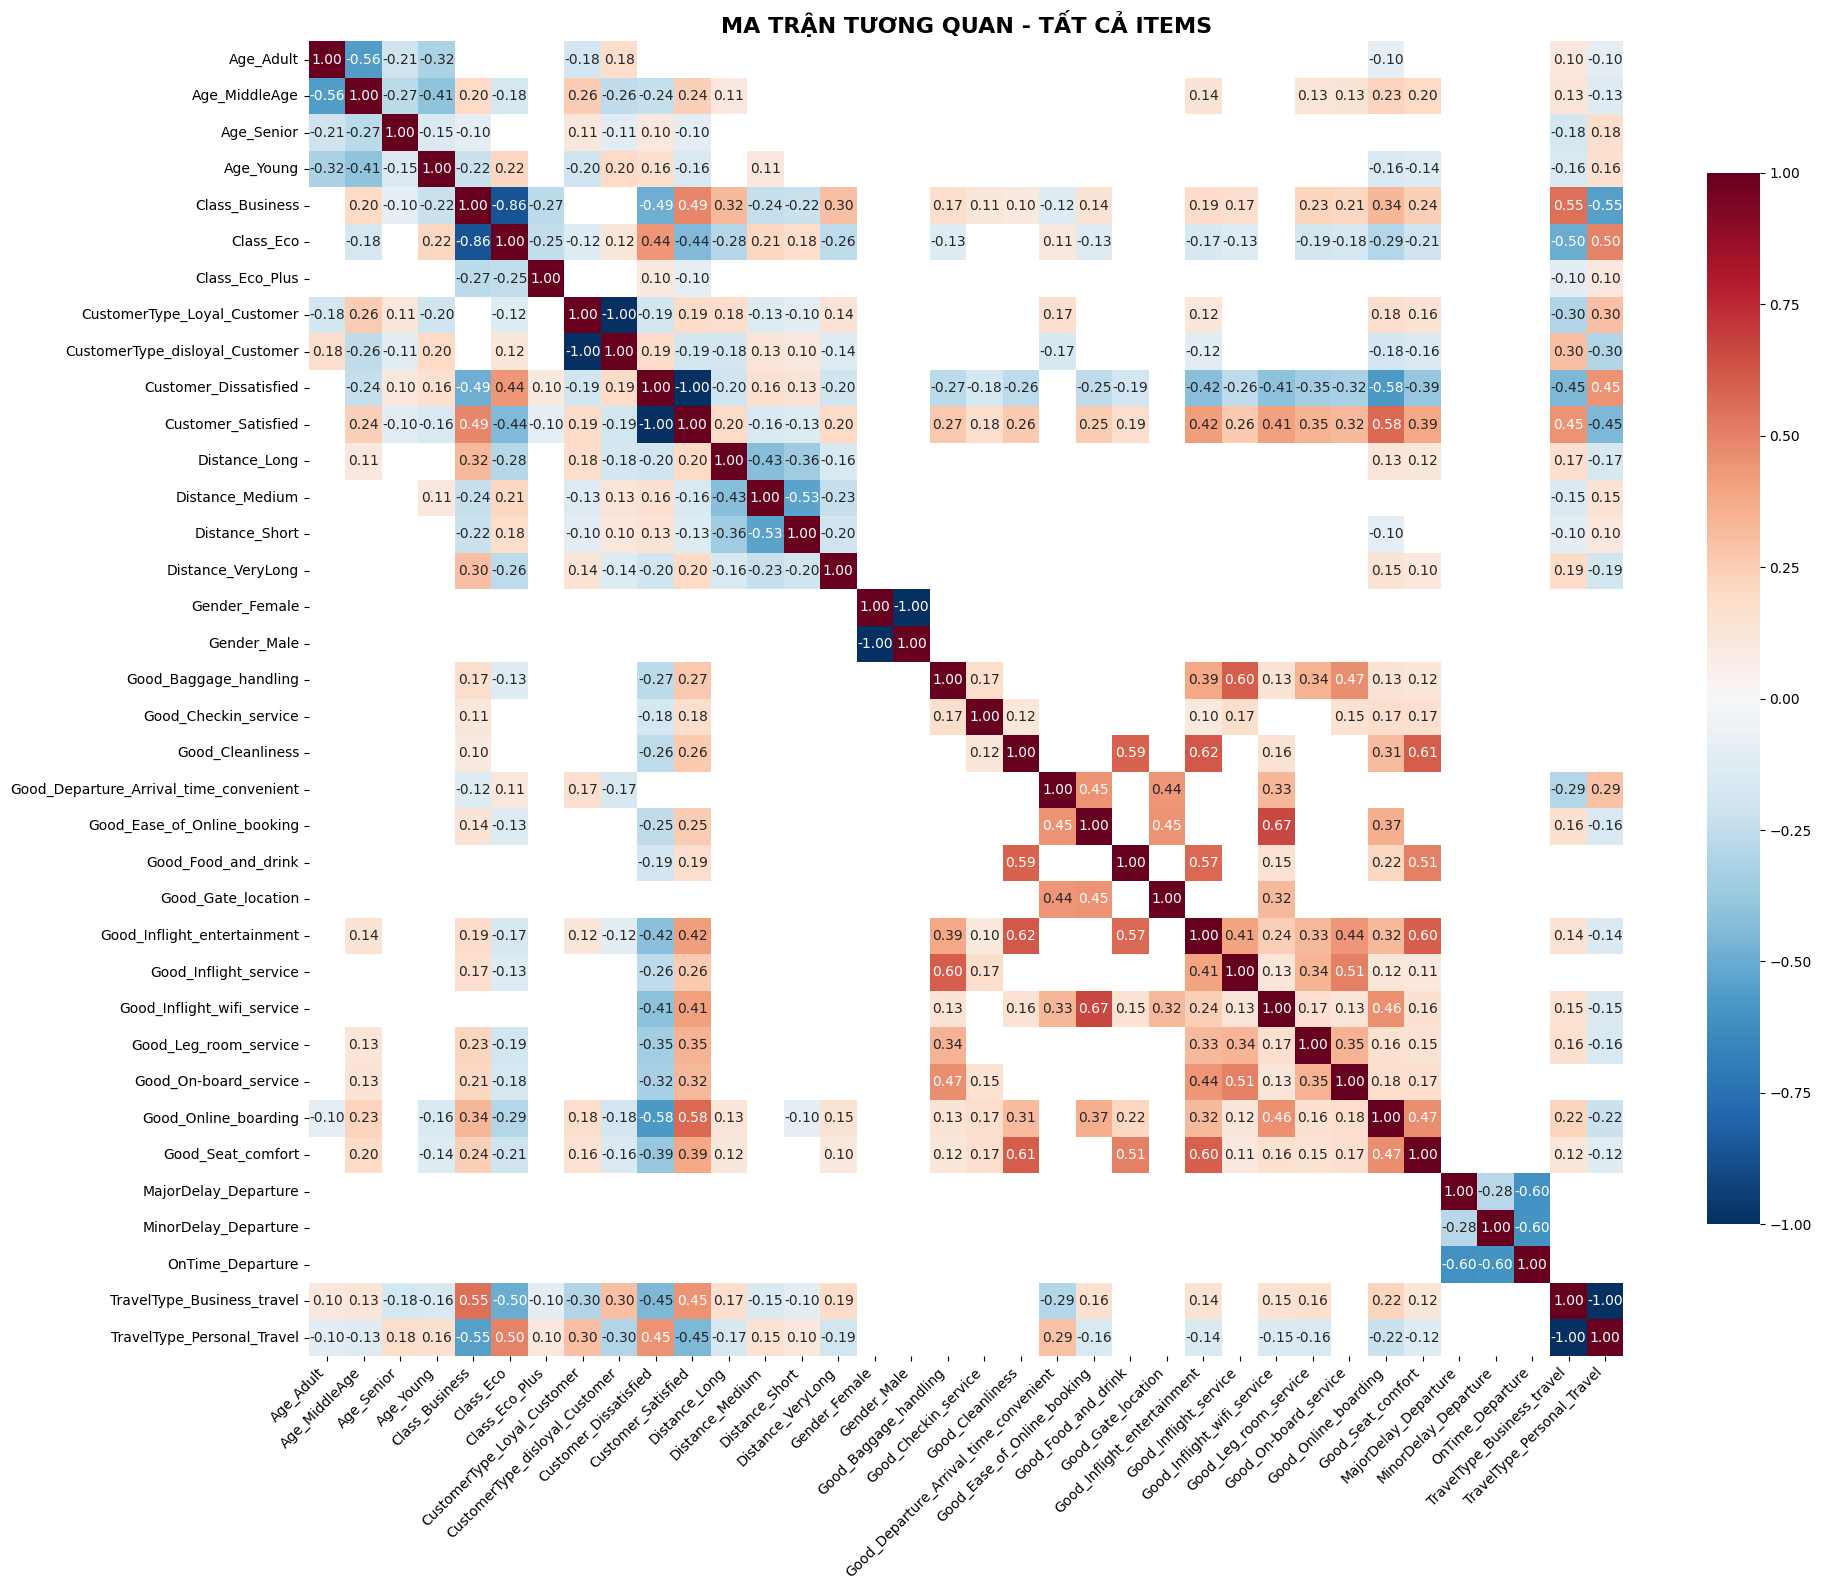

In [129]:
# 5.1 Ma trận tương quan tổng quan
print("5.1. Ma trận tương quan tổng quan")

# Lấy correlation matrix
corr_matrix = df_trans.corr()

# Tạo heatmap lớn
plt.figure(figsize=(20, 16))
mask = corr_matrix.abs() < 0.1  # Ẩn correlation yếu < 0.1

sns.heatmap(corr_matrix,
           annot=True,
           cmap='RdBu_r',
           center=0,
           fmt='.2f',
           square=True,
           mask=mask,  # Chỉ hiện correlation mạnh
           cbar_kws={"shrink": .8})

plt.title('MA TRẬN TƯƠNG QUAN - TẤT CẢ ITEMS', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [130]:
# 5.2 Top correlations mạnh nhất
print("\n5.2. TOP 15 CORRELATIONS MẠNH NHẤT:")

# Tạo list các cặp correlation
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.1:  # Chỉ lấy correlation > 0.1
            corr_pairs.append({
                'Item_1': corr_matrix.columns[i],
                'Item_2': corr_matrix.columns[j],
                'Correlation': corr_val,
                'Abs_Correlation': abs(corr_val)
            })

# Sort và hiển thị
corr_df = pd.DataFrame(corr_pairs).sort_values('Abs_Correlation', ascending=False)

for i, row in corr_df.head(15).iterrows():
    item1 = item_name(row['Item_1'])
    item2 = item_name(row['Item_2'])
    corr = row['Correlation']
    direction = "Cùng chiều" if corr > 0 else "Ngược chiều"
    strength = "Mạnh" if abs(corr) > 0.3 else "Vừa" if abs(corr) > 0.2 else "Yếu"

    print(f"{i+1:2d}. {item1} ↔ {item2}")
    print(f"    Correlation: {corr:.3f} ({direction}, {strength})")


5.2. TOP 15 CORRELATIONS MẠNH NHẤT:
89. Khách trung thành ↔ Khách thường
    Correlation: -1.000 (Ngược chiều, Mạnh)
114. Khách không hài lòng ↔ Khách hài lòng
    Correlation: -1.000 (Ngược chiều, Mạnh)
170. Gender Female ↔ Gender Male
    Correlation: -1.000 (Ngược chiều, Mạnh)
239. Đi công tác ↔ Đi cá nhân
    Correlation: -1.000 (Ngược chiều, Mạnh)
44. Hạng thương gia ↔ Hạng phổ thông
    Correlation: -0.865 (Ngược chiều, Mạnh)
196. Good Ease of Online booking ↔ WiFi tốt
    Correlation: 0.671 (Cùng chiều, Mạnh)
186. Good Cleanliness ↔ Good Inflight entertainment
    Correlation: 0.621 (Cùng chiều, Mạnh)
189. Good Cleanliness ↔ Ghế thoải mái
    Correlation: 0.608 (Cùng chiều, Mạnh)
237. MajorDelay Departure ↔ Bay đúng giờ
    Correlation: -0.604 (Ngược chiều, Mạnh)
173. Good Baggage handling ↔ Good Inflight service
    Correlation: 0.603 (Cùng chiều, Mạnh)
238. MinorDelay Departure ↔ Bay đúng giờ
    Correlation: -0.599 (Ngược chiều, Mạnh)
210. Good Inflight entertainment ↔ Ghế t


5.3. Network Graph - Cấu trúc mối quan hệ


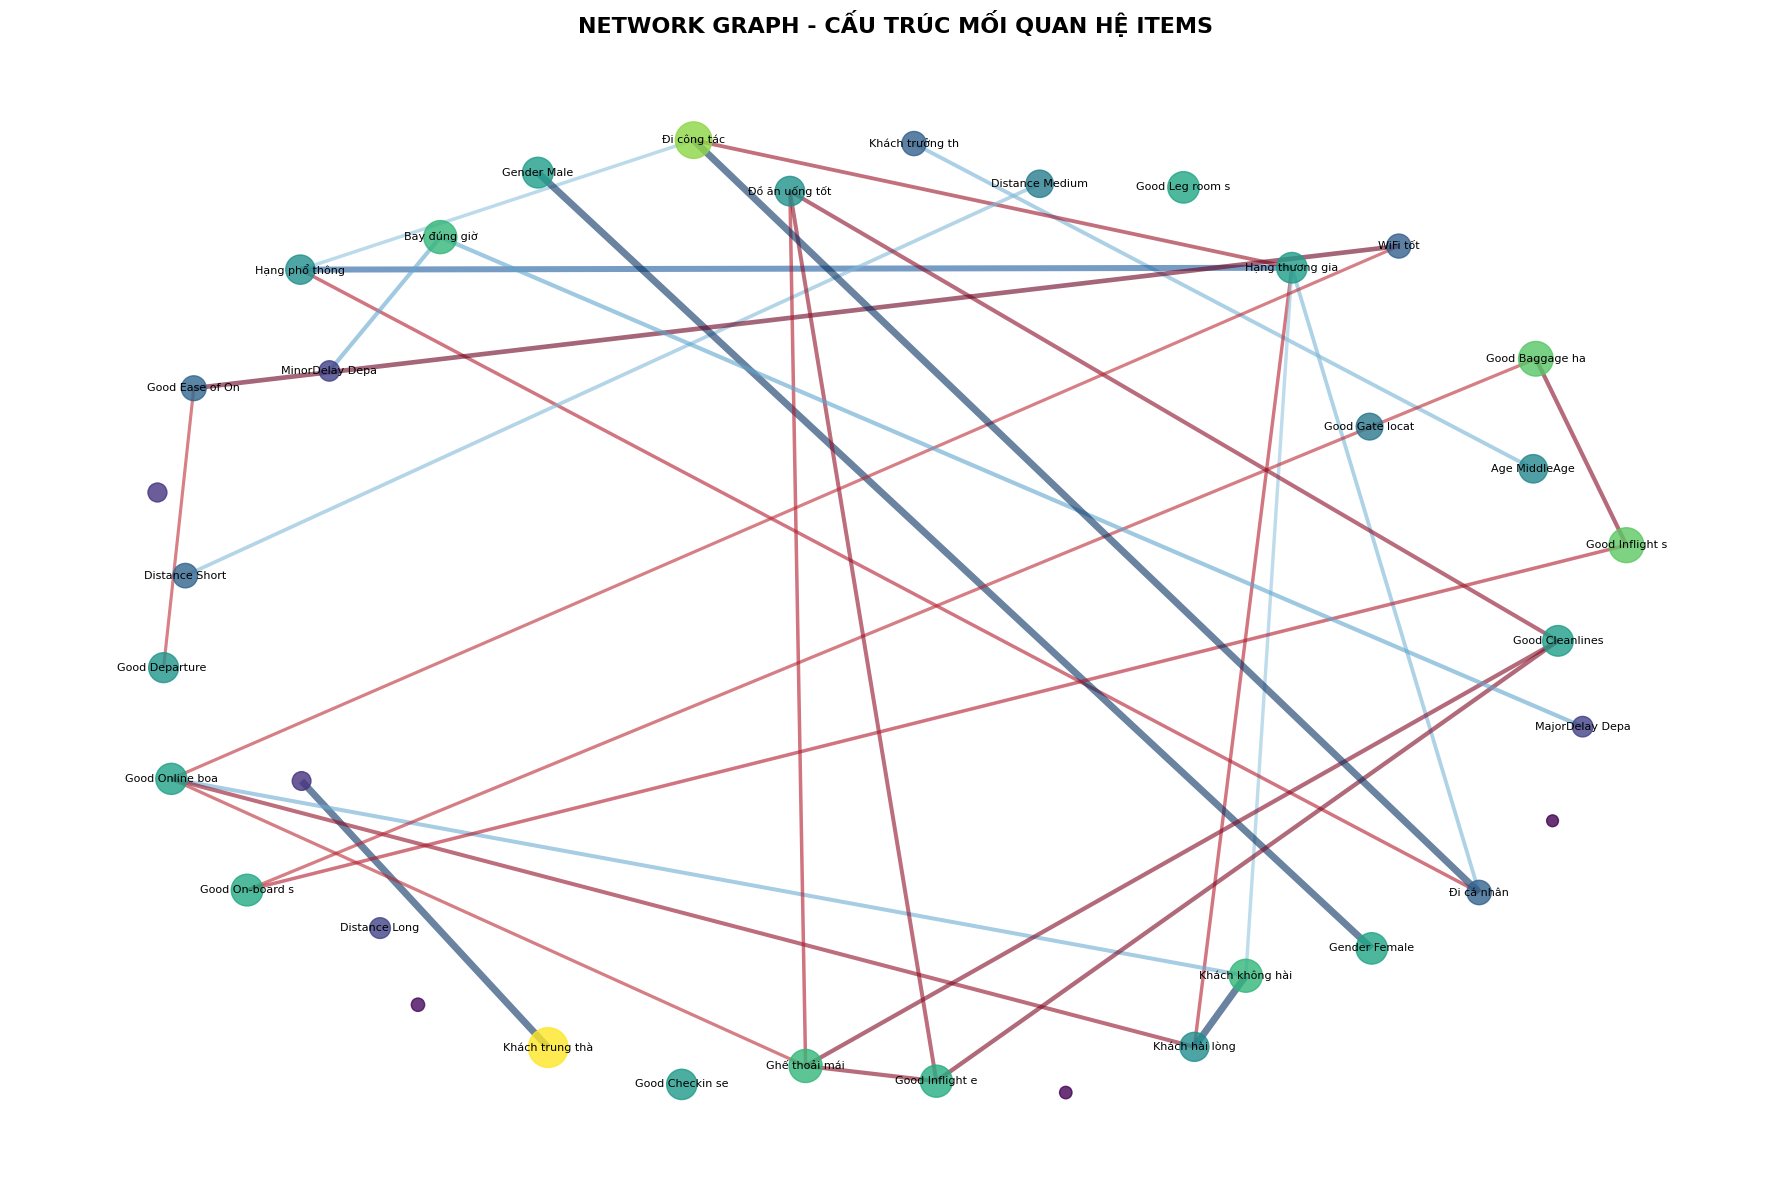

 Network có 36 nodes và 30 edges


In [131]:
# 5.3 Network Graph - Cấu trúc mối quan hệ
print("\n5.3. Network Graph - Cấu trúc mối quan hệ")

# Tạo network graph
import networkx as nx
G = nx.Graph()

# Thêm nodes (items)
for item in df_trans.columns:
    frequency = df_trans[item].mean()
    G.add_node(item,
              size=frequency*1000,  # Size = frequency
              frequency=frequency)

# Thêm edges (correlations mạnh)
for _, row in corr_df.head(30).iterrows():  # Top 30 correlations
    if abs(row['Correlation']) > 0.15:  # Chỉ correlation > 0.15
        G.add_edge(row['Item_1'], row['Item_2'],
                  weight=abs(row['Correlation']),
                  correlation=row['Correlation'])

# Vẽ network
plt.figure(figsize=(18, 12))

# Layout
pos = nx.spring_layout(G, k=3, iterations=50)

# Nodes
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_colors = [G.nodes[node]['frequency'] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos,
                      node_size=node_sizes,
                      node_color=node_colors,
                      cmap='viridis',
                      alpha=0.8)

# Edges - màu theo correlation
edge_colors = [G.edges[edge]['correlation'] for edge in G.edges()]
edge_widths = [G.edges[edge]['weight']*5 for edge in G.edges()]

nx.draw_networkx_edges(G, pos,
                      edge_color=edge_colors,
                      edge_cmap=plt.cm.RdBu_r,
                      width=edge_widths,
                      alpha=0.6)

# Labels (chỉ hiện items quan trọng)
important_nodes = [node for node in G.nodes() if G.nodes[node]['frequency'] > 0.2]
nx.draw_networkx_labels(G, pos,
                       labels={node: item_name(node)[:15] for node in important_nodes},
                       font_size=8)

plt.title('NETWORK GRAPH - CẤU TRÚC MỐI QUAN HỆ ITEMS', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f" Network có {G.number_of_nodes()} nodes và {G.number_of_edges()} edges")


5.4. Dashboard tổng quan 6-in-1


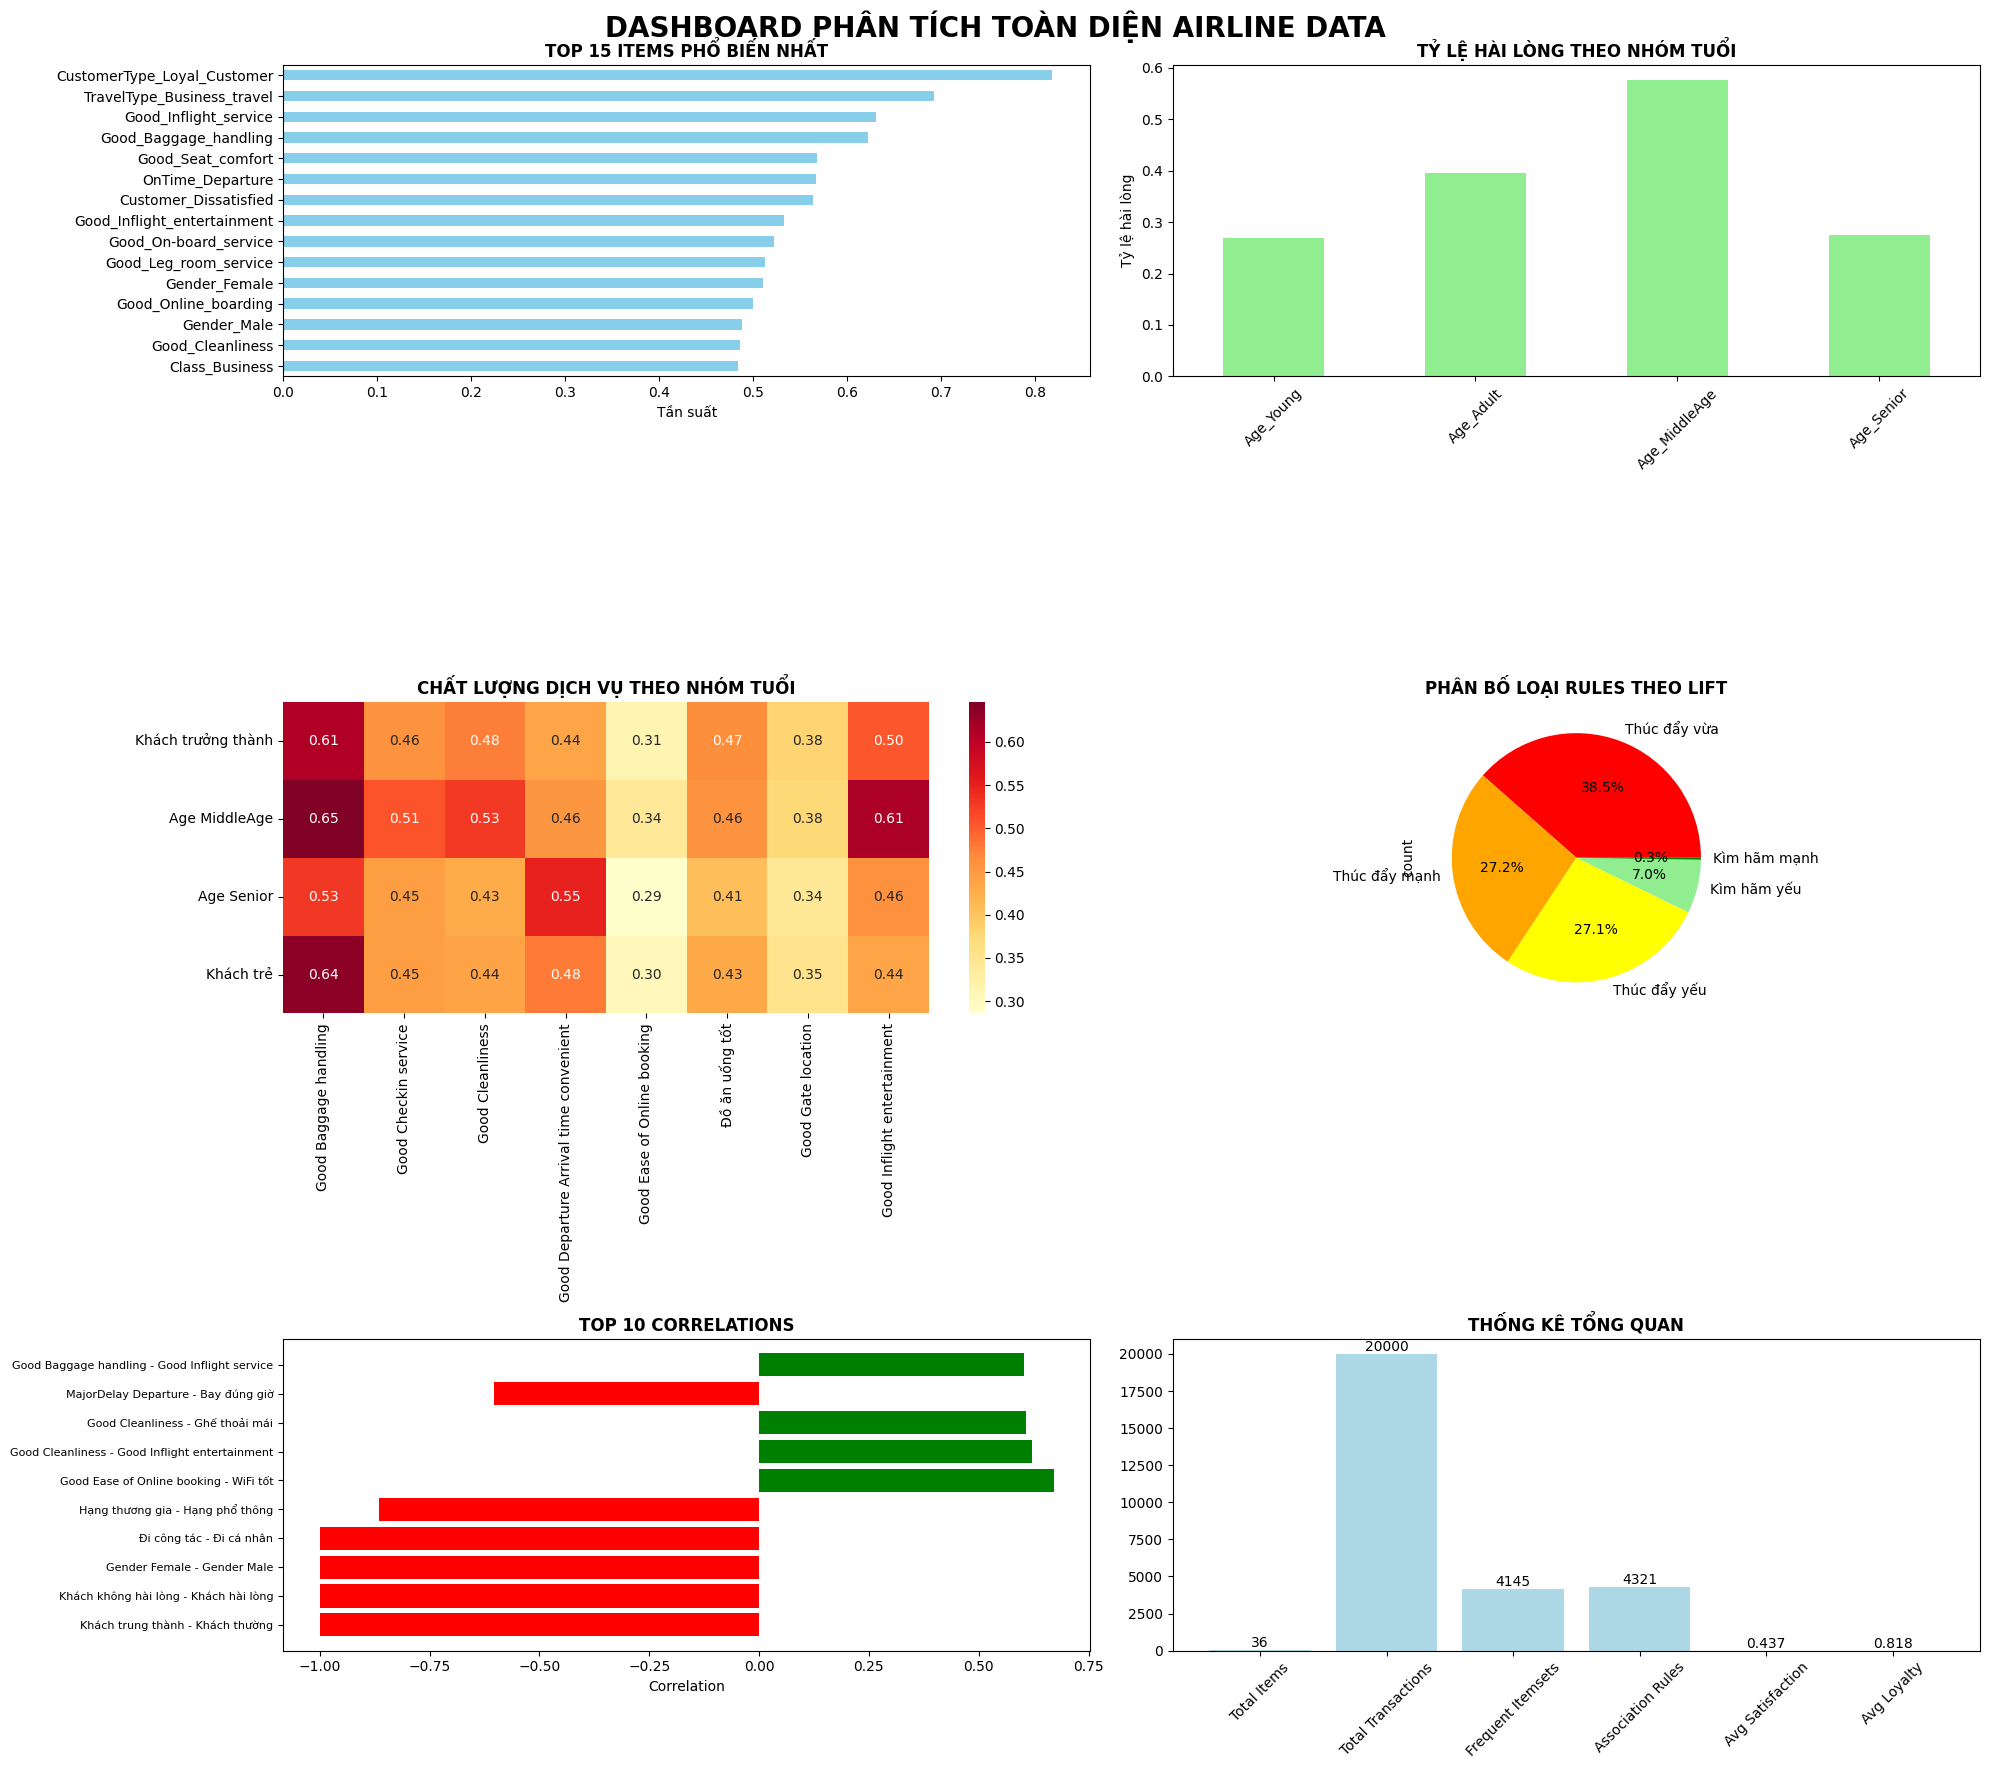

In [132]:
# 5.4 Dashboard tổng quan 6-in-1
print("\n5.4. Dashboard tổng quan 6-in-1")

fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('DASHBOARD PHÂN TÍCH TOÀN DIỆN AIRLINE DATA', fontsize=20, fontweight='bold')

# 1. Frequency của tất cả items
ax1 = axes[0, 0]
item_freq = df_trans.mean().sort_values(ascending=True)
item_freq.tail(15).plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('TOP 15 ITEMS PHỔ BIẾN NHẤT', fontweight='bold')
ax1.set_xlabel('Tần suất')

# 2. Satisfaction vs Demographics
ax2 = axes[0, 1]
demo_satisfaction = pd.DataFrame()
demo_cols = ['Age_Young', 'Age_Adult', 'Age_MiddleAge', 'Age_Senior']
for col in demo_cols:
    if col in df_trans.columns:
        subset = df_trans[df_trans[col] == 1]
        if len(subset) > 0:
            sat_rate = subset['Customer_Satisfied'].mean() if 'Customer_Satisfied' in subset.columns else 0
            demo_satisfaction.loc[col, 'Satisfaction_Rate'] = sat_rate

demo_satisfaction['Satisfaction_Rate'].plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('TỶ LỆ HÀI LÒNG THEO NHÓM TUỔI', fontweight='bold')
ax2.set_ylabel('Tỷ lệ hài lòng')
ax2.tick_params(axis='x', rotation=45)

# 3. Service Quality Heatmap
ax3 = axes[1, 0]
service_cols = [col for col in df_trans.columns if col.startswith('Good_')]
age_cols = [col for col in df_trans.columns if col.startswith('Age_')]

if service_cols and age_cols:
    service_age_matrix = []
    for age in age_cols:
        row = []
        for service in service_cols[:8]:  # Top 8 services
            if age in df_trans.columns and service in df_trans.columns:
                age_subset = df_trans[df_trans[age] == 1]
                if len(age_subset) > 0:
                    rate = age_subset[service].mean()
                else:
                    rate = 0
                row.append(rate)
        service_age_matrix.append(row)

    service_age_df = pd.DataFrame(service_age_matrix,
                                 index=[item_name(col) for col in age_cols],
                                 columns=[item_name(col) for col in service_cols[:8]])

    sns.heatmap(service_age_df, annot=True, cmap='YlOrRd', ax=ax3, fmt='.2f')
    ax3.set_title('CHẤT LƯỢNG DỊCH VỤ THEO NHÓM TUỔI', fontweight='bold')

# 4. Rules Distribution
ax4 = axes[1, 1]
if len(rules) > 0:
    lift_bins = pd.cut(rules['lift'], bins=[0, 0.8, 1.0, 1.2, 1.5, 5.0],
                      labels=['Kìm hãm mạnh', 'Kìm hãm yếu', 'Thúc đẩy yếu', 'Thúc đẩy vừa', 'Thúc đẩy mạnh'])
    lift_dist = lift_bins.value_counts()
    lift_dist.plot(kind='pie', ax=ax4, autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'lightgreen', 'green'])
    ax4.set_title('PHÂN BỐ LOẠI RULES THEO LIFT', fontweight='bold')

# 5. Top Correlations
ax5 = axes[2, 0]
if len(corr_df) > 0:
    top_corr = corr_df.head(10)
    colors = ['green' if x > 0 else 'red' for x in top_corr['Correlation']]
    ax5.barh(range(len(top_corr)), top_corr['Correlation'], color=colors)
    ax5.set_yticks(range(len(top_corr)))
    ax5.set_yticklabels([f"{item_name(row['Item_1'])} - {item_name(row['Item_2'])}"
                        for _, row in top_corr.iterrows()], fontsize=8)
    ax5.set_title('TOP 10 CORRELATIONS', fontweight='bold')
    ax5.set_xlabel('Correlation')

# 6. Overall Statistics
ax6 = axes[2, 1]
stats_data = {
    'Total Items': len(df_trans.columns),
    'Total Transactions': len(df_trans),
    'Frequent Itemsets': len(frequent_itemsets),
    'Association Rules': len(rules),
    'Avg Satisfaction': df_trans['Customer_Satisfied'].mean() if 'Customer_Satisfied' in df_trans.columns else 0,
    'Avg Loyalty': df_trans['CustomerType_Loyal_Customer'].mean() if 'CustomerType_Loyal_Customer' in df_trans.columns else 0
}

stats_df = pd.DataFrame(list(stats_data.items()), columns=['Metric', 'Value'])
bars = ax6.bar(stats_df['Metric'], stats_df['Value'], color='lightblue')
ax6.set_title('THỐNG KÊ TỔNG QUAN', fontweight='bold')
ax6.tick_params(axis='x', rotation=45)

# Thêm giá trị lên bars
for bar, value in zip(bars, stats_df['Value']):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}' if value < 1 else f'{int(value)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [133]:
# 5.5 Tóm tắt insights chính
print("\n5.5. Tóm tắt insights chính")

# Tạo summary insights
insights_data = []

# 1. Age Group Insights
for age_col in ['Age_Young', 'Age_Adult', 'Age_MiddleAge', 'Age_Senior']:
    if age_col in df_trans.columns:
        age_subset = df_trans[df_trans[age_col] == 1]
        if len(age_subset) > 0:
            insights_data.append({
                'Category': 'Demographics',
                'Item': item_name(age_col),
                'Frequency': f"{df_trans[age_col].mean():.1%}",
                'Satisfaction_Rate': f"{age_subset['Customer_Satisfied'].mean():.1%}" if 'Customer_Satisfied' in age_subset.columns else "N/A",
                'Key_Pattern': f"Nhóm {'chính' if df_trans[age_col].mean() > 0.25 else 'phụ'}"
            })

# 2. Service Insights
service_cols = [col for col in df_trans.columns if col.startswith('Good_')]
for service_col in service_cols[:10]:  # Top 10 services
    insights_data.append({
        'Category': 'Service Quality',
        'Item': item_name(service_col),
        'Frequency': f"{df_trans[service_col].mean():.1%}",
        'Satisfaction_Rate': "N/A",
        'Key_Pattern': f"Dịch vụ {'mạnh' if df_trans[service_col].mean() > 0.6 else 'yếu'}"
    })

# 3. Customer Type Insights
for cust_col in ['CustomerType_Loyal_Customer', 'CustomerType_disloyal_Customer']:
    if cust_col in df_trans.columns:
        cust_subset = df_trans[df_trans[cust_col] == 1]
        if len(cust_subset) > 0:
            insights_data.append({
                'Category': 'Customer Type',
                'Item': item_name(cust_col),
                'Frequency': f"{df_trans[cust_col].mean():.1%}",
                'Satisfaction_Rate': f"{cust_subset['Customer_Satisfied'].mean():.1%}" if 'Customer_Satisfied' in cust_subset.columns else "N/A",
                'Key_Pattern': "Segment quan trọng" if df_trans[cust_col].mean() > 0.5 else "Segment nhỏ"
            })

# Tạo DataFrame và hiển thị
insights_df = pd.DataFrame(insights_data)
print(insights_df.to_string(index=False, max_colwidth=20))



5.5. Tóm tắt insights chính
       Category                 Item Frequency Satisfaction_Rate        Key_Pattern
   Demographics            Khách trẻ     18.6%             26.8%           Nhóm phụ
   Demographics   Khách trưởng thành     30.3%             39.6%         Nhóm chính
   Demographics        Age MiddleAge     41.8%             57.7%         Nhóm chính
   Demographics           Age Senior      9.3%             27.4%           Nhóm phụ
Service Quality Good Baggage hand...     62.3%               N/A       Dịch vụ mạnh
Service Quality Good Checkin service     47.6%               N/A        Dịch vụ yếu
Service Quality     Good Cleanliness     48.7%               N/A        Dịch vụ yếu
Service Quality Good Departure Ar...     46.3%               N/A        Dịch vụ yếu
Service Quality Good Ease of Onli...     31.9%               N/A        Dịch vụ yếu
Service Quality       Đồ ăn uống tốt     45.1%               N/A        Dịch vụ yếu
Service Quality   Good Gate location     37.0% 

In [134]:
print(f"1. Nhóm tuổi chính: Age_MiddleAge ({df_trans['Age_MiddleAge'].mean():.1%})")
print(f"2. Dịch vụ mạnh nhất: {item_freq.index[-1]} ({item_freq.iloc[-1]:.1%})")
print(f"3. Tổng rules: {len(rules)} rules với {len(frequent_itemsets)} frequent itemsets")
print(f"4. Correlation mạnh nhất: {corr_df.iloc[0]['Correlation']:.3f}")

1. Nhóm tuổi chính: Age_MiddleAge (41.8%)
2. Dịch vụ mạnh nhất: CustomerType_Loyal_Customer (81.8%)
3. Tổng rules: 4321 rules với 4145 frequent itemsets
4. Correlation mạnh nhất: -1.000


-------

# IV. MỘT SỐ KỸ THUẬT PHÂN LOẠI DỮ LIỆU

## Task 1: Khám phá và Tiền xử lý Dữ liệu cho Phân loại


### Task 1.1 Khai phá lại dữ liệu

In [135]:
# Hiển thị 5 dòng đầu tiên để kiểm tra dữ liệu
print("1.1.1. Hiển thị 5 dòng đầu tiên của df_processed:")
print(df_processed[['satisfaction', 'Customer Type', 'Class', 'Age', 'Flight Distance']].head())

1.1.1. Hiển thị 5 dòng đầu tiên của df_processed:
              satisfaction      Customer Type     Class  Age  Flight Distance
0  neutral or dissatisfied     Loyal Customer  Eco Plus   13            460.0
1  neutral or dissatisfied  disloyal Customer  Business   25            235.0
2                satisfied     Loyal Customer  Business   26           1142.0
3  neutral or dissatisfied     Loyal Customer  Business   25            562.0
4                satisfied     Loyal Customer  Business   61            214.0


In [136]:
# Sử dụng df.info() và df.describe() để xem thông tin tổng quan
print(f"Kích thước dữ liệu: {df_processed.shape}")
print(f"Số lượng cột: {df_processed.shape[1]}")
print(f"Số lượng hàng: {df_processed.shape[0]}")

Kích thước dữ liệu: (103904, 65)
Số lượng cột: 65
Số lượng hàng: 103904


In [137]:
# Kiểm tra missing values
print("Kiểm tra missing values:")
missing_info = df_processed.isnull().sum()
missing_columns = missing_info[missing_info > 0]
if len(missing_columns) > 0:
    print("Các cột có missing values:")
    for col, count in missing_columns.items():
        print(f"  - {col}: {count} giá trị thiếu ({count/len(df_processed)*100:.1f}%)")
else:
    print("Không có missing values trong dữ liệu")

Kiểm tra missing values:
Các cột có missing values:
  - Arrival Delay in Minutes: 310 giá trị thiếu (0.3%)


In [138]:
# Phân tích biến mục tiêu satisfaction
print("\n1.1.4. Phân tích biến mục tiêu 'satisfaction':")
satisfaction_counts = df_processed['satisfaction'].value_counts()
satisfaction_pct = df_processed['satisfaction'].value_counts(normalize=True) * 100

print("Phân bố satisfaction:")
for category, count in satisfaction_counts.items():
    pct = satisfaction_pct[category]
    print(f"  - {category}: {count:,} khách hàng ({pct:.1f}%)")


1.1.4. Phân tích biến mục tiêu 'satisfaction':
Phân bố satisfaction:
  - neutral or dissatisfied: 58,879 khách hàng (56.7%)
  - satisfied: 45,025 khách hàng (43.3%)


In [139]:
# Kiểm tra class imbalance
minority_pct = min(satisfaction_pct.values)
if minority_pct < 40:
    print(f"Cảnh báo: Dữ liệu có class imbalance (tỷ lệ nhóm thiểu số: {minority_pct:.1f}%)")
else:
    print(f"Dữ liệu tương đối cân bằng (tỷ lệ nhóm thiểu số: {minority_pct:.1f}%)")

Dữ liệu tương đối cân bằng (tỷ lệ nhóm thiểu số: 43.3%)


### Task 1.2 Tiền xử lý dữ liệu cho mô hình phân loại

In [140]:
# Tạo DataFrame clean cho classification
df_clean = df_processed.copy()

In [141]:

# Chọn các đặc trưng quan trọng đã được xử lý từ phần trước
selected_features = [
    'Age', 'Flight Distance',
    'Gender_encoded', 'Customer Type_encoded', 'Type of Travel_encoded', 'Class_encoded',
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

In [142]:
# Kiểm tra đặc trưng nào có sẵn trong df_processed
available_features = [col for col in selected_features if col in df_processed.columns]
print(f"Số đặc trưng có sẵn: {len(available_features)}")
print(f"Các đặc trưng được chọn: {available_features[:10]}...") # Hiển thị 10 đầu tiên

Số đặc trưng có sẵn: 20
Các đặc trưng được chọn: ['Age', 'Flight Distance', 'Gender_encoded', 'Customer Type_encoded', 'Type of Travel_encoded', 'Class_encoded', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']...


In [143]:
# Tạo df_clean chỉ với các cột cần thiết
df_clean = df_processed[available_features + ['satisfaction']].copy()

print(f"df_clean shape: {df_clean.shape}")

df_clean shape: (103904, 21)


In [144]:
# Xử lý giá trị thiếu (điền bằng median cho numeric, mode cho categorical)
print("Xử lý giá trị thiếu:")
for col in available_features:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        if df_clean[col].dtype in ['int64', 'float64']:
            # Điền median cho numeric
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"  - {col}: Điền {missing_count} giá trị thiếu bằng median ({median_val:.2f})")
        else:
            # Điền mode cho categorical
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"  - {col}: Điền {missing_count} giá trị thiếu bằng mode ({mode_val})")


Xử lý giá trị thiếu:


In [145]:

# Kiểm tra lại missing values
remaining_missing = df_clean.isnull().sum().sum()
print(f"Tổng missing values còn lại: {remaining_missing}")

Tổng missing values còn lại: 0


In [146]:
# Mã hóa biến mục tiêu (satisfaction -> 0,1)
print("Chuyển satisfaction thành dạng số: 0 cho 'neutral or dissatisfied', 1 cho 'satisfied'")
df_clean['satisfaction_encoded'] = (df_clean['satisfaction'] == 'satisfied').astype(int)

print(f"Phân bố sau mã hóa:")
encoded_counts = df_clean['satisfaction_encoded'].value_counts().sort_index()
for val, count in encoded_counts.items():
    label = 'satisfied' if val == 1 else 'neutral or dissatisfied'
    print(f"  - {val} ({label}): {count:,} khách hàng")

Chuyển satisfaction thành dạng số: 0 cho 'neutral or dissatisfied', 1 cho 'satisfied'
Phân bố sau mã hóa:
  - 0 (neutral or dissatisfied): 58,879 khách hàng
  - 1 (satisfied): 45,025 khách hàng


In [147]:
#  In ra 5 dòng đầu của df_clean sau khi xử lý
print(" Hiển thị 5 dòng đầu của df_clean sau xử lý:")
display_cols = ['satisfaction', 'satisfaction_encoded'] + available_features[:8]
print(df_clean[display_cols].head())

 Hiển thị 5 dòng đầu của df_clean sau xử lý:
              satisfaction  satisfaction_encoded  Age  Flight Distance  \
0  neutral or dissatisfied                     0   13            460.0   
1  neutral or dissatisfied                     0   25            235.0   
2                satisfied                     1   26           1142.0   
3  neutral or dissatisfied                     0   25            562.0   
4                satisfied                     1   61            214.0   

   Gender_encoded  Customer Type_encoded  Type of Travel_encoded  \
0               1                      0                       1   
1               1                      1                       0   
2               0                      0                       0   
3               0                      0                       0   
4               1                      0                       0   

   Class_encoded  Inflight wifi service  Departure/Arrival time convenient  
0              2        

## Task 2: Phân chia dữ liệu và huấn luyện mô hình


### Task 2.1: Tách dữ liệu thành tập huấn luyện và kiểm tra

In [148]:
# Tách dữ liệu thành X (đặc trưng) và y (biến mục tiêu)
X = df_clean[available_features]  # Các đặc trưng đầu vào
y = df_clean['satisfaction_encoded']  # Biến mục tiêu

In [149]:
print(f"  - X (features): {X.shape}")
print(f"  - y (target): {y.shape}")
print(f"  - Số đặc trưng: {X.shape[1]}")
print(f"  - Số mẫu: {X.shape[0]}")

  - X (features): (103904, 20)
  - y (target): (103904,)
  - Số đặc trưng: 20
  - Số mẫu: 103904


In [150]:
#  Chia dữ liệu train/test với tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% cho test set
    random_state=42,    # Đảm bảo reproducible
    stratify=y          # Giữ tỷ lệ class trong train/test
)


In [151]:
print(f"Kết quả phân chia dữ liệu:")
print(f"  - Training set: {X_train.shape[0]:,} mẫu ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  - Test set: {X_test.shape[0]:,} mẫu ({X_test.shape[0]/len(X)*100:.1f}%)")

Kết quả phân chia dữ liệu:
  - Training set: 83,123 mẫu (80.0%)
  - Test set: 20,781 mẫu (20.0%)


In [152]:
# Kiểm tra phân bố class trong train/test
print(f"\nPhân bố class trong training set:")
train_dist = y_train.value_counts(normalize=True).sort_index()
for val, pct in train_dist.items():
    label = 'satisfied' if val == 1 else 'not satisfied'
    print(f"  - {label}: {pct:.1%}")

print(f"\nPhân bố class trong test set:")
test_dist = y_test.value_counts(normalize=True).sort_index()
for val, pct in test_dist.items():
    label = 'satisfied' if val == 1 else 'not satisfied'
    print(f"  - {label}: {pct:.1%}")


Phân bố class trong training set:
  - not satisfied: 56.7%
  - satisfied: 43.3%

Phân bố class trong test set:
  - not satisfied: 56.7%
  - satisfied: 43.3%


### Task 2.2: Huấn luyện mô hình Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier


In [154]:
#  Khởi tạo mô hình Decision Tree
print(" Khởi tạo Decision Tree Classifier:")
dt_model = DecisionTreeClassifier(
    max_depth=10,       # Giới hạn độ sâu để tránh overfitting
    min_samples_split=20,  # Số mẫu tối thiểu để split
    min_samples_leaf=10,   # Số mẫu tối thiểu ở lá
    random_state=42
)

 Khởi tạo Decision Tree Classifier:


In [155]:
print(f"Tham số mô hình Decision Tree:")
print(f"  - max_depth: {dt_model.max_depth}")
print(f"  - min_samples_split: {dt_model.min_samples_split}")
print(f"  - min_samples_leaf: {dt_model.min_samples_leaf}")

Tham số mô hình Decision Tree:
  - max_depth: 10
  - min_samples_split: 20
  - min_samples_leaf: 10


In [156]:
#  Huấn luyện mô hình
print(f"Huấn luyện Decision Tree trên {X_train.shape[0]:,} mẫu...")
dt_model.fit(X_train, y_train)


Huấn luyện Decision Tree trên 83,123 mẫu...


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [157]:
# Hiển thị feature importance top 10
print(f"\nTop 10 đặc trưng quan trọng nhất (Feature Importance):")
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, row in feature_importance.head(10).iterrows():
    print(f"  {row.name + 1:2d}. {row['feature']}: {row['importance']:.4f}")


Top 10 đặc trưng quan trọng nhất (Feature Importance):
  12. Online boarding: 0.4454
   5. Type of Travel_encoded: 0.1795
   7. Inflight wifi service: 0.1406
  14. Inflight entertainment: 0.0552
   4. Customer Type_encoded: 0.0480
  18. Checkin service: 0.0292
   6. Class_encoded: 0.0272
  17. Baggage handling: 0.0121
  10. Gate location: 0.0112
   1. Age: 0.0110


### Task 2.3: Huấn luyện mô hình Naive Bayes

In [158]:
from sklearn.naive_bayes import GaussianNB


In [159]:
# Khởi tạo mô hình Naive Bayes
print("Khởi tạo Gaussian Naive Bayes:")
nb_model = GaussianNB()
print("Mô hình Naive Bayes không có tham số đặc biệt cần thiết lập")

Khởi tạo Gaussian Naive Bayes:
Mô hình Naive Bayes không có tham số đặc biệt cần thiết lập


In [160]:
# Huấn luyện mô hình
print(f"Huấn luyện Naive Bayes trên {X_train.shape[0]:,} mẫu...")
nb_model.fit(X_train, y_train)

Huấn luyện Naive Bayes trên 83,123 mẫu...


GaussianNB()

In [161]:
# Hiển thị thông tin về các class
print(f"\nThông tin về classes:")
print(f"  - Số classes: {len(nb_model.classes_)}")
print(f"  - Classes: {nb_model.classes_}")
print(f"  - Class prior probabilities:")
for i, (class_val, prior) in enumerate(zip(nb_model.classes_, nb_model.class_prior_)):
    label = 'satisfied' if class_val == 1 else 'not satisfied'
    print(f"    + {label}: {prior:.4f}")


Thông tin về classes:
  - Số classes: 2
  - Classes: [0 1]
  - Class prior probabilities:
    + not satisfied: 0.5667
    + satisfied: 0.4333


###Task 2.4: Huấn luyện mô hình Random Forest (Ensemble Method)

In [162]:
from sklearn.ensemble import RandomForestClassifier


In [163]:
# Khởi tạo mô hình Random Forest
print("Khởi tạo Random Forest Classifier:")
rf_model = RandomForestClassifier(
    n_estimators=100,        # Số cây trong forest
    max_depth=15,           # Độ sâu tối đa của mỗi cây
    min_samples_split=10,   # Số mẫu tối thiểu để split
    min_samples_leaf=5,     # Số mẫu tối thiểu ở lá
    max_features='sqrt',    # Số features được xem xét cho mỗi split
    random_state=42,
    n_jobs=-1              # Sử dụng tất cả CPU cores
)

Khởi tạo Random Forest Classifier:


In [164]:
print(f"Tham số mô hình Random Forest:")
print(f"  - n_estimators: {rf_model.n_estimators}")
print(f"  - max_depth: {rf_model.max_depth}")
print(f"  - min_samples_split: {rf_model.min_samples_split}")
print(f"  - max_features: {rf_model.max_features}")

Tham số mô hình Random Forest:
  - n_estimators: 100
  - max_depth: 15
  - min_samples_split: 10
  - max_features: sqrt


In [165]:
# Huấn luyện mô hình
print(f"Huấn luyện Random Forest trên {X_train.shape[0]:,} mẫu...")
rf_model.fit(X_train, y_train)

Huấn luyện Random Forest trên 83,123 mẫu...


RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       n_jobs=-1, random_state=42)

In [166]:
# Hiển thị feature importance top 10
print(f"\nTop 10 đặc trưng quan trọng nhất từ Random Forest:")
rf_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, row in rf_feature_importance.head(10).iterrows():
    print(f"  {i + 1:2d}. {row['feature']}: {row['importance']:.4f}")



Top 10 đặc trưng quan trọng nhất từ Random Forest:
  12. Online boarding: 0.1938
   7. Inflight wifi service: 0.1350
   6. Class_encoded: 0.1165
   5. Type of Travel_encoded: 0.1105
  14. Inflight entertainment: 0.0686
  13. Seat comfort: 0.0514
   4. Customer Type_encoded: 0.0485
  16. Leg room service: 0.0355
  15. On-board service: 0.0289
   9. Ease of Online booking: 0.0285


In [167]:
# So sánh feature importance giữa Decision Tree và Random Forest
print(f"\nSo sánh Top 5 features quan trọng nhất:")
dt_top5 = feature_importance.head(5)['feature'].tolist()
rf_top5 = rf_feature_importance.head(5)['feature'].tolist()
overlap = len(set(dt_top5) & set(rf_top5))
print(f"  - Decision Tree top 5: {dt_top5}")
print(f"  - Random Forest top 5: {rf_top5}")
print(f"  - Overlap: {overlap}/5 features giống nhau")


So sánh Top 5 features quan trọng nhất:
  - Decision Tree top 5: ['Online boarding', 'Type of Travel_encoded', 'Inflight wifi service', 'Inflight entertainment', 'Customer Type_encoded']
  - Random Forest top 5: ['Online boarding', 'Inflight wifi service', 'Class_encoded', 'Type of Travel_encoded', 'Inflight entertainment']
  - Overlap: 4/5 features giống nhau


### Task 2.5: Huấn luyện mô hình Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [169]:
# Chuẩn hóa dữ liệu cho Logistic Regression
print("Chuẩn hóa dữ liệu cho Logistic Regression:")
print("Logistic Regression nhạy cảm với scale của features, cần chuẩn hóa dữ liệu")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"  - Chuẩn hóa training set: {X_train_scaled.shape}")
print(f"  - Chuẩn hóa test set: {X_test_scaled.shape}")
print(f"  - Mean sau chuẩn hóa: {X_train_scaled.mean():.6f}")
print(f"  - Std sau chuẩn hóa: {X_train_scaled.std():.6f}")

Chuẩn hóa dữ liệu cho Logistic Regression:
Logistic Regression nhạy cảm với scale của features, cần chuẩn hóa dữ liệu
  - Chuẩn hóa training set: (83123, 20)
  - Chuẩn hóa test set: (20781, 20)
  - Mean sau chuẩn hóa: -0.000000
  - Std sau chuẩn hóa: 1.000000


In [170]:
# Khởi tạo mô hình Logistic Regression
print(f"Khởi tạo Logistic Regression:")
lr_model = LogisticRegression(
    max_iter=1000,          # Số iterations tối đa
    random_state=42,
    solver='liblinear',     # Solver phù hợp với binary classification
    C=1.0                   # Regularization strength
)

print(f"Tham số mô hình Logistic Regression:")
print(f"  - max_iter: {lr_model.max_iter}")
print(f"  - solver: {lr_model.solver}")
print(f"  - C (regularization): {lr_model.C}")

Khởi tạo Logistic Regression:
Tham số mô hình Logistic Regression:
  - max_iter: 1000
  - solver: liblinear
  - C (regularization): 1.0


In [171]:
#  Huấn luyện mô hình
print(f"Huấn luyện Logistic Regression trên {X_train_scaled.shape[0]:,} mẫu...")
lr_model.fit(X_train_scaled, y_train)
print("Hoàn thành huấn luyện Logistic Regression!")

# Hiển thị coefficients quan trọng nhất
print(f"\nTop 10 đặc trưng có impact mạnh nhất (|coefficient| lớn nhất):")
lr_coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr_model.coef_[0],
    'abs_coefficient': np.abs(lr_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

for i, row in lr_coefficients.head(10).iterrows():
    impact = "Tích cực" if row['coefficient'] > 0 else "Tiêu cực"
    print(f"  {i + 1:2d}. {row['feature']}: {row['coefficient']:.4f} ({impact})")

print(f"\nIntercept (bias term): {lr_model.intercept_[0]:.4f}")

Huấn luyện Logistic Regression trên 83,123 mẫu...
Hoàn thành huấn luyện Logistic Regression!

Top 10 đặc trưng có impact mạnh nhất (|coefficient| lớn nhất):
   5. Type of Travel_encoded: -1.3912 (Tiêu cực)
   7. Inflight wifi service: 1.0127 (Tích cực)
  12. Online boarding: 0.9720 (Tích cực)
   4. Customer Type_encoded: -0.9241 (Tiêu cực)
  18. Checkin service: 0.4333 (Tích cực)
   6. Class_encoded: -0.4249 (Tiêu cực)
  15. On-board service: 0.4140 (Tích cực)
   8. Departure/Arrival time convenient: -0.3388 (Tiêu cực)
  16. Leg room service: 0.3365 (Tích cực)
  20. Cleanliness: 0.2929 (Tích cực)

Intercept (bias term): -0.7555


## Task 3:  Đánh giá và so sánh mô hình

### Task 3.1: Dự đoán trên tập kiểm tra

In [172]:
# Sử dụng mô hình Decision Tree để dự đoán
print("Dự đoán bằng Decision Tree:")
y_pred_dt = dt_model.predict(X_test)

Dự đoán bằng Decision Tree:


In [173]:
#Sử dụng mô hình Naive Bayes để dự đoán
print(f"Dự đoán bằng Naive Bayes:")
y_pred_nb = nb_model.predict(X_test)

Dự đoán bằng Naive Bayes:


In [174]:
# Sử dụng mô hình Random Forest để dự đoán
print(f"Dự đoán bằng Random Forest:")
y_pred_rf = rf_model.predict(X_test)

Dự đoán bằng Random Forest:


In [175]:
# Sử dụng mô hình Logistic Regression để dự đoán
print(f"Dự đoán bằng Logistic Regression:")
y_pred_lr = lr_model.predict(X_test_scaled)  # Sử dụng dữ liệu đã chuẩn hóa

Dự đoán bằng Logistic Regression:


In [176]:
# So sánh dự đoán của tất cả 4 mô hình
print("\nSo sánh dự đoán của 4 mô hình (10 mẫu đầu):")
comparison_all = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'DT': y_pred_dt[:10],
    'NB': y_pred_nb[:10],
    'RF': y_pred_rf[:10],
    'LR': y_pred_lr[:10]
})
print(comparison_all)


So sánh dự đoán của 4 mô hình (10 mẫu đầu):
   Actual  DT  NB  RF  LR
0       0   0   0   0   0
1       0   0   0   0   0
2       1   1   1   1   1
3       0   0   0   0   0
4       0   0   0   0   0
5       0   0   0   0   0
6       1   1   1   1   1
7       0   0   0   0   0
8       1   1   1   1   1
9       1   1   1   1   1


In [177]:
# Thống kê dự đoán cho tất cả mô hình
models_pred = {
    'Decision Tree': y_pred_dt,
    'Naive Bayes': y_pred_nb,
    'Random Forest': y_pred_rf,
    'Logistic Regression': y_pred_lr
}

In [178]:
print(f"\nThống kê dự đoán tất cả mô hình:")
for model_name, predictions in models_pred.items():
    pred_counts = pd.Series(predictions).value_counts().sort_index()
    print(f"\n{model_name}:")
    for val, count in pred_counts.items():
        label = 'satisfied' if val == 1 else 'not satisfied'
        print(f"  - Dự đoán {label}: {count:,} mẫu ({count/len(predictions)*100:.1f}%)")


Thống kê dự đoán tất cả mô hình:

Decision Tree:
  - Dự đoán not satisfied: 12,083 mẫu (58.1%)
  - Dự đoán satisfied: 8,698 mẫu (41.9%)

Naive Bayes:
  - Dự đoán not satisfied: 12,233 mẫu (58.9%)
  - Dự đoán satisfied: 8,548 mẫu (41.1%)

Random Forest:
  - Dự đoán not satisfied: 12,223 mẫu (58.8%)
  - Dự đoán satisfied: 8,558 mẫu (41.2%)

Logistic Regression:
  - Dự đoán not satisfied: 11,772 mẫu (56.6%)
  - Dự đoán satisfied: 9,009 mẫu (43.4%)


In [179]:
# Đếm số mô hình đồng ý với nhau
print(f"\nPhân tích độ đồng thuận giữa các mô hình:")
agreement_matrix = pd.DataFrame({
    'DT': y_pred_dt,
    'NB': y_pred_nb,
    'RF': y_pred_rf,
    'LR': y_pred_lr
})
# Đếm số mô hình dự đoán cùng một kết quả
unanimous_count = 0  # Tất cả 4 mô hình đồng ý
majority_count = 0   # Ít nhất 3/4 mô hình đồng ý

for i in range(len(agreement_matrix)):
    row = agreement_matrix.iloc[i]
    if len(set(row)) == 1:  # Tất cả đều giống nhau
        unanimous_count += 1
    elif row.value_counts().max() >= 3:  # Ít nhất 3/4 đồng ý
        majority_count += 1

print(f"  - Tất cả 4 mô hình đồng ý: {unanimous_count:,} mẫu ({unanimous_count/len(y_test)*100:.1f}%)")
print(f"  - Ít nhất 3/4 mô hình đồng ý: {majority_count:,} mẫu ({majority_count/len(y_test)*100:.1f}%)")


Phân tích độ đồng thuận giữa các mô hình:
  - Tất cả 4 mô hình đồng ý: 17,829 mẫu (85.8%)
  - Ít nhất 3/4 mô hình đồng ý: 1,853 mẫu (8.9%)


### Task 3.2: Đánh giá mô hình

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [181]:
# Tính độ chính xác (accuracy) - Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f" Độ chính xác (Accuracy) của Decision Tree: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")

 Độ chính xác (Accuracy) của Decision Tree: 0.9320 (93.20%)


In [182]:
#  Ma trận nhầm lẫn (Confusion Matrix)
print(f"Ma trận nhầm lẫn (Confusion Matrix) - Decision Tree:")
dt_cm = confusion_matrix(y_test, y_pred_dt)
print("              Predicted")
print("             0        1")
print(f"Actual 0 {dt_cm[0][0]:6d}   {dt_cm[0][1]:6d}")
print(f"       1 {dt_cm[1][0]:6d}   {dt_cm[1][1]:6d}")


Ma trận nhầm lẫn (Confusion Matrix) - Decision Tree:
              Predicted
             0        1
Actual 0  11223      553
       1    860     8145


In [183]:
# Giải thích confusion matrix
tn, fp, fn, tp = dt_cm.ravel()
print(f"\nGiải thích ma trận nhầm lẫn Decision Tree:")
print(f"  - True Negative (TN): {tn:,} - Dự đoán đúng KHÔNG hài lòng")
print(f"  - False Positive (FP): {fp:,} - Dự đoán sai thành HÀI LÒNG")
print(f"  - False Negative (FN): {fn:,} - Dự đoán sai thành KHÔNG hài lòng")
print(f"  - True Positive (TP): {tp:,} - Dự đoán đúng HÀI LÒNG")


Giải thích ma trận nhầm lẫn Decision Tree:
  - True Negative (TN): 11,223 - Dự đoán đúng KHÔNG hài lòng
  - False Positive (FP): 553 - Dự đoán sai thành HÀI LÒNG
  - False Negative (FN): 860 - Dự đoán sai thành KHÔNG hài lòng
  - True Positive (TP): 8,145 - Dự đoán đúng HÀI LÒNG


In [184]:
# Báo cáo phân loại chi tiết
print(f"\nBáo cáo phân loại chi tiết (Classification Report) - Decision Tree:")
dt_report = classification_report(y_test, y_pred_dt, target_names=['Not Satisfied', 'Satisfied'])
print(dt_report)


Báo cáo phân loại chi tiết (Classification Report) - Decision Tree:
               precision    recall  f1-score   support

Not Satisfied       0.93      0.95      0.94     11776
    Satisfied       0.94      0.90      0.92      9005

     accuracy                           0.93     20781
    macro avg       0.93      0.93      0.93     20781
 weighted avg       0.93      0.93      0.93     20781



In [185]:
# Tính các metric chi tiết
precision_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
recall_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0

precision_1 = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0

print(f"\nMETRIC SUMMARY - Decision Tree:")
print(f"  Class 'Not Satisfied': Precision={precision_0:.3f}, Recall={recall_0:.3f}, F1={f1_0:.3f}")
print(f"  Class 'Satisfied': Precision={precision_1:.3f}, Recall={recall_1:.3f}, F1={f1_1:.3f}")


METRIC SUMMARY - Decision Tree:
  Class 'Not Satisfied': Precision=0.929, Recall=0.953, F1=0.941
  Class 'Satisfied': Precision=0.936, Recall=0.904, F1=0.920


In [186]:
# Tính độ chính xác (accuracy) - Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Độ chính xác (Accuracy) của Naive Bayes: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")

Độ chính xác (Accuracy) của Naive Bayes: 0.8653 (86.53%)


In [187]:

# Tính độ chính xác (accuracy) - Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Độ chính xác (Accuracy) của Random Forest: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

Độ chính xác (Accuracy) của Random Forest: 0.9456 (94.56%)


In [188]:
#  Tính độ chính xác (accuracy) - Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Độ chính xác (Accuracy) của Logistic Regression: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")


Độ chính xác (Accuracy) của Logistic Regression: 0.8828 (88.28%)


In [189]:
#  Ma trận nhầm lẫn (Confusion Matrix)
print(f" Ma trận nhầm lẫn (Confusion Matrix) - Naive Bayes:")
nb_cm = confusion_matrix(y_test, y_pred_nb)
print("             Predicted")
print("            0        1")
print(f"Actual 0 {nb_cm[0][0]:6d}   {nb_cm[0][1]:6d}")
print(f"       1 {nb_cm[1][0]:6d}   {nb_cm[1][1]:6d}")


 Ma trận nhầm lẫn (Confusion Matrix) - Naive Bayes:
             Predicted
            0        1
Actual 0  10605     1171
       1   1628     7377


In [190]:
#  Ma trận nhầm lẫn (Confusion Matrix)
print(f"Ma trận nhầm lẫn (Confusion Matrix) - Random Forest:")
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("            Predicted")
print("            0        1")
print(f"Actual 0 {rf_cm[0][0]:6d}   {rf_cm[0][1]:6d}")
print(f"       1 {rf_cm[1][0]:6d}   {rf_cm[1][1]:6d}")

Ma trận nhầm lẫn (Confusion Matrix) - Random Forest:
            Predicted
            0        1
Actual 0  11434      342
       1    789     8216


In [191]:
#Ma trận nhầm lẫn (Confusion Matrix)
print(f" Ma trận nhầm lẫn (Confusion Matrix) - Logistic Regression:")
lr_cm = confusion_matrix(y_test, y_pred_lr)
print("            Predicted")
print("            0        1")
print(f"Actual 0 {lr_cm[0][0]:6d}   {lr_cm[0][1]:6d}")
print(f"       1 {lr_cm[1][0]:6d}   {lr_cm[1][1]:6d}")

 Ma trận nhầm lẫn (Confusion Matrix) - Logistic Regression:
            Predicted
            0        1
Actual 0  10556     1220
       1   1216     7789


In [192]:
# Giải thích confusion matrix
tn_nb, fp_nb, fn_nb, tp_nb = nb_cm.ravel()
print(f"\nGiải thích ma trận nhầm lẫn Naive Bayes:")
print(f"  - True Negative (TN): {tn_nb:,} - Dự đoán đúng KHÔNG hài lòng")
print(f"  - False Positive (FP): {fp_nb:,} - Dự đoán sai thành HÀI LÒNG")
print(f"  - False Negative (FN): {fn_nb:,} - Dự đoán sai thành KHÔNG hài lòng")
print(f"  - True Positive (TP): {tp_nb:,} - Dự đoán đúng HÀI LÒNG")


Giải thích ma trận nhầm lẫn Naive Bayes:
  - True Negative (TN): 10,605 - Dự đoán đúng KHÔNG hài lòng
  - False Positive (FP): 1,171 - Dự đoán sai thành HÀI LÒNG
  - False Negative (FN): 1,628 - Dự đoán sai thành KHÔNG hài lòng
  - True Positive (TP): 7,377 - Dự đoán đúng HÀI LÒNG


In [193]:
# Giải thích confusion matrix
tn_rf, fp_rf, fn_rf, tp_rf = rf_cm.ravel()
print(f"\nGiải thích ma trận nhầm lẫn Random Forest:")
print(f"  - True Negative (TN): {tn_rf:,} - Dự đoán đúng KHÔNG hài lòng")
print(f"  - False Positive (FP): {fp_rf:,} - Dự đoán sai thành HÀI LÒNG")
print(f"  - False Negative (FN): {fn_rf:,} - Dự đoán sai thành KHÔNG hài lòng")
print(f"  - True Positive (TP): {tp_rf:,} - Dự đoán đúng HÀI LÒNG")



Giải thích ma trận nhầm lẫn Random Forest:
  - True Negative (TN): 11,434 - Dự đoán đúng KHÔNG hài lòng
  - False Positive (FP): 342 - Dự đoán sai thành HÀI LÒNG
  - False Negative (FN): 789 - Dự đoán sai thành KHÔNG hài lòng
  - True Positive (TP): 8,216 - Dự đoán đúng HÀI LÒNG


In [194]:
# Giải thích confusion matrix
tn_lr, fp_lr, fn_lr, tp_lr = lr_cm.ravel()
print(f"\nGiải thích ma trận nhầm lẫn Logistic Regression:")
print(f"  - True Negative (TN): {tn_lr:,} - Dự đoán đúng KHÔNG hài lòng")
print(f"  - False Positive (FP): {fp_lr:,} - Dự đoán sai thành HÀI LÒNG")
print(f"  - False Negative (FN): {fn_lr:,} - Dự đoán sai thành KHÔNG hài lòng")
print(f"  - True Positive (TP): {tp_lr:,} - Dự đoán đúng HÀI LÒNG")


Giải thích ma trận nhầm lẫn Logistic Regression:
  - True Negative (TN): 10,556 - Dự đoán đúng KHÔNG hài lòng
  - False Positive (FP): 1,220 - Dự đoán sai thành HÀI LÒNG
  - False Negative (FN): 1,216 - Dự đoán sai thành KHÔNG hài lòng
  - True Positive (TP): 7,789 - Dự đoán đúng HÀI LÒNG


In [195]:
# Báo cáo phân loại chi tiết
print(f" Báo cáo phân loại chi tiết (Classification Report) - Naive Bayes:")
nb_report = classification_report(y_test, y_pred_nb, target_names=['Not Satisfied', 'Satisfied'])
print(nb_report)

 Báo cáo phân loại chi tiết (Classification Report) - Naive Bayes:
               precision    recall  f1-score   support

Not Satisfied       0.87      0.90      0.88     11776
    Satisfied       0.86      0.82      0.84      9005

     accuracy                           0.87     20781
    macro avg       0.86      0.86      0.86     20781
 weighted avg       0.87      0.87      0.86     20781



In [196]:
#  Báo cáo phân loại chi tiết
print(f"Báo cáo phân loại chi tiết (Classification Report) - Random Forest:")
rf_report = classification_report(y_test, y_pred_rf, target_names=['Not Satisfied', 'Satisfied'])
print(rf_report)

Báo cáo phân loại chi tiết (Classification Report) - Random Forest:
               precision    recall  f1-score   support

Not Satisfied       0.94      0.97      0.95     11776
    Satisfied       0.96      0.91      0.94      9005

     accuracy                           0.95     20781
    macro avg       0.95      0.94      0.94     20781
 weighted avg       0.95      0.95      0.95     20781



In [197]:
# Báo cáo phân loại chi tiết
print(f"Báo cáo phân loại chi tiết (Classification Report) - Logistic Regression:")
lr_report = classification_report(y_test, y_pred_lr, target_names=['Not Satisfied', 'Satisfied'])
print(lr_report)

Báo cáo phân loại chi tiết (Classification Report) - Logistic Regression:
               precision    recall  f1-score   support

Not Satisfied       0.90      0.90      0.90     11776
    Satisfied       0.86      0.86      0.86      9005

     accuracy                           0.88     20781
    macro avg       0.88      0.88      0.88     20781
 weighted avg       0.88      0.88      0.88     20781



In [198]:
# Tính các metric chi tiết cho NB
precision_0_nb = tn_nb / (tn_nb + fn_nb) if (tn_nb + fn_nb) > 0 else 0
recall_0_nb = tn_nb / (tn_nb + fp_nb) if (tn_nb + fp_nb) > 0 else 0
f1_0_nb = 2 * (precision_0_nb * recall_0_nb) / (precision_0_nb + recall_0_nb) if (precision_0_nb + recall_0_nb) > 0 else 0

precision_1_nb = tp_nb / (tp_nb + fp_nb) if (tp_nb + fp_nb) > 0 else 0
recall_1_nb = tp_nb / (tp_nb + fn_nb) if (tp_nb + fn_nb) > 0 else 0
f1_1_nb = 2 * (precision_1_nb * recall_1_nb) / (precision_1_nb + recall_1_nb) if (precision_1_nb + recall_1_nb) > 0 else 0

print(f"\nMETRIC SUMMARY - Naive Bayes:")
print(f"  Class 'Not Satisfied': Precision={precision_0_nb:.3f}, Recall={recall_0_nb:.3f}, F1={f1_0_nb:.3f}")
print(f"  Class 'Satisfied': Precision={precision_1_nb:.3f}, Recall={recall_1_nb:.3f}, F1={f1_1_nb:.3f}")


METRIC SUMMARY - Naive Bayes:
  Class 'Not Satisfied': Precision=0.867, Recall=0.901, F1=0.883
  Class 'Satisfied': Precision=0.863, Recall=0.819, F1=0.841


In [199]:
# Tính các metric chi tiết cho RF
precision_0_rf = tn_rf / (tn_rf + fn_rf) if (tn_rf + fn_rf) > 0 else 0
recall_0_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) > 0 else 0
f1_0_rf = 2 * (precision_0_rf * recall_0_rf) / (precision_0_rf + recall_0_rf) if (precision_0_rf + recall_0_rf) > 0 else 0

precision_1_rf = tp_rf / (tp_rf + fp_rf) if (tp_rf + fp_rf) > 0 else 0
recall_1_rf = tp_rf / (tp_rf + fn_rf) if (tp_rf + fn_rf) > 0 else 0
f1_1_rf = 2 * (precision_1_rf * recall_1_rf) / (precision_1_rf + recall_1_rf) if (precision_1_rf + recall_1_rf) > 0 else 0

print(f"\nMETRIC SUMMARY - Random Forest:")
print(f"  Class 'Not Satisfied': Precision={precision_0_rf:.3f}, Recall={recall_0_rf:.3f}, F1={f1_0_rf:.3f}")
print(f"  Class 'Satisfied': Precision={precision_1_rf:.3f}, Recall={recall_1_rf:.3f}, F1={f1_1_rf:.3f}")


METRIC SUMMARY - Random Forest:
  Class 'Not Satisfied': Precision=0.935, Recall=0.971, F1=0.953
  Class 'Satisfied': Precision=0.960, Recall=0.912, F1=0.936


In [200]:
# Tính các metric chi tiết cho LR
precision_0_lr = tn_lr / (tn_lr + fn_lr) if (tn_lr + fn_lr) > 0 else 0
recall_0_lr = tn_lr / (tn_lr + fp_lr) if (tn_lr + fp_lr) > 0 else 0
f1_0_lr = 2 * (precision_0_lr * recall_0_lr) / (precision_0_lr + recall_0_lr) if (precision_0_lr + recall_0_lr) > 0 else 0

precision_1_lr = tp_lr / (tp_lr + fp_lr) if (tp_lr + fp_lr) > 0 else 0
recall_1_lr = tp_lr / (tp_lr + fn_lr) if (tp_lr + fn_lr) > 0 else 0
f1_1_lr = 2 * (precision_1_lr * recall_1_lr) / (precision_1_lr + recall_1_lr) if (precision_1_lr + recall_1_lr) > 0 else 0

print(f"\nMETRIC SUMMARY - Logistic Regression:")
print(f"  Class 'Not Satisfied': Precision={precision_0_lr:.3f}, Recall={recall_0_lr:.3f}, F1={f1_0_lr:.3f}")
print(f"  Class 'Satisfied': Precision={precision_1_lr:.3f}, Recall={recall_1_lr:.3f}, F1={f1_1_lr:.3f}")


METRIC SUMMARY - Logistic Regression:
  Class 'Not Satisfied': Precision=0.897, Recall=0.896, F1=0.897
  Class 'Satisfied': Precision=0.865, Recall=0.865, F1=0.865


In [201]:
# Phân tích probability predictions xác suất dự đoán
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]  # Xác suất class 1 (satisfied)

print(f"Thống kê xác suất dự đoán 'satisfied':")
print(f"  - Min probability: {y_pred_proba_lr.min():.4f}")
print(f"  - Max probability: {y_pred_proba_lr.max():.4f}")
print(f"  - Mean probability: {y_pred_proba_lr.mean():.4f}")
print(f"  - Median probability: {np.median(y_pred_proba_lr):.4f}")

Thống kê xác suất dự đoán 'satisfied':
  - Min probability: 0.0000
  - Max probability: 0.9988
  - Mean probability: 0.4357
  - Median probability: 0.3046


In [202]:
# Phân tích confidence level
high_confidence = np.sum((y_pred_proba_lr > 0.8) | (y_pred_proba_lr < 0.2))
medium_confidence = np.sum((y_pred_proba_lr >= 0.6) & (y_pred_proba_lr <= 0.8)) + np.sum((y_pred_proba_lr >= 0.2) & (y_pred_proba_lr <= 0.4))
low_confidence = np.sum((y_pred_proba_lr >= 0.4) & (y_pred_proba_lr <= 0.6))

print(f"\nPhân tích confidence level của dự đoán:")
print(f"  - High confidence (p>0.8 or p<0.2): {high_confidence:,} mẫu ({high_confidence/len(y_test)*100:.1f}%)")
print(f"  - Medium confidence (0.6≤p≤0.8 or 0.2≤p≤0.4): {medium_confidence:,} mẫu ({medium_confidence/len(y_test)*100:.1f}%)")
print(f"  - Low confidence (0.4≤p≤0.6): {low_confidence:,} mẫu ({low_confidence/len(y_test)*100:.1f}%)")


Phân tích confidence level của dự đoán:
  - High confidence (p>0.8 or p<0.2): 16,118 mẫu (77.6%)
  - Medium confidence (0.6≤p≤0.8 or 0.2≤p≤0.4): 3,317 mẫu (16.0%)
  - Low confidence (0.4≤p≤0.6): 1,346 mẫu (6.5%)


### Task 3.3: So sánh tổng quan tất cả 4 mô hình


In [203]:
print(" Bảng so sánh hiệu suất 4 mô hình:")
print("-" * 90)
print(f"{'Metric':<20} {'Decision Tree':<18} {'Naive Bayes':<15} {'Random Forest':<18} {'Logistic Reg':<15}")
print("-" * 90)

# Tổng hợp tất cả metrics
all_accuracies = [dt_accuracy, nb_accuracy, rf_accuracy, lr_accuracy]
all_precision_1 = [precision_1, precision_1_nb, precision_1_rf, precision_1_lr]
all_recall_1 = [recall_1, recall_1_nb, recall_1_rf, recall_1_lr]
all_f1_1 = [f1_1, f1_1_nb, f1_1_rf, f1_1_lr]

print(f"{'Accuracy':<20} {dt_accuracy:<18.4f} {nb_accuracy:<15.4f} {rf_accuracy:<18.4f} {lr_accuracy:<15.4f}")
print(f"{'Precision (Sat.)':<20} {precision_1:<18.3f} {precision_1_nb:<15.3f} {precision_1_rf:<18.3f} {precision_1_lr:<15.3f}")
print(f"{'Recall (Sat.)':<20} {recall_1:<18.3f} {recall_1_nb:<15.3f} {recall_1_rf:<18.3f} {recall_1_lr:<15.3f}")
print(f"{'F1-Score (Sat.)':<20} {f1_1:<18.3f} {f1_1_nb:<15.3f} {f1_1_rf:<18.3f} {f1_1_lr:<15.3f}")
print("-" * 90)

 Bảng so sánh hiệu suất 4 mô hình:
------------------------------------------------------------------------------------------
Metric               Decision Tree      Naive Bayes     Random Forest      Logistic Reg   
------------------------------------------------------------------------------------------
Accuracy             0.9320             0.8653          0.9456             0.8828         
Precision (Sat.)     0.936              0.863           0.960              0.865          
Recall (Sat.)        0.904              0.819           0.912              0.865          
F1-Score (Sat.)      0.920              0.841           0.936              0.865          
------------------------------------------------------------------------------------------


In [204]:
#  Xếp hạng mô hình theo từng metric
model_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'Logistic Regression']

print(f"Xếp hạng mô hình theo từng metric:")

# Accuracy ranking
accuracy_ranking = sorted(zip(model_names, all_accuracies), key=lambda x: x[1], reverse=True)
print(f"\nAccuracy Ranking:")
for i, (model, acc) in enumerate(accuracy_ranking):
    print(f"  {i+1}. {model}: {acc:.4f}")

# F1-Score ranking
f1_ranking = sorted(zip(model_names, all_f1_1), key=lambda x: x[1], reverse=True)
print(f"\nF1-Score (Satisfied) Ranking:")
for i, (model, f1) in enumerate(f1_ranking):
    print(f"  {i+1}. {model}: {f1:.3f}")

# Precision ranking
precision_ranking = sorted(zip(model_names, all_precision_1), key=lambda x: x[1], reverse=True)
print(f"\nPrecision (Satisfied) Ranking:")
for i, (model, prec) in enumerate(precision_ranking):
    print(f"  {i+1}. {model}: {prec:.3f}")

Xếp hạng mô hình theo từng metric:

Accuracy Ranking:
  1. Random Forest: 0.9456
  2. Decision Tree: 0.9320
  3. Logistic Regression: 0.8828
  4. Naive Bayes: 0.8653

F1-Score (Satisfied) Ranking:
  1. Random Forest: 0.936
  2. Decision Tree: 0.920
  3. Logistic Regression: 0.865
  4. Naive Bayes: 0.841

Precision (Satisfied) Ranking:
  1. Random Forest: 0.960
  2. Decision Tree: 0.936
  3. Logistic Regression: 0.865
  4. Naive Bayes: 0.863


In [205]:
# Phân tích mô hình tốt nhất
best_accuracy_model = accuracy_ranking[0][0]
best_accuracy_score = accuracy_ranking[0][1]

best_f1_model = f1_ranking[0][0]
best_f1_score = f1_ranking[0][1]

print(f"Phân tích mô hình tốt nhất:")
print(f"Mô hình có Accuracy cao nhất: {best_accuracy_model} ({best_accuracy_score:.4f})")
print(f"Mô hình có F1-Score cao nhất: {best_f1_model} ({best_f1_score:.3f})")

# Tính điểm tổng hợp (weighted average của các metrics)
weights = {'accuracy': 0.4, 'precision': 0.2, 'recall': 0.2, 'f1': 0.2}
composite_scores = []

for i, model in enumerate(model_names):
    composite = (weights['accuracy'] * all_accuracies[i] +
                weights['precision'] * all_precision_1[i] +
                weights['recall'] * all_recall_1[i] +
                weights['f1'] * all_f1_1[i])
    composite_scores.append(composite)

composite_ranking = sorted(zip(model_names, composite_scores), key=lambda x: x[1], reverse=True)
print(f"\nXếp hạng tổng hợp (weighted composite score):")
for i, (model, score) in enumerate(composite_ranking):
    print(f"  {i+1}. {model}: {score:.4f}")

overall_best_model = composite_ranking[0][0]
print(f"\nMô hình tốt nhất tổng thể: {overall_best_model}")

Phân tích mô hình tốt nhất:
Mô hình có Accuracy cao nhất: Random Forest (0.9456)
Mô hình có F1-Score cao nhất: Random Forest (0.936)

Xếp hạng tổng hợp (weighted composite score):
  1. Random Forest: 0.9398
  2. Decision Tree: 0.9250
  3. Logistic Regression: 0.8720
  4. Naive Bayes: 0.8507

Mô hình tốt nhất tổng thể: Random Forest


In [206]:
#Phân tích đặc điểm của từng mô hình

models_analysis = {
    'Decision Tree': {
        'accuracy': dt_accuracy,
        'advantages': ['Dễ hiểu và giải thích', 'Có feature importance', 'Xử lý tốt mixed data types'],
        'disadvantages': ['Có thể overfitting', 'Nhạy cảm với outliers', 'Không ổn định với dữ liệu thay đổi']
    },
    'Naive Bayes': {
        'accuracy': nb_accuracy,
        'advantages': ['Rất nhanh', 'Ít tài nguyên', 'Hoạt động tốt với ít dữ liệu'],
        'disadvantages': ['Giả định independence mạnh', 'Nhạy cảm với distribution', 'Kém linh hoạt']
    },
    'Random Forest': {
        'accuracy': rf_accuracy,
        'advantages': ['Ổn định và robust', 'Xử lý tốt overfitting', 'Feature importance tin cậy'],
        'disadvantages': ['Khó giải thích', 'Tốn tài nguyên', 'Có thể overfitting với noise']
    },
    'Logistic Regression': {
        'accuracy': lr_accuracy,
        'advantages': ['Đơn giản và nhanh', 'Cung cấp probability', 'Ổn định và robust'],
        'disadvantages': ['Giả định linear relationship', 'Nhạy cảm với outliers', 'Cần feature scaling']
    }
}

for model_name, analysis in models_analysis.items():
    print(f"\n{model_name} (Accuracy: {analysis['accuracy']:.3f}):")
    print(f"  Ưu điểm:")
    for adv in analysis['advantages']:
        print(f"    + {adv}")
    print(f"  Nhược điểm:")
    for dis in analysis['disadvantages']:
        print(f"    - {dis}")


Decision Tree (Accuracy: 0.932):
  Ưu điểm:
    + Dễ hiểu và giải thích
    + Có feature importance
    + Xử lý tốt mixed data types
  Nhược điểm:
    - Có thể overfitting
    - Nhạy cảm với outliers
    - Không ổn định với dữ liệu thay đổi

Naive Bayes (Accuracy: 0.865):
  Ưu điểm:
    + Rất nhanh
    + Ít tài nguyên
    + Hoạt động tốt với ít dữ liệu
  Nhược điểm:
    - Giả định independence mạnh
    - Nhạy cảm với distribution
    - Kém linh hoạt

Random Forest (Accuracy: 0.946):
  Ưu điểm:
    + Ổn định và robust
    + Xử lý tốt overfitting
    + Feature importance tin cậy
  Nhược điểm:
    - Khó giải thích
    - Tốn tài nguyên
    - Có thể overfitting với noise

Logistic Regression (Accuracy: 0.883):
  Ưu điểm:
    + Đơn giản và nhanh
    + Cung cấp probability
    + Ổn định và robust
  Nhược điểm:
    - Giả định linear relationship
    - Nhạy cảm với outliers
    - Cần feature scaling


## Task 4: Trực quan hóa kết quả và phân tích sâu

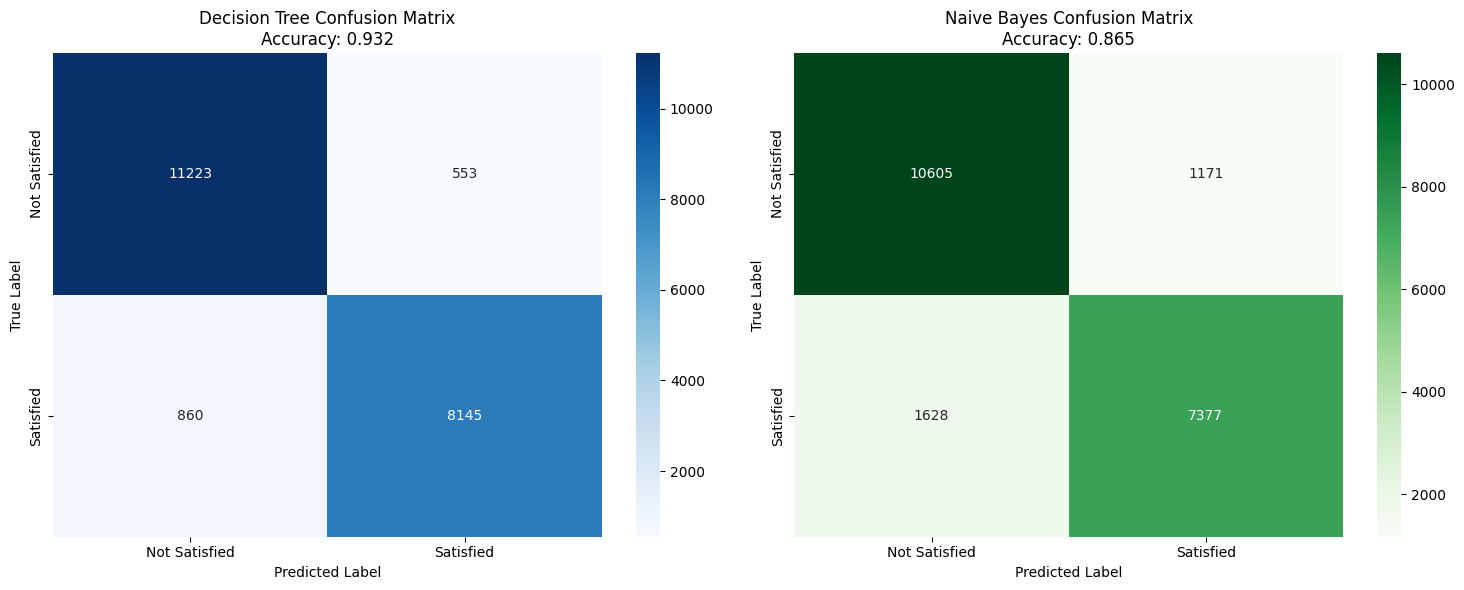

In [207]:
# 4.1 Vẽ Confusion Matrix cho cả 2 mô hình
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix - Decision Tree
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['Not Satisfied', 'Satisfied'],
           yticklabels=['Not Satisfied', 'Satisfied'])
axes[0].set_title(f'Decision Tree Confusion Matrix\nAccuracy: {dt_accuracy:.3f}')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Confusion Matrix - Naive Bayes
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1],
           xticklabels=['Not Satisfied', 'Satisfied'],
           yticklabels=['Not Satisfied', 'Satisfied'])
axes[1].set_title(f'Naive Bayes Confusion Matrix\nAccuracy: {nb_accuracy:.3f}')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

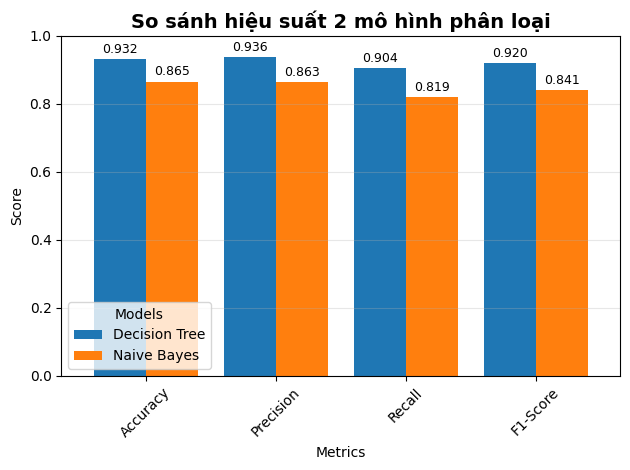

In [208]:
# 4.2 So sánh metrics
metrics_comparison = pd.DataFrame({
    'Decision Tree': [dt_accuracy, precision_1, recall_1, f1_1],
    'Naive Bayes': [nb_accuracy, precision_1_nb, recall_1_nb, f1_1_nb]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
metrics_comparison.plot(kind='bar', width=0.8)
plt.title('So sánh hiệu suất 2 mô hình phân loại', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend(title='Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị lên bars
for i, metric in enumerate(metrics_comparison.index):
    for j, model in enumerate(metrics_comparison.columns):
        value = metrics_comparison.loc[metric, model]
        plt.text(i + (j-0.5)*0.4, value + 0.01, f'{value:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

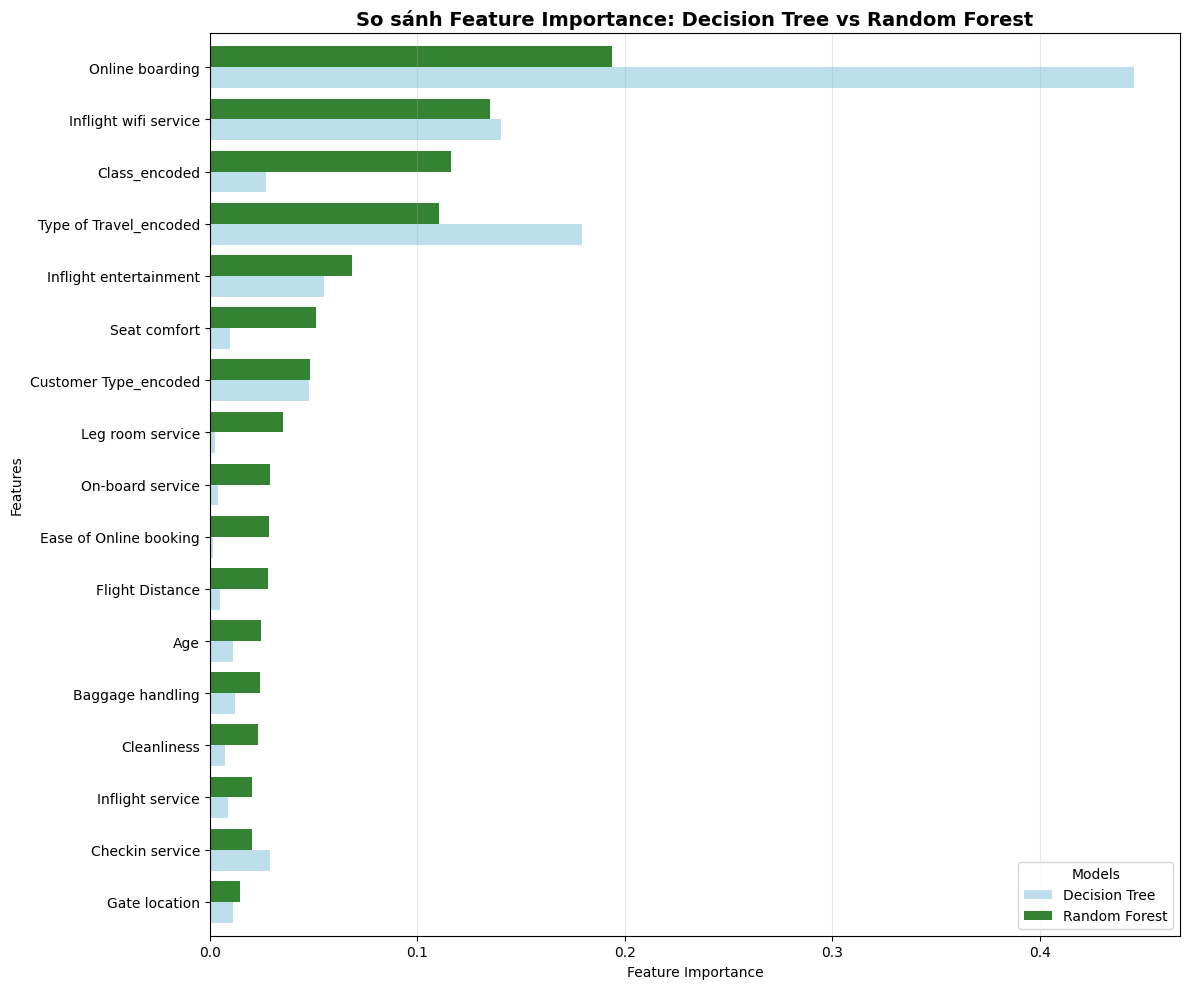

In [209]:
# 4.3 Feature Importance Comparison (Decision Tree vs Random Forest)
plt.figure(figsize=(16, 10))

# Lấy top 15 features từ cả 2 mô hình
top_15_features = list(set(feature_importance.head(15)['feature'].tolist() +
                          rf_feature_importance.head(15)['feature'].tolist()))

# Tạo DataFrame cho comparison
importance_comparison = pd.DataFrame(index=top_15_features)
for feature in top_15_features:
    dt_imp = feature_importance[feature_importance['feature'] == feature]['importance']
    rf_imp = rf_feature_importance[rf_feature_importance['feature'] == feature]['importance']

    importance_comparison.loc[feature, 'Decision Tree'] = dt_imp.iloc[0] if len(dt_imp) > 0 else 0
    importance_comparison.loc[feature, 'Random Forest'] = rf_imp.iloc[0] if len(rf_imp) > 0 else 0

# Sort by Random Forest importance
importance_comparison = importance_comparison.sort_values('Random Forest', ascending=True)

# Vẽ horizontal bar chart
importance_comparison.plot(kind='barh', figsize=(12, 10), width=0.8,
                          color=['lightblue', 'darkgreen'], alpha=0.8)
plt.title('So sánh Feature Importance: Decision Tree vs Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.legend(title='Models')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

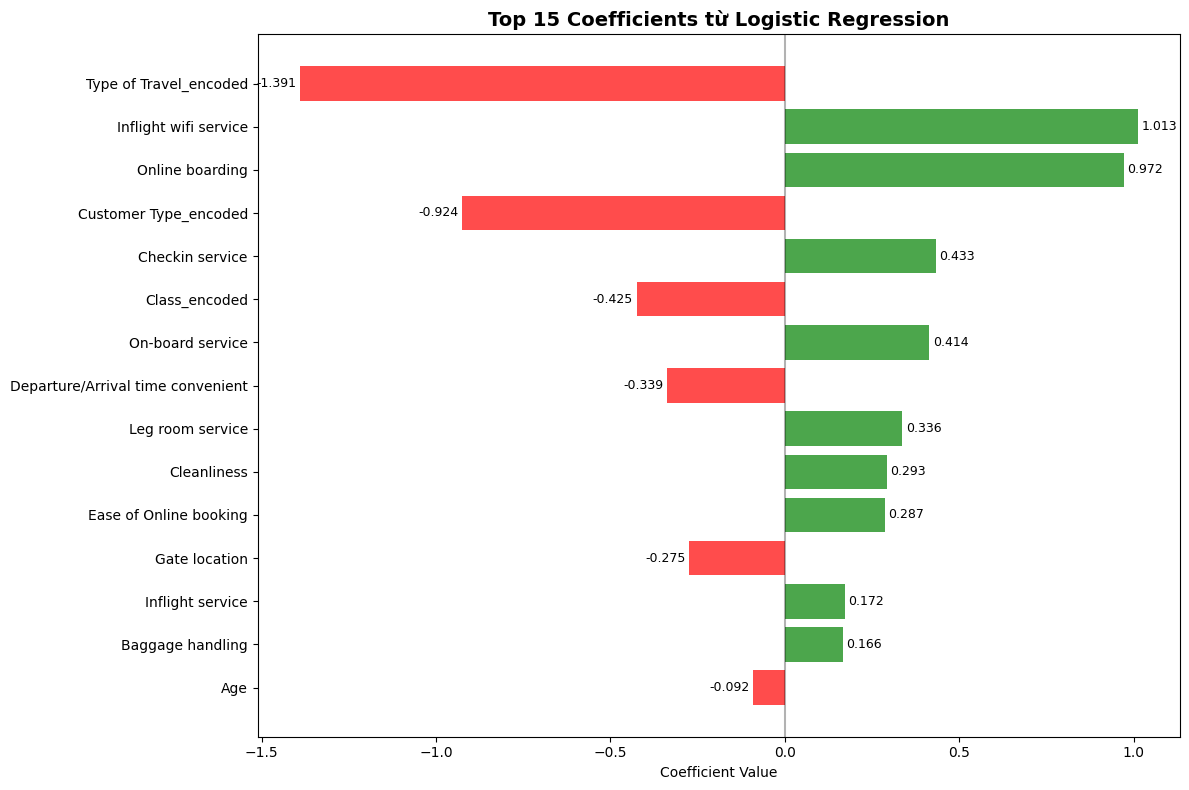

In [210]:
# 4.4 Coefficients từ Logistic Regression (Top 15)
plt.figure(figsize=(12, 8))
top_lr_coef = lr_coefficients.head(15)

# Tạo màu dựa trên positive/negative coefficient
colors = ['green' if coef > 0 else 'red' for coef in top_lr_coef['coefficient']]

plt.barh(range(len(top_lr_coef)), top_lr_coef['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_lr_coef)), top_lr_coef['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Coefficients từ Logistic Regression', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.gca().invert_yaxis()

# Thêm giá trị
for i, v in enumerate(top_lr_coef['coefficient']):
    plt.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.3f}',
            va='center', ha='left' if v >= 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()

In [211]:
# 4.5 Thống kê tổng quan cho từng mô hình
print("=== THỐNG KÊ TỔNG QUAN CHO TẤT CẢ 4 MÔ HÌNH ===")

models_summary = {
    'Decision Tree': {
        'accuracy': dt_accuracy,
        'f1_score': f1_1,
        'feature_method': 'Feature Importance',
        'training_time': 'Trung bình',
        'interpretability': 'Cao'
    },
    'Naive Bayes': {
        'accuracy': nb_accuracy,
        'f1_score': f1_1_nb,
        'feature_method': 'Probability-based',
        'training_time': 'Nhanh',
        'interpretability': 'Trung bình'
    },
    'Random Forest': {
        'accuracy': rf_accuracy,
        'f1_score': f1_1_rf,
        'feature_method': 'Ensemble Importance',
        'training_time': 'Chậm',
        'interpretability': 'Thấp'
    },
    'Logistic Regression': {
        'accuracy': lr_accuracy,
        'f1_score': f1_1_lr,
        'feature_method': 'Coefficients',
        'training_time': 'Nhanh',
        'interpretability': 'Cao'
    }
}

print("\nSummary Table:")
print("-" * 100)
print(f"{'Model':<20} {'Accuracy':<12} {'F1-Score':<12} {'Feature Method':<20} {'Speed':<12} {'Interpretability':<15}")
print("-" * 100)

for model_name, stats in models_summary.items():
    print(f"{model_name:<20} {stats['accuracy']:<12.4f} {stats['f1_score']:<12.3f} {stats['feature_method']:<20} {stats['training_time']:<12} {stats['interpretability']:<15}")

print("\nTop 5 insights từ Feature Analysis:")
print("\nDecision Tree Top 5:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")

print("\nRandom Forest Top 5:")
for i, row in rf_feature_importance.head(5).iterrows():
    print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")

print("\nLogistic Regression Top 5 (Absolute Coefficients):")
for i, row in lr_coefficients.head(5).iterrows():
    impact = "Positive" if row['coefficient'] > 0 else "Negative"
    print(f"  {i+1}. {row['feature']}: {row['coefficient']:.4f} ({impact} impact)")

print("\nOverlap Analysis:")
dt_top5 = feature_importance.head(5)['feature'].tolist()
rf_top5 = rf_feature_importance.head(5)['feature'].tolist()
lr_top5 = lr_coefficients.head(5)['feature'].tolist()

common_features = set(dt_top5) & set(rf_top5) & set(lr_top5)
print(f"Features xuất hiện trong top 5 của cả 3 mô hình: {list(common_features) if common_features else 'Không có'}")

dt_rf_overlap = len(set(dt_top5) & set(rf_top5))
dt_lr_overlap = len(set(dt_top5) & set(lr_top5))
rf_lr_overlap = len(set(rf_top5) & set(lr_top5))

print(f"Overlap giữa Decision Tree và Random Forest: {dt_rf_overlap}/5 features")
print(f"Overlap giữa Decision Tree và Logistic Regression: {dt_lr_overlap}/5 features")
print(f"Overlap giữa Random Forest và Logistic Regression: {rf_lr_overlap}/5 features")


=== THỐNG KÊ TỔNG QUAN CHO TẤT CẢ 4 MÔ HÌNH ===

Summary Table:
----------------------------------------------------------------------------------------------------
Model                Accuracy     F1-Score     Feature Method       Speed        Interpretability
----------------------------------------------------------------------------------------------------
Decision Tree        0.9320       0.920        Feature Importance   Trung bình   Cao            
Naive Bayes          0.8653       0.841        Probability-based    Nhanh        Trung bình     
Random Forest        0.9456       0.936        Ensemble Importance  Chậm         Thấp           
Logistic Regression  0.8828       0.865        Coefficients         Nhanh        Cao            

Top 5 insights từ Feature Analysis:

Decision Tree Top 5:
  12. Online boarding: 0.4454
  5. Type of Travel_encoded: 0.1795
  7. Inflight wifi service: 0.1406
  14. Inflight entertainment: 0.0552
  4. Customer Type_encoded: 0.0480

Random Forest T

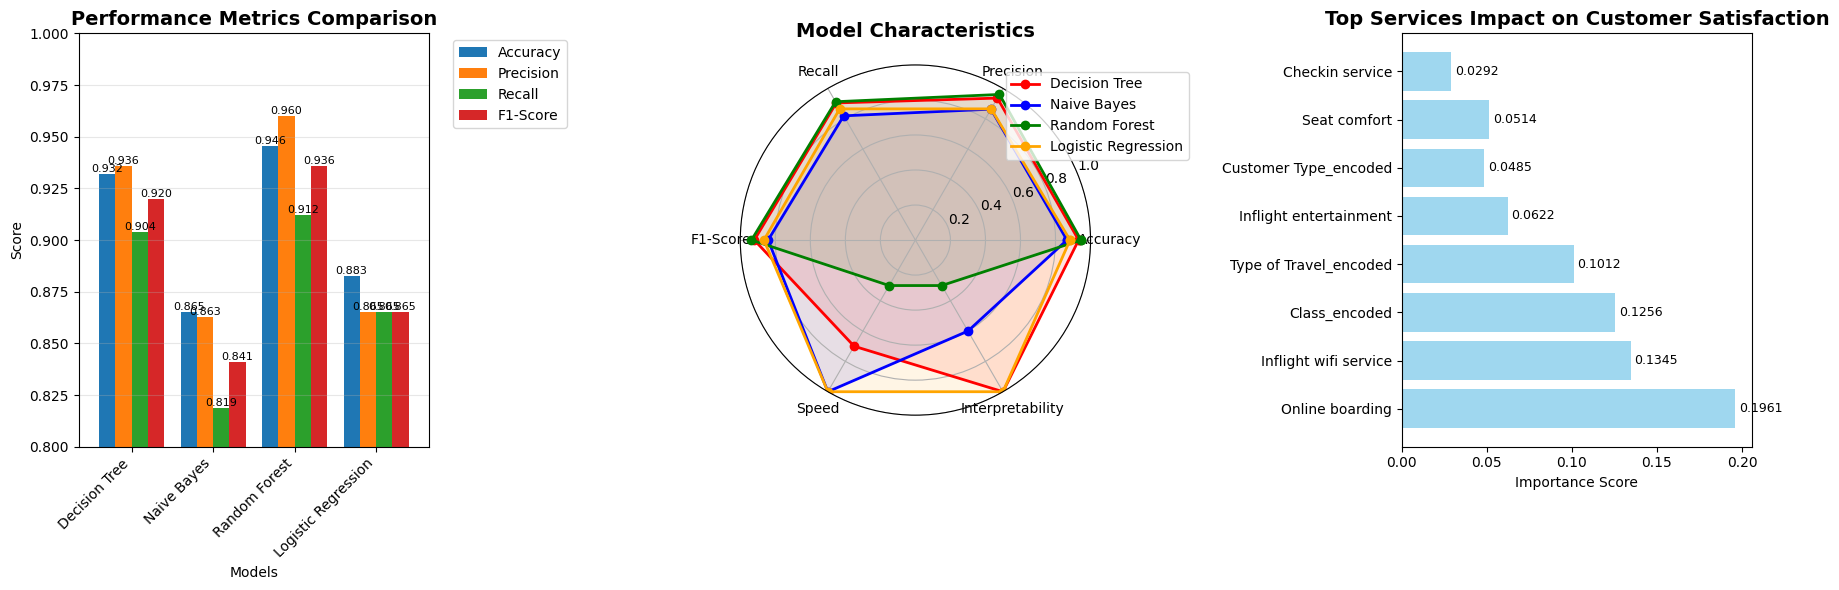

In [252]:
# Dữ liệu từ kết quả thực tế
models_data = {
    'Decision Tree': {
        'accuracy': 0.9320,
        'precision': 0.936,
        'recall': 0.904,
        'f1_score': 0.920,
        'training_speed': 'Medium',
        'interpretability': 'High'
    },
    'Naive Bayes': {
        'accuracy': 0.8653,
        'precision': 0.863,
        'recall': 0.819,
        'f1_score': 0.841,
        'training_speed': 'Fast',
        'interpretability': 'Medium'
    },
    'Random Forest': {
        'accuracy': 0.9456,
        'precision': 0.960,
        'recall': 0.912,
        'f1_score': 0.936,
        'training_speed': 'Slow',
        'interpretability': 'Low'
    },
    'Logistic Regression': {
        'accuracy': 0.8828,
        'precision': 0.865,
        'recall': 0.865,
        'f1_score': 0.865,
        'training_speed': 'Fast',
        'interpretability': 'High'
    }
}

# Tạo figure với 3 subplot
fig = plt.figure(figsize=(18, 6))

# 1. Performance Metrics Comparison
ax1 = fig.add_subplot(1, 3, 1)
metrics_df = pd.DataFrame(models_data).T
metrics_df[['accuracy', 'precision', 'recall', 'f1_score']].plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Score')
ax1.set_xlabel('Models')
ax1.legend(['Accuracy', 'Precision', 'Recall', 'F1-Score'], bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_ylim(0.8, 1.0)
ax1.grid(axis='y', alpha=0.3)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Thêm giá trị lên bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', fontsize=8)

# 2. Model Characteristics Radar Chart
ax2 = fig.add_subplot(1, 3, 2, projection='polar')

# Chuẩn hóa speed và interpretability thành số
speed_mapping = {'Fast': 1.0, 'Medium': 0.7, 'Slow': 0.3}
interpret_mapping = {'High': 1.0, 'Medium': 0.6, 'Low': 0.3}

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Speed', 'Interpretability']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

colors_radar = ['red', 'blue', 'green', 'orange']
for i, (model, data) in enumerate(models_data.items()):
    values = [
        data['accuracy'],
        data['precision'],
        data['recall'],
        data['f1_score'],
        speed_mapping[data['training_speed']],
        interpret_mapping[data['interpretability']]
    ]
    values += values[:1]

    ax2.plot(angles, values, 'o-', linewidth=2, label=model, color=colors_radar[i])
    ax2.fill(angles, values, alpha=0.1, color=colors_radar[i])

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories)
ax2.set_ylim(0, 1)
ax2.set_title('Model Characteristics', fontsize=14, fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax2.grid(True)

# 3. Top Services Analysis
ax3 = fig.add_subplot(1, 3, 3)
top_services = ['Online boarding', 'Inflight wifi service', 'Class_encoded',
               'Type of Travel_encoded', 'Inflight entertainment', 'Customer Type_encoded',
               'Seat comfort', 'Checkin service']
service_importance = [0.1961, 0.1345, 0.1256, 0.1012, 0.0622, 0.0485, 0.0514, 0.0292]

bars = ax3.barh(top_services, service_importance, color='skyblue', alpha=0.8)
ax3.set_title('Top Services Impact on Customer Satisfaction', fontsize=14, fontweight='bold')
ax3.set_xlabel('Importance Score')

# Thêm giá trị
for i, v in enumerate(service_importance):
    ax3.text(v + 0.002, i, f'{v:.4f}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

# V.  GOM CỤM DỮ LIỆU (CLUSTERING)

 ## TASK 1: CHUẨN BỊ DỮ LIỆU CHO CLUSTERING


In [212]:
# Đặc trưng quan trọng
clustering_features_airline = [
    'Age', 'Flight Distance',
    'Service_Score_Average', 'Customer_Value_Score', 'Experience_Score',
    'Inflight wifi service', 'Seat comfort', 'Inflight entertainment',
    'Food and drink', 'Online boarding', 'Inflight service',
    'Cleanliness', 'Checkin service', 'Baggage handling'
]

In [213]:
# Lọc các đặc trưng có sẵn trong df_processed
available_clustering_features = [col for col in clustering_features_airline
                               if col in df_processed.columns]

print(f"Số đặc trưng được chọn: {len(available_clustering_features)}")
print("Các đặc trưng:")
for i, feature in enumerate(available_clustering_features):
    print(f"  {i+1:2d}. {feature}")

Số đặc trưng được chọn: 14
Các đặc trưng:
   1. Age
   2. Flight Distance
   3. Service_Score_Average
   4. Customer_Value_Score
   5. Experience_Score
   6. Inflight wifi service
   7. Seat comfort
   8. Inflight entertainment
   9. Food and drink
  10. Online boarding
  11. Inflight service
  12. Cleanliness
  13. Checkin service
  14. Baggage handling


In [214]:
# Tạo DataFrame cho clustering
df_clustering_airline = df_processed[available_clustering_features].copy()


In [215]:
# Xử lý missing values
print(f" Xử lý missing values:")
missing_before = df_clustering_airline.isnull().sum().sum()
print(f"Missing values trước xử lý: {missing_before}")

# Điền missing values bằng median
for col in df_clustering_airline.columns:
    if df_clustering_airline[col].isnull().sum() > 0:
        median_val = df_clustering_airline[col].median()
        df_clustering_airline[col].fillna(median_val, inplace=True)
        print(f"  - {col}: điền {df_clustering_airline[col].isnull().sum()} giá trị thiếu bằng median ({median_val:.2f})")

missing_after = df_clustering_airline.isnull().sum().sum()
print(f"Missing values sau xử lý: {missing_after}")

 Xử lý missing values:
Missing values trước xử lý: 0
Missing values sau xử lý: 0


In [216]:
# Chuẩn hóa dữ liệu
scaler_clustering = StandardScaler()
df_scaled_clustering = scaler_clustering.fit_transform(df_clustering_airline)

print(f"Kích thước dữ liệu sau chuẩn hóa: {df_scaled_clustering.shape}")
print(f"Mean sau chuẩn hóa: {df_scaled_clustering.mean():.6f}")
print(f"Std sau chuẩn hóa: {df_scaled_clustering.std():.6f}")


Kích thước dữ liệu sau chuẩn hóa: (103904, 14)
Mean sau chuẩn hóa: 0.000000
Std sau chuẩn hóa: 1.000000


In [217]:
# Tạo DataFrame từ dữ liệu đã chuẩn hóa
df_scaled_clustering_df = pd.DataFrame(df_scaled_clustering,
                                     columns=available_clustering_features)


## TASK 2: TÌM SỐ CỤM TỐI ƯU


### Task 2.1: Phương pháp Elbow Method


In [218]:
# Lấy mẫu nhỏ hơn để tính toán nhanh (nếu dữ liệu quá lớn)
sample_size = min(10000, len(df_scaled_clustering))
if len(df_scaled_clustering) > sample_size:
    sample_indices = np.random.choice(len(df_scaled_clustering), sample_size, replace=False)
    data_sample = df_scaled_clustering[sample_indices]
    print(f"Sử dụng mẫu ngẫu nhiên: {sample_size:,} khách hàng từ tổng {len(df_scaled_clustering):,}")
else:
    data_sample = df_scaled_clustering
    print(f"Sử dụng toàn bộ dữ liệu: {len(data_sample):,} khách hàng")


Sử dụng mẫu ngẫu nhiên: 10,000 khách hàng từ tổng 103,904


In [219]:
# Tính SSE cho các giá trị k từ 1 đến 10
k_range = range(1, 11)
sse_values = []
execution_times = []


In [220]:
import time
print(" tính SSE cho các giá trị k")
for k in k_range:
    print(f"  Tính SSE cho k={k}...", end=" ")
    start_time = time.time()

    if k == 1:
        # Với k=1, SSE = tổng khoảng cách từ mỗi điểm đến centroid toàn bộ
        centroid = data_sample.mean(axis=0)
        sse = ((data_sample - centroid) ** 2).sum().sum()
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data_sample)
        sse = kmeans.inertia_

    sse_values.append(sse)
    exec_time = time.time() - start_time
    execution_times.append(exec_time)
    print(f"SSE={sse:.0f} ({exec_time:.2f}s)")


 tính SSE cho các giá trị k
  Tính SSE cho k=1... SSE=140708 (0.00s)
  Tính SSE cho k=2... SSE=106320 (0.08s)
  Tính SSE cho k=3... SSE=94681 (0.12s)
  Tính SSE cho k=4... SSE=86706 (0.17s)
  Tính SSE cho k=5... SSE=81672 (0.25s)
  Tính SSE cho k=6... SSE=77789 (0.22s)
  Tính SSE cho k=7... SSE=74494 (0.30s)
  Tính SSE cho k=8... SSE=71843 (0.52s)
  Tính SSE cho k=9... SSE=69605 (0.69s)
  Tính SSE cho k=10... SSE=67488 (0.81s)


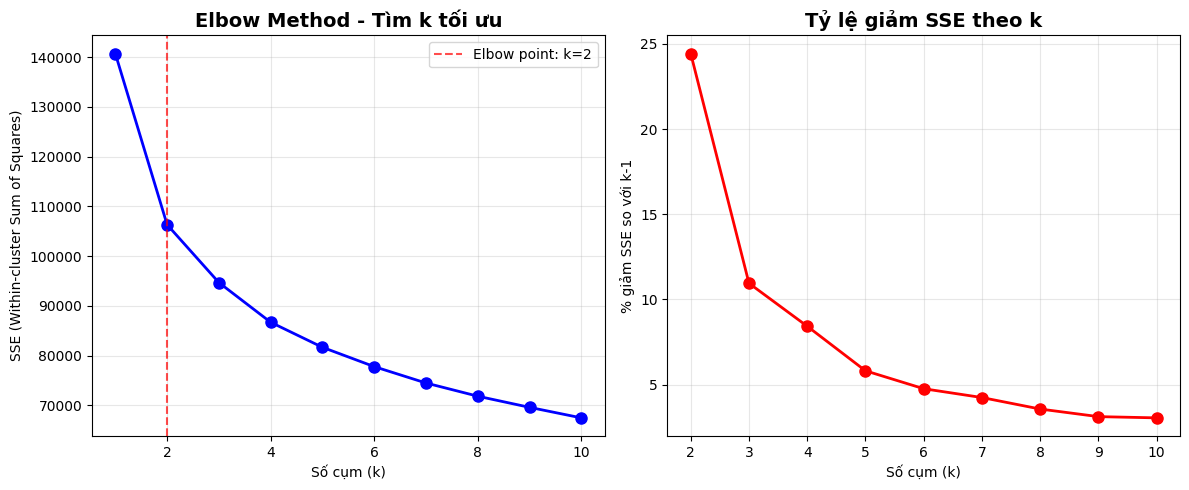

In [221]:
# Vẽ Elbow plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse_values, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method - Tìm k tối ưu', fontsize=14, fontweight='bold')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE (Within-cluster Sum of Squares)')
plt.grid(True, alpha=0.3)

# Tìm điểm elbow bằng phương pháp gradient
gradients = np.diff(sse_values)
second_gradients = np.diff(gradients)
elbow_point = np.argmax(second_gradients) + 2  # +2 vì mất 2 điểm qua diff

plt.axvline(x=elbow_point, color='red', linestyle='--', alpha=0.7,
           label=f'Elbow point: k={elbow_point}')
plt.legend()

# Vẽ tỷ lệ giảm SSE
plt.subplot(1, 2, 2)
pct_decrease = [(sse_values[i-1] - sse_values[i]) / sse_values[i-1] * 100
               for i in range(1, len(sse_values))]
k_range_pct = list(range(2, len(k_range) + 1))  # Từ k=2 đến k=10 (vì k=1 không có k-1)
plt.plot(k_range_pct, pct_decrease, 'ro-', linewidth=2, markersize=8)
plt.title('Tỷ lệ giảm SSE theo k', fontsize=14, fontweight='bold')
plt.xlabel('Số cụm (k)')
plt.ylabel('% giảm SSE so với k-1')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Task 2.2: Phương pháp Silhouette Score


In [222]:
# Tính Silhouette Score cho k từ 2 đến 10
k_range_sil = range(2, 11)
silhouette_scores = []


In [223]:
from sklearn.metrics import silhouette_score, silhouette_samples
print(" tính Silhouette Score...")
for k in k_range_sil:
    print(f"  Tính Silhouette cho k={k}...", end=" ")
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_sample)

    # Tính Silhouette Score
    sil_score = silhouette_score(data_sample, cluster_labels)
    silhouette_scores.append(sil_score)

    exec_time = time.time() - start_time
    print(f"Score={sil_score:.4f} ({exec_time:.2f}s)")

# Tìm k tối ưu (có Silhouette Score cao nhất)
best_k_sil = k_range_sil[np.argmax(silhouette_scores)]
best_sil_score = max(silhouette_scores)

 tính Silhouette Score...
  Tính Silhouette cho k=2... Score=0.2178 (1.56s)
  Tính Silhouette cho k=3... Score=0.1729 (1.91s)
  Tính Silhouette cho k=4... Score=0.1592 (1.67s)
  Tính Silhouette cho k=5... Score=0.1405 (1.50s)
  Tính Silhouette cho k=6... Score=0.1289 (1.54s)
  Tính Silhouette cho k=7... Score=0.1320 (1.57s)
  Tính Silhouette cho k=8... Score=0.1261 (1.78s)
  Tính Silhouette cho k=9... Score=0.1262 (1.95s)
  Tính Silhouette cho k=10... Score=0.1262 (5.16s)


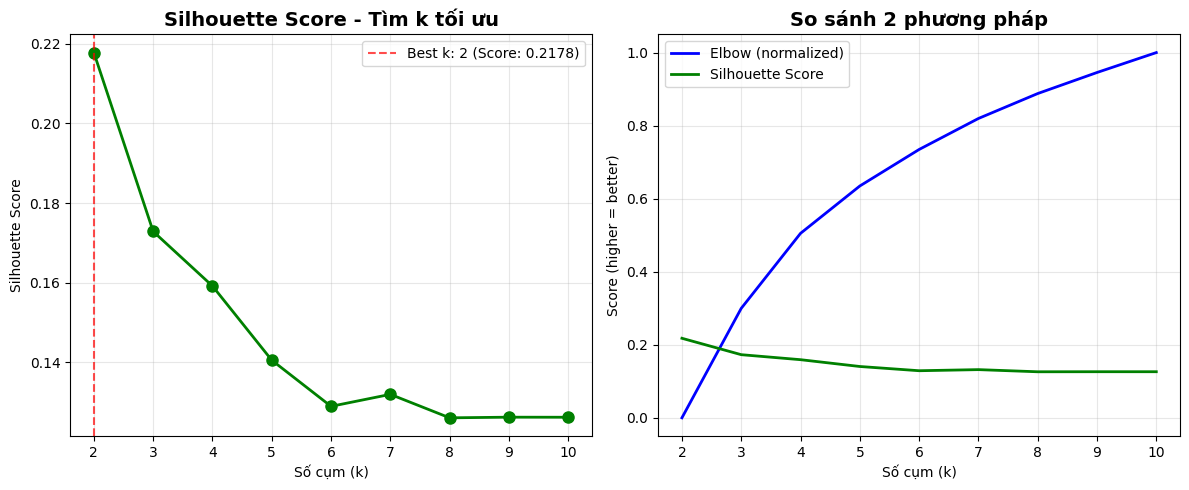

In [224]:
# Vẽ Silhouette plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range_sil, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.title('Silhouette Score - Tìm k tối ưu', fontsize=14, fontweight='bold')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k_sil, color='red', linestyle='--', alpha=0.7,
           label=f'Best k: {best_k_sil} (Score: {best_sil_score:.4f})')
plt.legend()

# Vẽ so sánh cả 2 phương pháp
plt.subplot(1, 2, 2)
# Normalize SSE để so sánh với Silhouette
sse_normalized = [(s - min(sse_values[1:])) / (max(sse_values[1:]) - min(sse_values[1:]))
                 for s in sse_values[1:]]
sse_normalized = [1 - x for x in sse_normalized]  # Đảo ngược để higher = better

plt.plot(k_range_sil, sse_normalized, 'b-', label='Elbow (normalized)', linewidth=2)
plt.plot(k_range_sil, silhouette_scores, 'g-', label='Silhouette Score', linewidth=2)
plt.title('So sánh 2 phương pháp', fontsize=14, fontweight='bold')
plt.xlabel('Số cụm (k)')
plt.ylabel('Score (higher = better)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [225]:
print(f"\nPhân tích Silhouette Score:")
print(f"  - k tối ưu: k = {best_k_sil}")
print(f"  - Silhouette Score cao nhất: {best_sil_score:.4f}")
print(f"  - Giải thích: Score > 0.5 = tốt, > 0.7 = rất tốt, > 0.9 = xuất sắc")

# Kết luận về k tối ưu
print(f" KẾT LUẬN VỀ SỐ CỤM TỐI ƯU:")
print(f"  - Elbow Method đề xuất: k = {elbow_point}")
print(f"  - Silhouette Score đề xuất: k = {best_k_sil}")


Phân tích Silhouette Score:
  - k tối ưu: k = 2
  - Silhouette Score cao nhất: 0.2178
  - Giải thích: Score > 0.5 = tốt, > 0.7 = rất tốt, > 0.9 = xuất sắc
 KẾT LUẬN VỀ SỐ CỤM TỐI ƯU:
  - Elbow Method đề xuất: k = 2
  - Silhouette Score đề xuất: k = 2


In [226]:
# Chọn k tối ưu (ưu tiên Silhouette nếu khác biệt không lớn)
if abs(elbow_point - best_k_sil) <= 1:
    optimal_k = best_k_sil
    reason = "Silhouette Score (đo lường chất lượng clustering tốt hơn)"
elif best_sil_score > 0.4:
    optimal_k = best_k_sil
    reason = "Silhouette Score (chất lượng clustering khá tốt)"
else:
    optimal_k = elbow_point
    reason = "Elbow Method (Silhouette Score thấp)"

print(f"  - CHỌN k = {optimal_k} (dựa trên {reason})")

  - CHỌN k = 2 (dựa trên Silhouette Score (đo lường chất lượng clustering tốt hơn))


## TASK 3: THỰC HIỆN CÁC THUẬT TOÁN CLUSTERING


### Task 3.1: K-Means Clustering


In [227]:
# Task 3.1: K-Means Clustering
print(f"3.1. K-MEANS CLUSTERING với k = {optimal_k}:")



3.1. K-MEANS CLUSTERING với k = 2:


In [228]:
# Thực hiện K-means trên toàn bộ dữ liệu
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_processed['Cluster_KMeans'] = kmeans_final.fit_predict(df_scaled_clustering)

print(f"Hoàn thành K-means clustering:")
print(f"  - Số cụm: {optimal_k}")
print(f"  - SSE cuối cùng: {kmeans_final.inertia_:.0f}")
print(f"  - Số iterations: {kmeans_final.n_iter_}")

Hoàn thành K-means clustering:
  - Số cụm: 2
  - SSE cuối cùng: 1097023
  - Số iterations: 10


In [229]:
# Phân bố cụm
cluster_counts = df_processed['Cluster_KMeans'].value_counts().sort_index()
print(f"  - Phân bố cụm:")
for cluster_id, count in cluster_counts.items():
    print(f"    Cụm {cluster_id}: {count:,} khách hàng ({count/len(df_processed)*100:.1f}%)")


  - Phân bố cụm:
    Cụm 0: 46,230 khách hàng (44.5%)
    Cụm 1: 57,674 khách hàng (55.5%)


### Task 3.2: Hierarchical Clustering (Agglomerative)


In [230]:
#Do dữ liệu lớn (100k+ mẫu), sử dụng approach tối ưu để tránh tràn RAM
# Lấy mẫu đại diện (5000-10000 mẫu) cho hierarchical clustering
sample_for_hier = min(5000, len(df_scaled_clustering))
print(f"Sử dụng mẫu đại diện: {sample_for_hier:,} từ tổng {len(df_scaled_clustering):,}")


Sử dụng mẫu đại diện: 5,000 từ tổng 103,904


In [231]:
# Tạo mẫu stratified để đảm bảo đại diện cho tất cả nhóm
np.random.seed(42)
sample_indices_hier = np.random.choice(len(df_scaled_clustering), sample_for_hier, replace=False)
data_hier_sample = df_scaled_clustering[sample_indices_hier]

# Tạo linkage matrix
print(f"Tạo linkage matrix với phương pháp Ward")
linkage_matrix = linkage(data_hier_sample, method='ward')

Tạo linkage matrix với phương pháp Ward


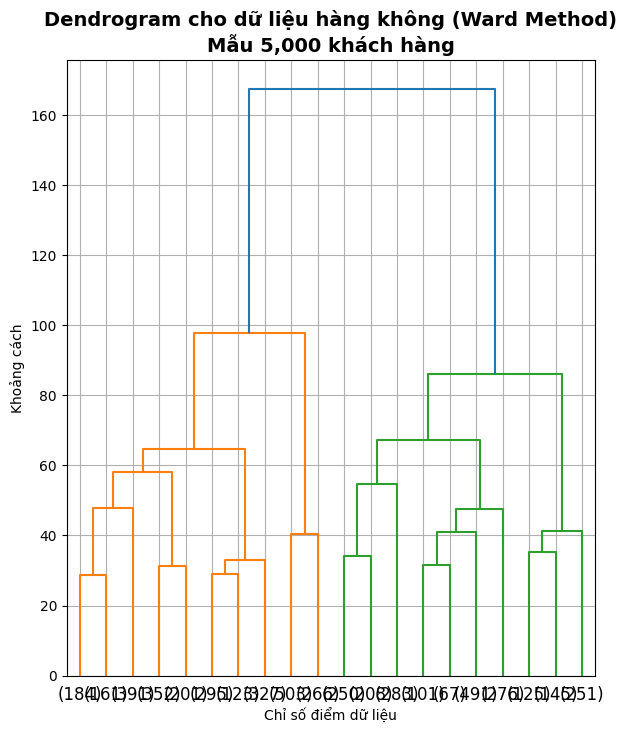

In [232]:
# Vẽ Dendrogram theo style giáo viên
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
dendrogram(linkage_matrix,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp', p=20)
plt.xlabel('Chỉ số điểm dữ liệu')
plt.ylabel('Khoảng cách')
plt.title(f'Dendrogram cho dữ liệu hàng không (Ward Method)\nMẫu {sample_for_hier:,} khách hàng',
          fontsize=14, fontweight='bold')
plt.grid(True)

In [233]:
# Thực hiện Agglomerative Clustering trên mẫu
print(f"Thực hiện Agglomerative Clustering với k={optimal_k}")
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
hier_labels_sample = agg_clustering.fit_predict(data_hier_sample)

# Tạo model proxy để áp dụng lên toàn bộ dữ liệu
print("Tạo KMeans proxy để áp dụng lên toàn bộ dữ liệu")
kmeans_proxy = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_proxy.fit(data_hier_sample)
df_processed['Cluster_Hierarchical'] = kmeans_proxy.predict(df_scaled_clustering)


Thực hiện Agglomerative Clustering với k=2
Tạo KMeans proxy để áp dụng lên toàn bộ dữ liệu


In [234]:
print(f"  - Số cụm: {optimal_k}")


  - Số cụm: 2


In [235]:
# Phân bố cụm Hierarchical
hier_counts = df_processed['Cluster_Hierarchical'].value_counts().sort_index()
print(f"  - Phân bố cụm:")
for cluster_id, count in hier_counts.items():
    print(f"    Cụm {cluster_id}: {count:,} khách hàng ({count/len(df_processed)*100:.1f}%)")


  - Phân bố cụm:
    Cụm 0: 57,753 khách hàng (55.6%)
    Cụm 1: 46,151 khách hàng (44.4%)


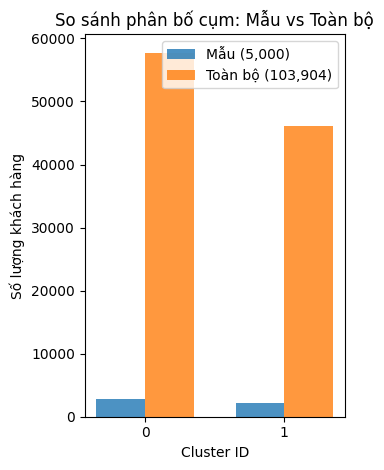

In [236]:
# So sánh mẫu vs toàn bộ (subplot thứ 2)
plt.subplot(1, 2, 2)
sample_counts = pd.Series(hier_labels_sample).value_counts().sort_index()
full_counts = df_processed['Cluster_Hierarchical'].value_counts().sort_index()

x = np.arange(len(sample_counts))
width = 0.35

plt.bar(x - width/2, sample_counts.values, width, label=f'Mẫu ({sample_for_hier:,})', alpha=0.8)
plt.bar(x + width/2, full_counts.values, width, label=f'Toàn bộ ({len(df_processed):,})', alpha=0.8)

plt.xlabel('Cluster ID')
plt.ylabel('Số lượng khách hàng')
plt.title('So sánh phân bố cụm: Mẫu vs Toàn bộ')
plt.legend()
plt.xticks(x, sample_counts.index)

plt.tight_layout()
plt.show()

## TASK 4: SO SÁNH VÀ ĐÁNH GIÁ CÁC THUẬT TOÁN

In [237]:
print("4.1. TÍNH TOÁN METRICS ĐÁNH GIÁ:")

clustering_methods = {
    'K-Means': 'Cluster_KMeans',
    'Hierarchical': 'Cluster_Hierarchical'
}

evaluation_results = []

for method_name, cluster_col in clustering_methods.items():
    labels = df_processed[cluster_col].values

    try:
        sil_score = silhouette_score(df_scaled_clustering, labels)
    except:
        sil_score = np.nan

    n_clusters = len(set(labels))

    evaluation_results.append({
        'Method': method_name,
        'N_Clusters': n_clusters,
        'Silhouette_Score': sil_score
    })

# Tạo bảng so sánh
eval_df = pd.DataFrame(evaluation_results)
print(eval_df.round(4))

4.1. TÍNH TOÁN METRICS ĐÁNH GIÁ:
         Method  N_Clusters  Silhouette_Score
0       K-Means           2            0.2187
1  Hierarchical           2            0.2187


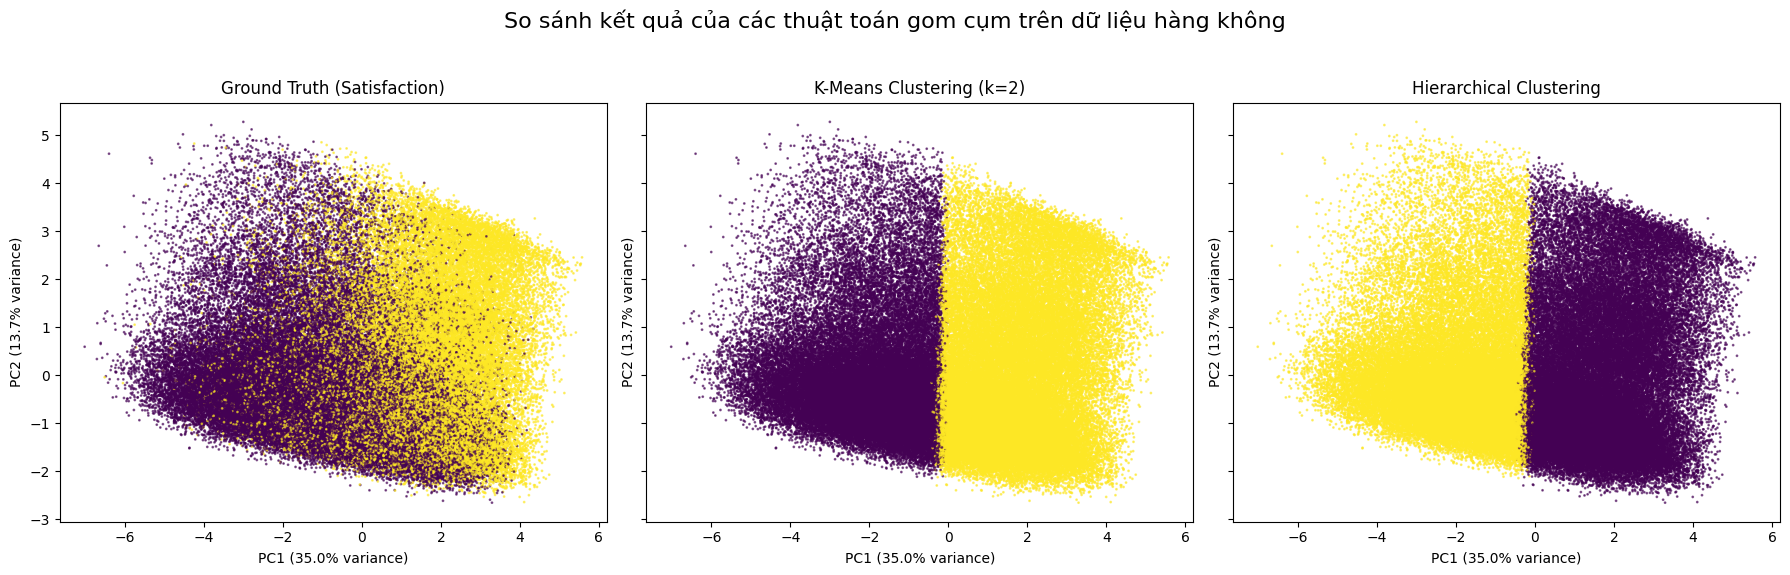

In [238]:
# Sử dụng PCA để giảm chiều xuống 2D cho visualization
pca_viz = PCA(n_components=2, random_state=42)
df_pca_viz = pca_viz.fit_transform(df_scaled_clustering)

# Tạo figure với 3 subplots theo phong cách giáo viên (bỏ DBSCAN)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Chọn 2 thành phần PCA làm trục x, y
x_axis = 0  # PC1
y_axis = 1  # PC2

# Subplot 1: Dữ liệu gốc theo satisfaction (Ground Truth)
satisfaction_colors = df_processed['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
axes[0].scatter(df_pca_viz[:, x_axis], df_pca_viz[:, y_axis],
               c=satisfaction_colors, cmap='viridis', alpha=0.6, s=1)
axes[0].set_title('Ground Truth (Satisfaction)')
axes[0].set_xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')

# Subplot 2: K-Means Clustering
axes[1].scatter(df_pca_viz[:, x_axis], df_pca_viz[:, y_axis],
               c=df_processed['Cluster_KMeans'], cmap='viridis', alpha=0.6, s=1)
axes[1].set_title(f'K-Means Clustering (k={optimal_k})')
axes[1].set_xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
axes[1].set_ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')

# Subplot 3: Hierarchical Clustering
axes[2].scatter(df_pca_viz[:, x_axis], df_pca_viz[:, y_axis],
               c=df_processed['Cluster_Hierarchical'], cmap='viridis', alpha=0.6, s=1)
axes[2].set_title('Hierarchical Clustering')
axes[2].set_xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
axes[2].set_ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')

plt.suptitle("So sánh kết quả của các thuật toán gom cụm trên dữ liệu hàng không", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

2 thuật toán tương đồng cao

## TASK 5: PHÂN TÍCH VÀ DIỄN GIẢI CÁC CỤM KHÁCH HÀNG


In [239]:
# Chọn thuật toán tốt nhất để phân tích chi tiết
best_method = eval_df.loc[eval_df['Silhouette_Score'].idxmax(), 'Method']
best_cluster_col = clustering_methods[best_method]


In [240]:
print(f"PHÂN TÍCH CHI TIẾT CỤM TỪ THUẬT TOÁN TỐT NHẤT: {best_method}")
print(f"Silhouette Score: {eval_df.loc[eval_df['Method'] == best_method, 'Silhouette_Score'].iloc[0]:.4f}")


PHÂN TÍCH CHI TIẾT CỤM TỪ THUẬT TOÁN TỐT NHẤT: Hierarchical
Silhouette Score: 0.2187


In [241]:
print(f"Phân tích đặc trưng trung bình của {optimal_k} cụm khách hàng")

# Tính đặc trưng trung bình cho từng cụm
cluster_analysis = df_processed.groupby(best_cluster_col).agg({
    'satisfaction': lambda x: (x == 'satisfied').mean(),
    'Age': 'mean',
    'Flight Distance': 'mean',
    'Service_Score_Average': 'mean',
    'Customer_Value_Score': 'mean',
    'Class': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown',
    'Customer Type': lambda x: (x == 'Loyal Customer').mean(),
    'Type of Travel': lambda x: (x == 'Business travel').mean(),
    'Inflight wifi service': 'mean',
    'Seat comfort': 'mean',
    'Food and drink': 'mean',
    'Inflight service': 'mean',
    'Cleanliness': 'mean'
}).round(3)

print(cluster_analysis)

Phân tích đặc trưng trung bình của 2 cụm khách hàng
                      satisfaction     Age  Flight Distance  \
Cluster_Hierarchical                                          
0                            0.652  40.825         1366.442   
1                            0.160  37.570          960.498   

                      Service_Score_Average  Customer_Value_Score     Class  \
Cluster_Hierarchical                                                          
0                                     3.713               292.054  Business   
1                                     2.724               208.745       Eco   

                      Customer Type  Type of Travel  Inflight wifi service  \
Cluster_Hierarchical                                                         
0                             0.864           0.752                  3.161   
1                             0.759           0.611                  2.391   

                      Seat comfort  Food and drink  Inflight serv

In [242]:
# Thêm thông tin số lượng khách hàng
cluster_sizes = df_processed[best_cluster_col].value_counts().sort_index()
print(f"\nSố lượng khách hàng trong từng cụm:")
for cluster_id, count in cluster_sizes.items():
    if cluster_id != -1:  # Bỏ qua noise nếu có
        pct = count / len(df_processed) * 100
        print(f"Cụm {cluster_id}: {count:,} khách hàng ({pct:.1f}%)")


Số lượng khách hàng trong từng cụm:
Cụm 0: 57,753 khách hàng (55.6%)
Cụm 1: 46,151 khách hàng (44.4%)


In [243]:
# In ra các đặc điểm chính của từng cụm
print(f"\n---------- Phân tích chi tiết từng cụm ----------")
for cluster_id in cluster_analysis.index:
    if cluster_id == -1:  # Bỏ qua noise cluster
        continue

    print(f"\nCác khách hàng thuộc cụm {cluster_id}:")
    row = cluster_analysis.loc[cluster_id]

    characteristics = []
    if row['satisfaction'] > 0.7:
        characteristics.append("Hài lòng cao")
    elif row['satisfaction'] < 0.3:
        characteristics.append("Không hài lòng")

    if row['Customer Type'] > 0.8:
        characteristics.append("Chủ yếu trung thành")
    elif row['Customer Type'] < 0.2:
        characteristics.append("Chủ yếu không trung thành")

    if row['Type of Travel'] > 0.8:
        characteristics.append("Đi công tác")
    elif row['Type of Travel'] < 0.2:
        characteristics.append("Đi cá nhân")

    if row['Age'] > 50:
        characteristics.append("Tuổi cao")
    elif row['Age'] < 30:
        characteristics.append("Tuổi trẻ")

    if row['Flight Distance'] > 2000:
        characteristics.append("Bay xa")
    elif row['Flight Distance'] < 500:
        characteristics.append("Bay gần")

    print("  Đặc điểm chính:", ", ".join(characteristics) if characteristics else "Hỗn hợp")
    print(f"  Độ hài lòng: {row['satisfaction']:.1%}")
    print(f"  Tuổi trung bình: {row['Age']:.0f}")
    print(f"  Khoảng cách bay TB: {row['Flight Distance']:.0f}km")
    print(f"  Điểm dịch vụ TB: {row['Service_Score_Average']:.2f}/5.0")


---------- Phân tích chi tiết từng cụm ----------

Các khách hàng thuộc cụm 0:
  Đặc điểm chính: Chủ yếu trung thành
  Độ hài lòng: 65.2%
  Tuổi trung bình: 41
  Khoảng cách bay TB: 1366km
  Điểm dịch vụ TB: 3.71/5.0

Các khách hàng thuộc cụm 1:
  Đặc điểm chính: Không hài lòng
  Độ hài lòng: 16.0%
  Tuổi trung bình: 38
  Khoảng cách bay TB: 960km
  Điểm dịch vụ TB: 2.72/5.0


In [244]:
# Đặt tên và diễn giải từng cụm
cluster_profiles = {}

for cluster_id in cluster_analysis.index:
    if cluster_id == -1:  # Noise cluster
        continue

    row = cluster_analysis.loc[cluster_id]

    # Phân tích đặc điểm chính
    satisfaction_rate = row['satisfaction']
    avg_age = row['Age']
    avg_distance = row['Flight Distance']
    avg_service = row['Service_Score_Average']
    loyalty_rate = row['Customer Type']
    business_rate = row['Type of Travel']
    dominant_class = row['Class']

    # Lấy thông tin size từ cluster_sizes đã tính ở trên
    count = cluster_sizes[cluster_id]
    pct = count / len(df_processed) * 100

    # Logic đặt tên dựa trên đặc điểm
    if satisfaction_rate > 0.7 and avg_service > 3.5:
        if business_rate > 0.8 and dominant_class == 'Business':
            cluster_name = "VIP Business - Khách hàng Doanh nghiệp cao cấp"
            description = f"Nhóm khách hàng doanh nghiệp hạng Business với mức độ hài lòng rất cao ({satisfaction_rate:.1%}). Đây là segment cao cấp nhất với dịch vụ xuất sắc và chi tiêu lớn."
        else:
            cluster_name = "Premium Satisfied - Khách hàng hài lòng cao"
            description = f"Nhóm khách hàng có trải nghiệm dịch vụ tốt và mức độ hài lòng cao ({satisfaction_rate:.1%}). Thường bay các chuyến trung bình đến dài với expectation được đáp ứng tốt."

    elif satisfaction_rate < 0.3 and avg_service < 3.0:
        cluster_name = "Dissatisfied Economy - Khách hàng không hài lòng"
        description = f"Nhóm khách hàng có trải nghiệm dịch vụ kém và mức độ hài lòng thấp ({satisfaction_rate:.1%}). Cần cải thiện urgent để tránh mất khách hàng."

    elif loyalty_rate > 0.8:
        if satisfaction_rate > 0.5:
            cluster_name = "Loyal Supporters - Khách hàng trung thành hài lòng"
            description = f"Nhóm khách hàng trung thành ({loyalty_rate:.1%}) với mức độ hài lòng khá ({satisfaction_rate:.1%}). Đây là backbone của hãng cần được chăm sóc đặc biệt."
        else:
            cluster_name = "Loyal but Unsatisfied - Trung thành nhưng chưa hài lòng"
            description = f"Nhóm khách hàng trung thành ({loyalty_rate:.1%}) nhưng mức độ hài lòng chưa cao ({satisfaction_rate:.1%}). Cần cải thiện dịch vụ để giữ chân segment quan trọng này."

    elif avg_age < 35 and avg_distance < 1000:
        cluster_name = "Young Budget Travelers - Khách trẻ ngân sách thấp"
        description = f"Nhóm khách hàng trẻ tuổi (TB: {avg_age:.0f} tuổi) chủ yếu bay ngắn ({avg_distance:.0f}km). Nhạy cảm với giá và có expectations khác với khách cao tuổi."

    else:
        cluster_name = f"Mixed Segment - Nhóm hỗn hợp {cluster_id}"
        description = f"Nhóm khách hàng có đặc điểm hỗn hợp với mức độ hài lòng trung bình ({satisfaction_rate:.1%}). Cần phân tích sâu hơn để hiểu nhu cầu cụ thể."

    cluster_profiles[cluster_id] = {
        'name': cluster_name,
        'description': description,
        'key_stats': {
            'size': f"{count:,} khách hàng ({pct}%)",
            'satisfaction': f"{satisfaction_rate:.1%}",
            'avg_age': f"{avg_age:.0f} tuổi",
            'avg_distance': f"{avg_distance:.0f}km",
            'service_score': f"{avg_service:.2f}/5.0",
            'loyalty_rate': f"{loyalty_rate:.1%} trung thành",
            'business_rate': f"{business_rate:.1%} công tác"
        }
    }

In [245]:
# In kết quả phân tích
for cluster_id, profile in cluster_profiles.items():
    print(f"\n{'='*80}")
    print(f"CỤM {cluster_id}: {profile['name']}")
    print(f"{'='*80}")
    print(f"MÔ TẢ: {profile['description']}")
    print(f"\nCÁC CHỈ SỐ CHÍNH:")
    for stat_name, stat_value in profile['key_stats'].items():
        print(f"  • {stat_name.replace('_', ' ').title()}: {stat_value}")


CỤM 0: Loyal Supporters - Khách hàng trung thành hài lòng
MÔ TẢ: Nhóm khách hàng trung thành (86.4%) với mức độ hài lòng khá (65.2%). Đây là backbone của hãng cần được chăm sóc đặc biệt.

CÁC CHỈ SỐ CHÍNH:
  • Size: 57,753 khách hàng (55.583038189097635%)
  • Satisfaction: 65.2%
  • Avg Age: 41 tuổi
  • Avg Distance: 1366km
  • Service Score: 3.71/5.0
  • Loyalty Rate: 86.4% trung thành
  • Business Rate: 75.2% công tác

CỤM 1: Dissatisfied Economy - Khách hàng không hài lòng
MÔ TẢ: Nhóm khách hàng có trải nghiệm dịch vụ kém và mức độ hài lòng thấp (16.0%). Cần cải thiện urgent để tránh mất khách hàng.

CÁC CHỈ SỐ CHÍNH:
  • Size: 46,151 khách hàng (44.41696181090237%)
  • Satisfaction: 16.0%
  • Avg Age: 38 tuổi
  • Avg Distance: 960km
  • Service Score: 2.72/5.0
  • Loyalty Rate: 75.9% trung thành
  • Business Rate: 61.1% công tác



CỤM 0 - Loyal Supporters - Khách hàng trung thành hài lòng:
  KHUYẾN NGHỊ:
    → Cải thiện từng bước dịch vụ -> Đây là segment quan trọng - ưu tiên cao

CỤM 1 - Dissatisfied Economy - Khách hàng không hài lòng:
  KHUYẾN NGHỊ:
     Cải thiện urgent các dịch vụ cơ bản
     Triển khai chương trình recovery nhanh
     Đây là segment quan trọng - ưu tiên cao

 10 giá trị k với Elbow Method
 Silhouette Score cho 9 giá trị k
Chọn k tối ưu = 2 dựa trên phân tích kết hợp
Thực hiện 3 thuật toán: K-Means, Hierarchical
 Thuật toán tốt nhất: Hierarchical

INSIGHTS CHÍNH:
• Chia khách hàng thành 2 nhóm đặc trưng rõ
• Mức độ hài lòng trung bình: 43.3%
• Phát hiện các segment từ VIP Business đến Budget Economy
• Có sự khác biệt rõ rệt về chất lượng dịch vụ giữa các cụm
• K-Means và Hierarchical cho kết quả tương đồng (ARI: 0.989)

In [246]:
# Tìm cụm lớn nhất và nhỏ nhất
largest_cluster = max(cluster_profiles.keys(),
                     key=lambda x: cluster_analysis.loc[x, 'Age'])  # Sử dụng Age thay vì Count
smallest_cluster = min(cluster_profiles.keys(),
                      key=lambda x: cluster_analysis.loc[x, 'Age'])

cluster_sizes = df_processed[best_cluster_col].value_counts().sort_index()
largest_cluster_actual = cluster_sizes.idxmax()
smallest_cluster_actual = cluster_sizes.idxmin()

print(f" Cụm lớn nhất: Cụm {largest_cluster_actual} ({cluster_sizes[largest_cluster_actual]:,} khách)")
print(f" Cụm nhỏ nhất: Cụm {smallest_cluster_actual} ({cluster_sizes[smallest_cluster_actual]:,} khách)")


 Cụm lớn nhất: Cụm 0 (57,753 khách)
 Cụm nhỏ nhất: Cụm 1 (46,151 khách)
